In [1]:
#本程序意图调用车型分类模型对车辆进行识别

# 读入模型

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras import Sequential

In [2]:
bodystyle_model=Sequential()
MODEL_PATH='model/bodystyle_model.h5'
bodystyle_model=load_model(MODEL_PATH)

# 使用从文件读取的方式

In [8]:
from PIL import Image

In [5]:
filename='cardata/Acura_MDX_2014_42_18_290_35_6_77_67_193_20_FWD_7_4_SUV_EjE.jpg'
img = Image.open(filename)

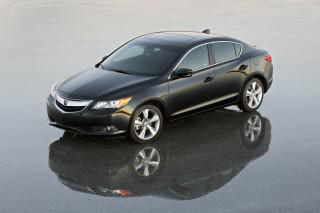

In [6]:
img

In [7]:
 img = img.resize((80, 60), Image.ANTIALIAS)

In [8]:
arr = np.asarray(img, dtype='float32')

In [9]:
arr.shape

(60, 80, 3)

In [10]:
arr=arr/255

In [11]:
arr=arr.reshape(1,60,80,3)

In [12]:
arr.shape

(1, 60, 80, 3)

In [13]:
result = bodystyle_model.predict_classes(arr)

In [14]:
# cudnn版本不对应
# cuda版本10.0.130 -  10.2.89  
# cudnn版本 7.6.5-  7.6.5

In [21]:
result = bodystyle_model.predict_classes(arr)
print(result[0])

2


In [17]:
#cuda版本升级后，与tensorflow版本冲突
# tf 2.0.0- 2.0.0
# cuda 10.2.89 -10.0.130
# cudnn 7.6-7.4

In [19]:
type(result)

numpy.ndarray

In [9]:
suv_path='cardata/Acura_MDX_2011_42_18_300_37_6_78_68_191_16_AWD_7_4_SUV_nqc.jpg'
suv_img = Image.open(suv_path)
suv_img = suv_img.resize((80, 60), Image.ANTIALIAS)
suv_arr = np.asarray(suv_img, dtype='float32')
suv_arr=suv_arr/255
suv_arr=suv_arr.reshape(1,60,80,3)
suv_result = bodystyle_model.predict_classes(suv_arr)
print(suv_result[0])

5


## 定义为函数方便复用

In [3]:
def predict_num(file_name):
    path=file_name
    img = Image.open(path)
    img = img.resize((80, 60), Image.ANTIALIAS)
    arr = np.asarray(img, dtype='float32')
    arr=arr/255
    arr=arr.reshape(1,60,80,3)
    result = bodystyle_model.predict_classes(arr)
    return result[0]

In [13]:
suv_path='cardata/Acura_MDX_2016_43_18_290_35_6_77_67_193_19_FWD_7_4_SUV_wTN.jpg'
print(predict_num(suv_path))

5


In [14]:
c_path='cardata/Acura_NSX_2005_89_17_250_30_6_71_46_174_17_RWD_2_2_Convertible_tKe.jpg'
print(predict_num(c_path))

3


In [15]:
two_path='cardata/Acura_NSX_2020_157_19_570_35_6_76_47_176_21_AWD_2_2_2dr_pEO.jpg'
print(predict_num(two_path))

0


In [16]:
pk_path='cardata/Ram_1500_2016_37_20_300_36_6_79_76_229_17_RWD_6_4_Pickup_NvI.jpg'
print(predict_num(pk_path))

4


In [ ]:
## 查看全部分类

In [ ]:
import os
imgs = os.listdir('cardata')
num = len(imgs)
for i in range(num):
    # PIL 的 open() 函数用于创建 PIL 图像对象
    file_name='cardata/'+imgs[i]
    print(i,file_name,predict_num(file_name))
    

0 cardata/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_aWg.jpg 2
1 cardata/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_Bbw.jpg 2
2 cardata/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_Cvl.jpg 2
3 cardata/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_eeu.jpg 2
4 cardata/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_gQW.jpg 2
5 cardata/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_Gzs.jpg 2
6 cardata/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_kMx.jpg 2
7 cardata/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_Mro.jpg 2
8 cardata/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_Ofi.jpg 2
9 cardata/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_onJ.jpg 2
10 cardata/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_plr.jpg 2
11 cardata/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_RuR.jpg 2
12 cardata/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_SLr.jpg 2
13 cardata/Acura_ILX_2

108 cardata/Acura_ILX_2019_25_17_200_24_4_70_55_182_24_FWD_5_4_4dr_dBX.jpg 2
109 cardata/Acura_ILX_2019_25_17_200_24_4_70_55_182_24_FWD_5_4_4dr_DCR.jpg 2
110 cardata/Acura_ILX_2019_25_17_200_24_4_70_55_182_24_FWD_5_4_4dr_dhI.jpg 2
111 cardata/Acura_ILX_2019_25_17_200_24_4_70_55_182_24_FWD_5_4_4dr_DkM.jpg 2
112 cardata/Acura_ILX_2019_25_17_200_24_4_70_55_182_24_FWD_5_4_4dr_Dmk.jpg 2
113 cardata/Acura_ILX_2019_25_17_200_24_4_70_55_182_24_FWD_5_4_4dr_DpD.jpg 2
114 cardata/Acura_ILX_2019_25_17_200_24_4_70_55_182_24_FWD_5_4_4dr_dUQ.jpg 2
115 cardata/Acura_ILX_2019_25_17_200_24_4_70_55_182_24_FWD_5_4_4dr_dwu.jpg 2
116 cardata/Acura_ILX_2019_25_17_200_24_4_70_55_182_24_FWD_5_4_4dr_eEM.jpg 2
117 cardata/Acura_ILX_2019_25_17_200_24_4_70_55_182_24_FWD_5_4_4dr_ENK.jpg 2
118 cardata/Acura_ILX_2019_25_17_200_24_4_70_55_182_24_FWD_5_4_4dr_EzT.jpg 2
119 cardata/Acura_ILX_2019_25_17_200_24_4_70_55_182_24_FWD_5_4_4dr_fBc.jpg 2
120 cardata/Acura_ILX_2019_25_17_200_24_4_70_55_182_24_FWD_5_4_4dr_Fnq.jpg 2

219 cardata/Acura_MDX_2011_42_18_300_37_6_78_68_191_16_AWD_7_4_SUV_rVh.jpg 5
220 cardata/Acura_MDX_2011_42_18_300_37_6_78_68_191_16_AWD_7_4_SUV_Rwx.jpg 5
221 cardata/Acura_MDX_2011_42_18_300_37_6_78_68_191_16_AWD_7_4_SUV_tiM.jpg 5
222 cardata/Acura_MDX_2011_42_18_300_37_6_78_68_191_16_AWD_7_4_SUV_trs.jpg 5
223 cardata/Acura_MDX_2011_42_18_300_37_6_78_68_191_16_AWD_7_4_SUV_TWD.jpg 5
224 cardata/Acura_MDX_2011_42_18_300_37_6_78_68_191_16_AWD_7_4_SUV_Ukr.jpg 5
225 cardata/Acura_MDX_2011_42_18_300_37_6_78_68_191_16_AWD_7_4_SUV_uyd.jpg 5
226 cardata/Acura_MDX_2011_42_18_300_37_6_78_68_191_16_AWD_7_4_SUV_vci.jpg 5
227 cardata/Acura_MDX_2011_42_18_300_37_6_78_68_191_16_AWD_7_4_SUV_vms.jpg 5
228 cardata/Acura_MDX_2011_42_18_300_37_6_78_68_191_16_AWD_7_4_SUV_wAp.jpg 5
229 cardata/Acura_MDX_2011_42_18_300_37_6_78_68_191_16_AWD_7_4_SUV_WBt.jpg 5
230 cardata/Acura_MDX_2011_42_18_300_37_6_78_68_191_16_AWD_7_4_SUV_WFM.jpg 5
231 cardata/Acura_MDX_2011_42_18_300_37_6_78_68_191_16_AWD_7_4_SUV_xub.jpg 2

327 cardata/Acura_MDX_2016_43_18_290_35_6_77_67_193_19_FWD_7_4_SUV_lEo.jpg 5
328 cardata/Acura_MDX_2016_43_18_290_35_6_77_67_193_19_FWD_7_4_SUV_Lif.jpg 5
329 cardata/Acura_MDX_2016_43_18_290_35_6_77_67_193_19_FWD_7_4_SUV_MEq.jpg 5
330 cardata/Acura_MDX_2016_43_18_290_35_6_77_67_193_19_FWD_7_4_SUV_mqb.jpg 5
331 cardata/Acura_MDX_2016_43_18_290_35_6_77_67_193_19_FWD_7_4_SUV_NmI.jpg 5
332 cardata/Acura_MDX_2016_43_18_290_35_6_77_67_193_19_FWD_7_4_SUV_oli.jpg 5
333 cardata/Acura_MDX_2016_43_18_290_35_6_77_67_193_19_FWD_7_4_SUV_pSc.jpg 5
334 cardata/Acura_MDX_2016_43_18_290_35_6_77_67_193_19_FWD_7_4_SUV_SMT.jpg 5
335 cardata/Acura_MDX_2016_43_18_290_35_6_77_67_193_19_FWD_7_4_SUV_sUx.jpg 5
336 cardata/Acura_MDX_2016_43_18_290_35_6_77_67_193_19_FWD_7_4_SUV_THp.jpg 5
337 cardata/Acura_MDX_2016_43_18_290_35_6_77_67_193_19_FWD_7_4_SUV_Ucf.jpg 5
338 cardata/Acura_MDX_2016_43_18_290_35_6_77_67_193_19_FWD_7_4_SUV_VBL.jpg 5
339 cardata/Acura_MDX_2016_43_18_290_35_6_77_67_193_19_FWD_7_4_SUV_wbA.jpg 5

436 cardata/Acura_MDX_2019_44_18_290_35_6_77_67_196_20_FWD_7_4_SUV_SEs.jpg 5
437 cardata/Acura_MDX_2019_44_18_290_35_6_77_67_196_20_FWD_7_4_SUV_SVB.jpg 5
438 cardata/Acura_MDX_2019_44_18_290_35_6_77_67_196_20_FWD_7_4_SUV_ueu.jpg 5
439 cardata/Acura_MDX_2019_44_18_290_35_6_77_67_196_20_FWD_7_4_SUV_urG.jpg 5
440 cardata/Acura_MDX_2019_44_18_290_35_6_77_67_196_20_FWD_7_4_SUV_uSV.jpg 5
441 cardata/Acura_MDX_2019_44_18_290_35_6_77_67_196_20_FWD_7_4_SUV_uus.jpg 5
442 cardata/Acura_MDX_2019_44_18_290_35_6_77_67_196_20_FWD_7_4_SUV_VdU.jpg 5
443 cardata/Acura_MDX_2019_44_18_290_35_6_77_67_196_20_FWD_7_4_SUV_vRB.jpg 5
444 cardata/Acura_MDX_2019_44_18_290_35_6_77_67_196_20_FWD_7_4_SUV_VUv.jpg 5
445 cardata/Acura_MDX_2019_44_18_290_35_6_77_67_196_20_FWD_7_4_SUV_wHQ.jpg 5
446 cardata/Acura_MDX_2019_44_18_290_35_6_77_67_196_20_FWD_7_4_SUV_WrX.jpg 5
447 cardata/Acura_MDX_2019_44_18_290_35_6_77_67_196_20_FWD_7_4_SUV_YeU.jpg 5
448 cardata/Acura_MDX_2019_44_18_290_35_6_77_67_196_20_FWD_7_4_SUV_YLv.jpg 5

544 cardata/Acura_NSX_2005_89_17_250_30_6_71_46_174_17_RWD_2_2_Convertible_LYf.jpg 3
545 cardata/Acura_NSX_2005_89_17_250_30_6_71_46_174_17_RWD_2_2_Convertible_mKJ.jpg 0
546 cardata/Acura_NSX_2005_89_17_250_30_6_71_46_174_17_RWD_2_2_Convertible_mob.jpg 3
547 cardata/Acura_NSX_2005_89_17_250_30_6_71_46_174_17_RWD_2_2_Convertible_ncH.jpg 0
548 cardata/Acura_NSX_2005_89_17_250_30_6_71_46_174_17_RWD_2_2_Convertible_OER.jpg 3
549 cardata/Acura_NSX_2005_89_17_250_30_6_71_46_174_17_RWD_2_2_Convertible_oxj.jpg 3
550 cardata/Acura_NSX_2005_89_17_250_30_6_71_46_174_17_RWD_2_2_Convertible_oZL.jpg 3
551 cardata/Acura_NSX_2005_89_17_250_30_6_71_46_174_17_RWD_2_2_Convertible_snY.jpg 0
552 cardata/Acura_NSX_2005_89_17_250_30_6_71_46_174_17_RWD_2_2_Convertible_SRz.jpg 0
553 cardata/Acura_NSX_2005_89_17_250_30_6_71_46_174_17_RWD_2_2_Convertible_Ssd.jpg 3
554 cardata/Acura_NSX_2005_89_17_250_30_6_71_46_174_17_RWD_2_2_Convertible_SUg.jpg 3
555 cardata/Acura_NSX_2005_89_17_250_30_6_71_46_174_17_RWD_2_2_Co

646 cardata/Acura_NSX_2020_157_19_570_35_6_76_47_176_21_AWD_2_2_2dr_Ane.jpg 0
647 cardata/Acura_NSX_2020_157_19_570_35_6_76_47_176_21_AWD_2_2_2dr_ANS.jpg 0
648 cardata/Acura_NSX_2020_157_19_570_35_6_76_47_176_21_AWD_2_2_2dr_asF.jpg 0
649 cardata/Acura_NSX_2020_157_19_570_35_6_76_47_176_21_AWD_2_2_2dr_BjJ.jpg 0
650 cardata/Acura_NSX_2020_157_19_570_35_6_76_47_176_21_AWD_2_2_2dr_Czt.jpg 0
651 cardata/Acura_NSX_2020_157_19_570_35_6_76_47_176_21_AWD_2_2_2dr_dcH.jpg 0
652 cardata/Acura_NSX_2020_157_19_570_35_6_76_47_176_21_AWD_2_2_2dr_DLa.jpg 0
653 cardata/Acura_NSX_2020_157_19_570_35_6_76_47_176_21_AWD_2_2_2dr_dpg.jpg 0
654 cardata/Acura_NSX_2020_157_19_570_35_6_76_47_176_21_AWD_2_2_2dr_EmI.jpg 0
655 cardata/Acura_NSX_2020_157_19_570_35_6_76_47_176_21_AWD_2_2_2dr_EQM.jpg 0
656 cardata/Acura_NSX_2020_157_19_570_35_6_76_47_176_21_AWD_2_2_2dr_HmN.jpg 0
657 cardata/Acura_NSX_2020_157_19_570_35_6_76_47_176_21_AWD_2_2_2dr_hTr.jpg 0
658 cardata/Acura_NSX_2020_157_19_570_35_6_76_47_176_21_AWD_2_2_

755 cardata/Acura_RDX_2014_35_18_270_35_6_73_66_183_19_AWD_5_4_SUV_Ojj.jpg 5
756 cardata/Acura_RDX_2014_35_18_270_35_6_73_66_183_19_AWD_5_4_SUV_OkE.jpg 5
757 cardata/Acura_RDX_2014_35_18_270_35_6_73_66_183_19_AWD_5_4_SUV_Per.jpg 5
758 cardata/Acura_RDX_2014_35_18_270_35_6_73_66_183_19_AWD_5_4_SUV_Ppi.jpg 5
759 cardata/Acura_RDX_2014_35_18_270_35_6_73_66_183_19_AWD_5_4_SUV_Qko.jpg 5
760 cardata/Acura_RDX_2014_35_18_270_35_6_73_66_183_19_AWD_5_4_SUV_RgV.jpg 5
761 cardata/Acura_RDX_2014_35_18_270_35_6_73_66_183_19_AWD_5_4_SUV_SDf.jpg 5
762 cardata/Acura_RDX_2014_35_18_270_35_6_73_66_183_19_AWD_5_4_SUV_ttj.jpg 5
763 cardata/Acura_RDX_2014_35_18_270_35_6_73_66_183_19_AWD_5_4_SUV_UtZ.jpg 5
764 cardata/Acura_RDX_2014_35_18_270_35_6_73_66_183_19_AWD_5_4_SUV_XNN.jpg 5
765 cardata/Acura_RDX_2015_36_18_270_35_6_73_66_183_19_AWD_5_4_SUV_afM.jpg 5
766 cardata/Acura_RDX_2015_36_18_270_35_6_73_66_183_19_AWD_5_4_SUV_CRO.jpg 5
767 cardata/Acura_RDX_2015_36_18_270_35_6_73_66_183_19_AWD_5_4_SUV_eGX.jpg 5

864 cardata/Acura_RDX_2020_39_19_270_20_4_74_65_186_21_AWD_5_4_SUV_YcB.jpg 5
865 cardata/Acura_RDX_2020_39_19_270_20_4_74_65_186_21_AWD_5_4_SUV_YFx.jpg 5
866 cardata/Acura_RDX_2020_39_19_270_20_4_74_65_186_21_AWD_5_4_SUV_zpc.jpg 5
867 cardata/Acura_RLX_2014_48_18_310_35_6_74_57_196_20_FWD_5_4_4dr_aaG.jpg 2
868 cardata/Acura_RLX_2014_48_18_310_35_6_74_57_196_20_FWD_5_4_4dr_AAw.jpg 2
869 cardata/Acura_RLX_2014_48_18_310_35_6_74_57_196_20_FWD_5_4_4dr_aEt.jpg 2
870 cardata/Acura_RLX_2014_48_18_310_35_6_74_57_196_20_FWD_5_4_4dr_Afv.jpg 2
871 cardata/Acura_RLX_2014_48_18_310_35_6_74_57_196_20_FWD_5_4_4dr_axr.jpg 2
872 cardata/Acura_RLX_2014_48_18_310_35_6_74_57_196_20_FWD_5_4_4dr_AXW.jpg 2
873 cardata/Acura_RLX_2014_48_18_310_35_6_74_57_196_20_FWD_5_4_4dr_ayH.jpg 2
874 cardata/Acura_RLX_2014_48_18_310_35_6_74_57_196_20_FWD_5_4_4dr_bLT.jpg 2
875 cardata/Acura_RLX_2014_48_18_310_35_6_74_57_196_20_FWD_5_4_4dr_cFS.jpg 2
876 cardata/Acura_RLX_2014_48_18_310_35_6_74_57_196_20_FWD_5_4_4dr_cKa.jpg 2

974 cardata/Acura_RLX_2016_60_19_310_35_6_74_57_196_20_FWD_5_4_4dr_wnL.jpg 2
975 cardata/Acura_RLX_2016_60_19_310_35_6_74_57_196_20_FWD_5_4_4dr_YRp.jpg 2
976 cardata/Acura_RLX_2016_60_19_310_35_6_74_57_196_20_FWD_5_4_4dr_zGg.jpg 2
977 cardata/Acura_RLX_2016_60_19_310_35_6_74_57_196_20_FWD_5_4_4dr_Zkx.jpg 2
978 cardata/Acura_RLX_2017_65_19_370_35_6_74_57_196_29_AWD_5_4_4dr_AOx.jpg 2
979 cardata/Acura_RLX_2017_65_19_370_35_6_74_57_196_29_AWD_5_4_4dr_Buz.jpg 2
980 cardata/Acura_RLX_2017_65_19_370_35_6_74_57_196_29_AWD_5_4_4dr_CrM.jpg 2
981 cardata/Acura_RLX_2017_65_19_370_35_6_74_57_196_29_AWD_5_4_4dr_elr.jpg 2
982 cardata/Acura_RLX_2017_65_19_370_35_6_74_57_196_29_AWD_5_4_4dr_ewL.jpg 2
983 cardata/Acura_RLX_2017_65_19_370_35_6_74_57_196_29_AWD_5_4_4dr_FVh.jpg 2
984 cardata/Acura_RLX_2017_65_19_370_35_6_74_57_196_29_AWD_5_4_4dr_gSN.jpg 2
985 cardata/Acura_RLX_2017_65_19_370_35_6_74_57_196_29_AWD_5_4_4dr_hMe.jpg 2
986 cardata/Acura_RLX_2017_65_19_370_35_6_74_57_196_29_AWD_5_4_4dr_hqm.jpg 2

1084 cardata/Acura_TLX_2016_31_17_200_24_4_73_57_190_24_FWD_5_4_4dr_fEm.jpg 2
1085 cardata/Acura_TLX_2016_31_17_200_24_4_73_57_190_24_FWD_5_4_4dr_GQY.jpg 2
1086 cardata/Acura_TLX_2016_31_17_200_24_4_73_57_190_24_FWD_5_4_4dr_hbb.jpg 2
1087 cardata/Acura_TLX_2016_31_17_200_24_4_73_57_190_24_FWD_5_4_4dr_HHE.jpg 2
1088 cardata/Acura_TLX_2016_31_17_200_24_4_73_57_190_24_FWD_5_4_4dr_Kbn.jpg 2
1089 cardata/Acura_TLX_2016_31_17_200_24_4_73_57_190_24_FWD_5_4_4dr_ldL.jpg 2
1090 cardata/Acura_TLX_2016_31_17_200_24_4_73_57_190_24_FWD_5_4_4dr_LPi.jpg 2
1091 cardata/Acura_TLX_2016_31_17_200_24_4_73_57_190_24_FWD_5_4_4dr_noD.jpg 2
1092 cardata/Acura_TLX_2016_31_17_200_24_4_73_57_190_24_FWD_5_4_4dr_RVX.jpg 2
1093 cardata/Acura_TLX_2016_31_17_200_24_4_73_57_190_24_FWD_5_4_4dr_tdY.jpg 2
1094 cardata/Acura_TLX_2016_31_17_200_24_4_73_57_190_24_FWD_5_4_4dr_Ypk.jpg 2
1095 cardata/Acura_TLX_2017_32_17_200_24_4_73_57_190_24_FWD_5_4_4dr_Aii.jpg 2
1096 cardata/Acura_TLX_2017_32_17_200_24_4_73_57_190_24_FWD_5_4_

1187 cardata/Alfa Romeo_4C Spider_2020_67_17_230_17_4_73_46_157_24_RWD_2_2_Convertible_vAc.jpg 3
1188 cardata/Alfa Romeo_4C Spider_2020_67_17_230_17_4_73_46_157_24_RWD_2_2_Convertible_xlc.jpg 3
1189 cardata/Alfa Romeo_4C_2015_63_17_230_17_4_73_46_157_nan_RWD_2_2_Convertible_AMN.jpg 3
1190 cardata/Alfa Romeo_4C_2015_63_17_230_17_4_73_46_157_nan_RWD_2_2_Convertible_ATP.jpg 3
1191 cardata/Alfa Romeo_4C_2015_63_17_230_17_4_73_46_157_nan_RWD_2_2_Convertible_Aum.jpg 3
1192 cardata/Alfa Romeo_4C_2015_63_17_230_17_4_73_46_157_nan_RWD_2_2_Convertible_BJS.jpg 3
1193 cardata/Alfa Romeo_4C_2015_63_17_230_17_4_73_46_157_nan_RWD_2_2_Convertible_cnd.jpg 3
1194 cardata/Alfa Romeo_4C_2015_63_17_230_17_4_73_46_157_nan_RWD_2_2_Convertible_czn.jpg 3
1195 cardata/Alfa Romeo_4C_2015_63_17_230_17_4_73_46_157_nan_RWD_2_2_Convertible_drI.jpg 3
1196 cardata/Alfa Romeo_4C_2015_63_17_230_17_4_73_46_157_nan_RWD_2_2_Convertible_dZh.jpg 3
1197 cardata/Alfa Romeo_4C_2015_63_17_230_17_4_73_46_157_nan_RWD_2_2_Convertib

1279 cardata/Alfa Romeo_4C_2017_55_17_230_17_4_73_46_157_24_RWD_2_2_2dr_FKp.jpg 0
1280 cardata/Alfa Romeo_4C_2017_55_17_230_17_4_73_46_157_24_RWD_2_2_2dr_kgn.jpg 0
1281 cardata/Alfa Romeo_4C_2017_55_17_230_17_4_73_46_157_24_RWD_2_2_2dr_kls.jpg 0
1282 cardata/Alfa Romeo_4C_2017_55_17_230_17_4_73_46_157_24_RWD_2_2_2dr_RbN.jpg 8
1283 cardata/Alfa Romeo_4C_2017_55_17_230_17_4_73_46_157_24_RWD_2_2_2dr_wnI.jpg 0
1284 cardata/Alfa Romeo_4C_2019_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_bme.jpg 8
1285 cardata/Alfa Romeo_4C_2019_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_cXH.jpg 8
1286 cardata/Alfa Romeo_4C_2019_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_dSw.jpg 3
1287 cardata/Alfa Romeo_4C_2019_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_efn.jpg 0
1288 cardata/Alfa Romeo_4C_2019_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_FVy.jpg 8
1289 cardata/Alfa Romeo_4C_2019_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_hdW.jpg 8
1290 cardata/Alfa Romeo_4C

1376 cardata/Alfa Romeo_Giulia_2020_41_17_280_20_4_73_56_182_23_AWD_5_4_4dr_nni.jpg 2
1377 cardata/Alfa Romeo_Giulia_2020_41_17_280_20_4_73_56_182_23_AWD_5_4_4dr_NyW.jpg 2
1378 cardata/Alfa Romeo_Giulia_2020_41_17_280_20_4_73_56_182_23_AWD_5_4_4dr_PGp.jpg 2
1379 cardata/Alfa Romeo_Giulia_2020_41_17_280_20_4_73_56_182_23_AWD_5_4_4dr_Pnf.jpg 2
1380 cardata/Alfa Romeo_Giulia_2020_41_17_280_20_4_73_56_182_23_AWD_5_4_4dr_Qck.jpg 2
1381 cardata/Alfa Romeo_Giulia_2020_41_17_280_20_4_73_56_182_23_AWD_5_4_4dr_qEG.jpg 2
1382 cardata/Alfa Romeo_Giulia_2020_41_17_280_20_4_73_56_182_23_AWD_5_4_4dr_qlQ.jpg 2
1383 cardata/Alfa Romeo_Giulia_2020_41_17_280_20_4_73_56_182_23_AWD_5_4_4dr_TNE.jpg 2
1384 cardata/Alfa Romeo_Giulia_2020_41_17_280_20_4_73_56_182_23_AWD_5_4_4dr_tqr.jpg 2
1385 cardata/Alfa Romeo_Giulia_2020_41_17_280_20_4_73_56_182_23_AWD_5_4_4dr_Tza.jpg 2
1386 cardata/Alfa Romeo_Giulia_2020_41_17_280_20_4_73_56_182_23_AWD_5_4_4dr_Ugk.jpg 2
1387 cardata/Alfa Romeo_Giulia_2020_41_17_280_20_4_73_

1472 cardata/Aston Martin_DB11_2017_211_20_600_52_12_76_50_186_15_RWD_4_2_2dr_hty.jpg 0
1473 cardata/Aston Martin_DB11_2017_211_20_600_52_12_76_50_186_15_RWD_4_2_2dr_jhx.jpg 0
1474 cardata/Aston Martin_DB11_2017_211_20_600_52_12_76_50_186_15_RWD_4_2_2dr_jSF.jpg 0
1475 cardata/Aston Martin_DB11_2017_211_20_600_52_12_76_50_186_15_RWD_4_2_2dr_Kdz.jpg 0
1476 cardata/Aston Martin_DB11_2017_211_20_600_52_12_76_50_186_15_RWD_4_2_2dr_lhd.jpg 0
1477 cardata/Aston Martin_DB11_2017_211_20_600_52_12_76_50_186_15_RWD_4_2_2dr_LTZ.jpg 0
1478 cardata/Aston Martin_DB11_2017_211_20_600_52_12_76_50_186_15_RWD_4_2_2dr_naA.jpg 0
1479 cardata/Aston Martin_DB11_2017_211_20_600_52_12_76_50_186_15_RWD_4_2_2dr_nFh.jpg 0
1480 cardata/Aston Martin_DB11_2017_211_20_600_52_12_76_50_186_15_RWD_4_2_2dr_oRp.jpg 5
1481 cardata/Aston Martin_DB11_2017_211_20_600_52_12_76_50_186_15_RWD_4_2_2dr_qQm.jpg 0
1482 cardata/Aston Martin_DB11_2017_211_20_600_52_12_76_50_186_15_RWD_4_2_2dr_QqV.jpg 3
1483 cardata/Aston Martin_DB11_2

1567 cardata/Aston Martin_DBS_2012_275_20_510_59_12_75_50_185_11_RWD_2_2_2dr_cFj.jpg 0
1568 cardata/Aston Martin_DBS_2012_275_20_510_59_12_75_50_185_11_RWD_2_2_2dr_cHM.jpg 0
1569 cardata/Aston Martin_DBS_2012_275_20_510_59_12_75_50_185_11_RWD_2_2_2dr_Efr.jpg 0
1570 cardata/Aston Martin_DBS_2012_275_20_510_59_12_75_50_185_11_RWD_2_2_2dr_ixJ.jpg 0
1571 cardata/Aston Martin_DBS_2012_275_20_510_59_12_75_50_185_11_RWD_2_2_2dr_kDO.jpg 2
1572 cardata/Aston Martin_DBS_2012_275_20_510_59_12_75_50_185_11_RWD_2_2_2dr_QpM.jpg 0
1573 cardata/Aston Martin_DBS_2012_275_20_510_59_12_75_50_185_11_RWD_2_2_2dr_uNw.jpg 0
1574 cardata/Aston Martin_DBS_2012_275_20_510_59_12_75_50_185_11_RWD_2_2_2dr_Wif.jpg 0
1575 cardata/Aston Martin_DBS_2012_275_20_510_59_12_75_50_185_11_RWD_2_2_2dr_wVL.jpg 0
1576 cardata/Aston Martin_DBS_2012_275_20_510_59_12_75_50_185_11_RWD_2_2_2dr_Xrm.jpg 0
1577 cardata/Aston Martin_DBS_2012_275_20_510_59_12_75_50_185_11_RWD_2_2_2dr_XVp.jpg 0
1578 cardata/Aston Martin_DBS_2012_275_20_5

1660 cardata/Aston Martin_Vanquish_2006_260_19_520_59_12_75_51_183_11_RWD_2_2_2dr_nmZ.jpg 0
1661 cardata/Aston Martin_Vanquish_2006_260_19_520_59_12_75_51_183_11_RWD_2_2_2dr_RSK.jpg 0
1662 cardata/Aston Martin_Vanquish_2006_260_19_520_59_12_75_51_183_11_RWD_2_2_2dr_soD.jpg 0
1663 cardata/Aston Martin_Vanquish_2006_260_19_520_59_12_75_51_183_11_RWD_2_2_2dr_yzi.jpg 0
1664 cardata/Aston Martin_Vanquish_2006_260_19_520_59_12_75_51_183_11_RWD_2_2_2dr_ZRn.jpg 0
1665 cardata/Aston Martin_Vanquish_2014_279_20_560_60_12_81_50_185_13_RWD_2_2_2dr_Afn.jpg 0
1666 cardata/Aston Martin_Vanquish_2014_279_20_560_60_12_81_50_185_13_RWD_2_2_2dr_AQm.jpg 0
1667 cardata/Aston Martin_Vanquish_2014_279_20_560_60_12_81_50_185_13_RWD_2_2_2dr_AtB.jpg 0
1668 cardata/Aston Martin_Vanquish_2014_279_20_560_60_12_81_50_185_13_RWD_2_2_2dr_CUv.jpg 0
1669 cardata/Aston Martin_Vanquish_2014_279_20_560_60_12_81_50_185_13_RWD_2_2_2dr_dca.jpg 0
1670 cardata/Aston Martin_Vanquish_2014_279_20_560_60_12_81_50_185_13_RWD_2_2_2d

1753 cardata/Aston Martin_Vanquish_2019_293_20_580_60_12_75_51_186_13_RWD_2_2_2dr_eTJ.jpg 5
1754 cardata/Aston Martin_Vanquish_2019_293_20_580_60_12_75_51_186_13_RWD_2_2_2dr_foX.jpg 0
1755 cardata/Aston Martin_Vanquish_2019_293_20_580_60_12_75_51_186_13_RWD_2_2_2dr_gBy.jpg 0
1756 cardata/Aston Martin_Vanquish_2019_293_20_580_60_12_75_51_186_13_RWD_2_2_2dr_glb.jpg 0
1757 cardata/Aston Martin_Vanquish_2019_293_20_580_60_12_75_51_186_13_RWD_2_2_2dr_gOa.jpg 0
1758 cardata/Aston Martin_Vanquish_2019_293_20_580_60_12_75_51_186_13_RWD_2_2_2dr_Hha.jpg 0
1759 cardata/Aston Martin_Vanquish_2019_293_20_580_60_12_75_51_186_13_RWD_2_2_2dr_hOW.jpg 0
1760 cardata/Aston Martin_Vanquish_2019_293_20_580_60_12_75_51_186_13_RWD_2_2_2dr_JbY.jpg 2
1761 cardata/Aston Martin_Vanquish_2019_293_20_580_60_12_75_51_186_13_RWD_2_2_2dr_JgM.jpg 0
1762 cardata/Aston Martin_Vanquish_2019_293_20_580_60_12_75_51_186_13_RWD_2_2_2dr_mTv.jpg 0
1763 cardata/Aston Martin_Vanquish_2019_293_20_580_60_12_75_51_186_13_RWD_2_2_2d

1843 cardata/Aston Martin_Vantage_2012_195_19_510_59_12_73_48_172_11_RWD_2_2_2dr_neC.jpg 0
1844 cardata/Aston Martin_Vantage_2012_195_19_510_59_12_73_48_172_11_RWD_2_2_2dr_nUp.jpg 0
1845 cardata/Aston Martin_Vantage_2012_195_19_510_59_12_73_48_172_11_RWD_2_2_2dr_orm.jpg 0
1846 cardata/Aston Martin_Vantage_2012_195_19_510_59_12_73_48_172_11_RWD_2_2_2dr_PBh.jpg 3
1847 cardata/Aston Martin_Vantage_2012_195_19_510_59_12_73_48_172_11_RWD_2_2_2dr_qUi.jpg 3
1848 cardata/Aston Martin_Vantage_2012_195_19_510_59_12_73_48_172_11_RWD_2_2_2dr_QYB.jpg 0
1849 cardata/Aston Martin_Vantage_2012_195_19_510_59_12_73_48_172_11_RWD_2_2_2dr_RVW.jpg 0
1850 cardata/Aston Martin_Vantage_2012_195_19_510_59_12_73_48_172_11_RWD_2_2_2dr_tbH.jpg 3
1851 cardata/Aston Martin_Vantage_2012_195_19_510_59_12_73_48_172_11_RWD_2_2_2dr_TEI.jpg 0
1852 cardata/Aston Martin_Vantage_2012_195_19_510_59_12_73_48_172_11_RWD_2_2_2dr_Tkb.jpg 0
1853 cardata/Aston Martin_Vantage_2012_195_19_510_59_12_73_48_172_11_RWD_2_2_2dr_tLf.jpg 3

1931 cardata/Aston Martin_Vantage_2014_131_19_420_47_8_73_50_172_nan_RWD_2_2_Convertible_Uej.jpg 3
1932 cardata/Aston Martin_Vantage_2014_131_19_420_47_8_73_50_172_nan_RWD_2_2_Convertible_VaV.jpg 3
1933 cardata/Aston Martin_Vantage_2014_131_19_420_47_8_73_50_172_nan_RWD_2_2_Convertible_XFR.jpg 3
1934 cardata/Aston Martin_Vantage_2014_131_19_420_47_8_73_50_172_nan_RWD_2_2_Convertible_Xrt.jpg 3
1935 cardata/Aston Martin_Vantage_2014_131_19_420_47_8_73_50_172_nan_RWD_2_2_Convertible_ZEl.jpg 3
1936 cardata/Aston Martin_Vantage_2014_131_19_420_47_8_73_50_172_nan_RWD_2_2_Convertible_ZeS.jpg 3
1937 cardata/Aston Martin_Vantage_2014_131_19_420_47_8_73_50_172_nan_RWD_2_2_Convertible_zNw.jpg 3
1938 cardata/Aston Martin_Vantage_2015_138_19_420_47_8_73_50_172_13_RWD_2_2_Convertible_aTp.jpg 3
1939 cardata/Aston Martin_Vantage_2015_138_19_420_47_8_73_50_172_13_RWD_2_2_Convertible_boc.jpg 3
1940 cardata/Aston Martin_Vantage_2015_138_19_420_47_8_73_50_172_13_RWD_2_2_Convertible_bOR.jpg 0
1941 cardata/

2016 cardata/Aston Martin_Vantage_2019_149_20_500_40_8_76_50_175_18_RWD_2_2_2dr_bOW.jpg 0
2017 cardata/Aston Martin_Vantage_2019_149_20_500_40_8_76_50_175_18_RWD_2_2_2dr_dUC.jpg 0
2018 cardata/Aston Martin_Vantage_2019_149_20_500_40_8_76_50_175_18_RWD_2_2_2dr_eVu.jpg 0
2019 cardata/Aston Martin_Vantage_2019_149_20_500_40_8_76_50_175_18_RWD_2_2_2dr_gnQ.jpg 0
2020 cardata/Aston Martin_Vantage_2019_149_20_500_40_8_76_50_175_18_RWD_2_2_2dr_hLK.jpg 0
2021 cardata/Aston Martin_Vantage_2019_149_20_500_40_8_76_50_175_18_RWD_2_2_2dr_Hwf.jpg 0
2022 cardata/Aston Martin_Vantage_2019_149_20_500_40_8_76_50_175_18_RWD_2_2_2dr_iCd.jpg 0
2023 cardata/Aston Martin_Vantage_2019_149_20_500_40_8_76_50_175_18_RWD_2_2_2dr_iHB.jpg 2
2024 cardata/Aston Martin_Vantage_2019_149_20_500_40_8_76_50_175_18_RWD_2_2_2dr_ivm.jpg 0
2025 cardata/Aston Martin_Vantage_2019_149_20_500_40_8_76_50_175_18_RWD_2_2_2dr_KRf.jpg 0
2026 cardata/Aston Martin_Vantage_2019_149_20_500_40_8_76_50_175_18_RWD_2_2_2dr_ktn.jpg 2
2027 carda

2120 cardata/Audi_A3_2011_27_17_200_20_4_77_56_168_21_FWD_5_4_4dr_PXR.jpg 2
2121 cardata/Audi_A3_2011_27_17_200_20_4_77_56_168_21_FWD_5_4_4dr_QFy.jpg 2
2122 cardata/Audi_A3_2011_27_17_200_20_4_77_56_168_21_FWD_5_4_4dr_qGF.jpg 2
2123 cardata/Audi_A3_2011_27_17_200_20_4_77_56_168_21_FWD_5_4_4dr_qjV.jpg 2
2124 cardata/Audi_A3_2011_27_17_200_20_4_77_56_168_21_FWD_5_4_4dr_Rcj.jpg 3
2125 cardata/Audi_A3_2011_27_17_200_20_4_77_56_168_21_FWD_5_4_4dr_sBV.jpg 2
2126 cardata/Audi_A3_2011_27_17_200_20_4_77_56_168_21_FWD_5_4_4dr_SfA.jpg 2
2127 cardata/Audi_A3_2011_27_17_200_20_4_77_56_168_21_FWD_5_4_4dr_sRo.jpg 2
2128 cardata/Audi_A3_2011_27_17_200_20_4_77_56_168_21_FWD_5_4_4dr_TWK.jpg 2
2129 cardata/Audi_A3_2011_27_17_200_20_4_77_56_168_21_FWD_5_4_4dr_vFI.jpg 2
2130 cardata/Audi_A3_2011_27_17_200_20_4_77_56_168_21_FWD_5_4_4dr_Von.jpg 2
2131 cardata/Audi_A3_2011_27_17_200_20_4_77_56_168_21_FWD_5_4_4dr_WUW.jpg 2
2132 cardata/Audi_A3_2011_27_17_200_20_4_77_56_168_21_FWD_5_4_4dr_yPW.jpg 2
2133 cardata

2220 cardata/Audi_A3_2016_36_17_170_18_4_70_55_175_24_FWD_4_2_Convertible_GvW.jpg 2
2221 cardata/Audi_A3_2016_36_17_170_18_4_70_55_175_24_FWD_4_2_Convertible_HjL.jpg 3
2222 cardata/Audi_A3_2016_36_17_170_18_4_70_55_175_24_FWD_4_2_Convertible_iou.jpg 3
2223 cardata/Audi_A3_2016_36_17_170_18_4_70_55_175_24_FWD_4_2_Convertible_Iqj.jpg 3
2224 cardata/Audi_A3_2016_36_17_170_18_4_70_55_175_24_FWD_4_2_Convertible_jPH.jpg 3
2225 cardata/Audi_A3_2016_36_17_170_18_4_70_55_175_24_FWD_4_2_Convertible_kna.jpg 3
2226 cardata/Audi_A3_2016_36_17_170_18_4_70_55_175_24_FWD_4_2_Convertible_mkn.jpg 3
2227 cardata/Audi_A3_2016_36_17_170_18_4_70_55_175_24_FWD_4_2_Convertible_nGS.jpg 2
2228 cardata/Audi_A3_2016_36_17_170_18_4_70_55_175_24_FWD_4_2_Convertible_nIl.jpg 3
2229 cardata/Audi_A3_2016_36_17_170_18_4_70_55_175_24_FWD_4_2_Convertible_nVl.jpg 3
2230 cardata/Audi_A3_2016_36_17_170_18_4_70_55_175_24_FWD_4_2_Convertible_Oka.jpg 3
2231 cardata/Audi_A3_2016_36_17_170_18_4_70_55_175_24_FWD_4_2_Convertible_Pw

2323 cardata/Audi_A3_2019_38_17_180_20_4_70_55_174_26_FWD_4_2_Convertible_Eil.jpg 3
2324 cardata/Audi_A3_2019_38_17_180_20_4_70_55_174_26_FWD_4_2_Convertible_ezk.jpg 3
2325 cardata/Audi_A3_2019_38_17_180_20_4_70_55_174_26_FWD_4_2_Convertible_faF.jpg 3
2326 cardata/Audi_A3_2019_38_17_180_20_4_70_55_174_26_FWD_4_2_Convertible_fFE.jpg 3
2327 cardata/Audi_A3_2019_38_17_180_20_4_70_55_174_26_FWD_4_2_Convertible_fkx.jpg 3
2328 cardata/Audi_A3_2019_38_17_180_20_4_70_55_174_26_FWD_4_2_Convertible_Flx.jpg 3
2329 cardata/Audi_A3_2019_38_17_180_20_4_70_55_174_26_FWD_4_2_Convertible_FmA.jpg 3
2330 cardata/Audi_A3_2019_38_17_180_20_4_70_55_174_26_FWD_4_2_Convertible_fOZ.jpg 3
2331 cardata/Audi_A3_2019_38_17_180_20_4_70_55_174_26_FWD_4_2_Convertible_GRB.jpg 3
2332 cardata/Audi_A3_2019_38_17_180_20_4_70_55_174_26_FWD_4_2_Convertible_GzU.jpg 3
2333 cardata/Audi_A3_2019_38_17_180_20_4_70_55_174_26_FWD_4_2_Convertible_HoM.jpg 2
2334 cardata/Audi_A3_2019_38_17_180_20_4_70_55_174_26_FWD_4_2_Convertible_hQ

2425 cardata/Audi_A4_2011_36_17_210_20_4_71_56_185_21_AWD_5_4_Station Wagon_jTb.jpg 6
2426 cardata/Audi_A4_2011_36_17_210_20_4_71_56_185_21_AWD_5_4_Station Wagon_KuY.jpg 6
2427 cardata/Audi_A4_2011_36_17_210_20_4_71_56_185_21_AWD_5_4_Station Wagon_LHG.jpg 6
2428 cardata/Audi_A4_2011_36_17_210_20_4_71_56_185_21_AWD_5_4_Station Wagon_LNZ.jpg 6
2429 cardata/Audi_A4_2011_36_17_210_20_4_71_56_185_21_AWD_5_4_Station Wagon_LoT.jpg 6
2430 cardata/Audi_A4_2011_36_17_210_20_4_71_56_185_21_AWD_5_4_Station Wagon_MnL.jpg 6
2431 cardata/Audi_A4_2011_36_17_210_20_4_71_56_185_21_AWD_5_4_Station Wagon_nBq.jpg 6
2432 cardata/Audi_A4_2011_36_17_210_20_4_71_56_185_21_AWD_5_4_Station Wagon_nbT.jpg 6
2433 cardata/Audi_A4_2011_36_17_210_20_4_71_56_185_21_AWD_5_4_Station Wagon_Ndu.jpg 6
2434 cardata/Audi_A4_2011_36_17_210_20_4_71_56_185_21_AWD_5_4_Station Wagon_nFA.jpg 6
2435 cardata/Audi_A4_2011_36_17_210_20_4_71_56_185_21_AWD_5_4_Station Wagon_NFw.jpg 6
2436 cardata/Audi_A4_2011_36_17_210_20_4_71_56_185_21_

2525 cardata/Audi_A4_2013_34_17_210_20_4_71_56_185_20_AWD_5_4_4dr_LQs.jpg 2
2526 cardata/Audi_A4_2013_34_17_210_20_4_71_56_185_20_AWD_5_4_4dr_mlW.jpg 2
2527 cardata/Audi_A4_2013_34_17_210_20_4_71_56_185_20_AWD_5_4_4dr_MRv.jpg 2
2528 cardata/Audi_A4_2013_34_17_210_20_4_71_56_185_20_AWD_5_4_4dr_MsO.jpg 2
2529 cardata/Audi_A4_2013_34_17_210_20_4_71_56_185_20_AWD_5_4_4dr_NjM.jpg 2
2530 cardata/Audi_A4_2013_34_17_210_20_4_71_56_185_20_AWD_5_4_4dr_nqZ.jpg 2
2531 cardata/Audi_A4_2013_34_17_210_20_4_71_56_185_20_AWD_5_4_4dr_NSt.jpg 2
2532 cardata/Audi_A4_2013_34_17_210_20_4_71_56_185_20_AWD_5_4_4dr_OFn.jpg 2
2533 cardata/Audi_A4_2013_34_17_210_20_4_71_56_185_20_AWD_5_4_4dr_opJ.jpg 2
2534 cardata/Audi_A4_2013_34_17_210_20_4_71_56_185_20_AWD_5_4_4dr_PHT.jpg 2
2535 cardata/Audi_A4_2013_34_17_210_20_4_71_56_185_20_AWD_5_4_4dr_qmQ.jpg 2
2536 cardata/Audi_A4_2013_34_17_210_20_4_71_56_185_20_AWD_5_4_4dr_QuK.jpg 2
2537 cardata/Audi_A4_2013_34_17_210_20_4_71_56_185_20_AWD_5_4_4dr_RON.jpg 2
2538 cardata

2635 cardata/Audi_A4_2016_38_17_220_20_4_71_56_185_21_AWD_5_4_4dr_zXo.jpg 2
2636 cardata/Audi_A4_2017_37_17_250_20_4_72_56_186_25_FWD_5_4_4dr_ANd.jpg 2
2637 cardata/Audi_A4_2017_37_17_250_20_4_72_56_186_25_FWD_5_4_4dr_Ayc.jpg 2
2638 cardata/Audi_A4_2017_37_17_250_20_4_72_56_186_25_FWD_5_4_4dr_BoK.jpg 2
2639 cardata/Audi_A4_2017_37_17_250_20_4_72_56_186_25_FWD_5_4_4dr_ceI.jpg 2
2640 cardata/Audi_A4_2017_37_17_250_20_4_72_56_186_25_FWD_5_4_4dr_cvv.jpg 2
2641 cardata/Audi_A4_2017_37_17_250_20_4_72_56_186_25_FWD_5_4_4dr_cXq.jpg 2
2642 cardata/Audi_A4_2017_37_17_250_20_4_72_56_186_25_FWD_5_4_4dr_DlH.jpg 2
2643 cardata/Audi_A4_2017_37_17_250_20_4_72_56_186_25_FWD_5_4_4dr_EbT.jpg 2
2644 cardata/Audi_A4_2017_37_17_250_20_4_72_56_186_25_FWD_5_4_4dr_EMa.jpg 2
2645 cardata/Audi_A4_2017_37_17_250_20_4_72_56_186_25_FWD_5_4_4dr_gYq.jpg 2
2646 cardata/Audi_A4_2017_37_17_250_20_4_72_56_186_25_FWD_5_4_4dr_kGX.jpg 2
2647 cardata/Audi_A4_2017_37_17_250_20_4_72_56_186_25_FWD_5_4_4dr_kyF.jpg 2
2648 cardata

2740 cardata/Audi_A5_2010_44_18_210_20_4_73_54_182_20_AWD_4_2_Convertible_LWa.jpg 3
2741 cardata/Audi_A5_2010_44_18_210_20_4_73_54_182_20_AWD_4_2_Convertible_LWj.jpg 3
2742 cardata/Audi_A5_2010_44_18_210_20_4_73_54_182_20_AWD_4_2_Convertible_mdB.jpg 3
2743 cardata/Audi_A5_2010_44_18_210_20_4_73_54_182_20_AWD_4_2_Convertible_Mfz.jpg 3
2744 cardata/Audi_A5_2010_44_18_210_20_4_73_54_182_20_AWD_4_2_Convertible_MHg.jpg 3
2745 cardata/Audi_A5_2010_44_18_210_20_4_73_54_182_20_AWD_4_2_Convertible_moG.jpg 3
2746 cardata/Audi_A5_2010_44_18_210_20_4_73_54_182_20_AWD_4_2_Convertible_NDL.jpg 3
2747 cardata/Audi_A5_2010_44_18_210_20_4_73_54_182_20_AWD_4_2_Convertible_NGr.jpg 3
2748 cardata/Audi_A5_2010_44_18_210_20_4_73_54_182_20_AWD_4_2_Convertible_niu.jpg 3
2749 cardata/Audi_A5_2010_44_18_210_20_4_73_54_182_20_AWD_4_2_Convertible_NTX.jpg 3
2750 cardata/Audi_A5_2010_44_18_210_20_4_73_54_182_20_AWD_4_2_Convertible_oAM.jpg 3
2751 cardata/Audi_A5_2010_44_18_210_20_4_73_54_182_20_AWD_4_2_Convertible_ob

2840 cardata/Audi_A5_2012_42_18_210_20_4_73_54_182_22_FWD_4_2_Convertible_DWi.jpg 3
2841 cardata/Audi_A5_2012_42_18_210_20_4_73_54_182_22_FWD_4_2_Convertible_FmF.jpg 3
2842 cardata/Audi_A5_2012_42_18_210_20_4_73_54_182_22_FWD_4_2_Convertible_fMM.jpg 3
2843 cardata/Audi_A5_2012_42_18_210_20_4_73_54_182_22_FWD_4_2_Convertible_GKe.jpg 3
2844 cardata/Audi_A5_2012_42_18_210_20_4_73_54_182_22_FWD_4_2_Convertible_Gyf.jpg 3
2845 cardata/Audi_A5_2012_42_18_210_20_4_73_54_182_22_FWD_4_2_Convertible_IQv.jpg 3
2846 cardata/Audi_A5_2012_42_18_210_20_4_73_54_182_22_FWD_4_2_Convertible_IxH.jpg 3
2847 cardata/Audi_A5_2012_42_18_210_20_4_73_54_182_22_FWD_4_2_Convertible_JdJ.jpg 3
2848 cardata/Audi_A5_2012_42_18_210_20_4_73_54_182_22_FWD_4_2_Convertible_knF.jpg 3
2849 cardata/Audi_A5_2012_42_18_210_20_4_73_54_182_22_FWD_4_2_Convertible_kNO.jpg 3
2850 cardata/Audi_A5_2012_42_18_210_20_4_73_54_182_22_FWD_4_2_Convertible_lBp.jpg 3
2851 cardata/Audi_A5_2012_42_18_210_20_4_73_54_182_22_FWD_4_2_Convertible_LG

2938 cardata/Audi_A5_2014_44_18_220_20_4_73_54_182_24_FWD_4_2_Convertible_kPk.jpg 3
2939 cardata/Audi_A5_2014_44_18_220_20_4_73_54_182_24_FWD_4_2_Convertible_KRt.jpg 3
2940 cardata/Audi_A5_2014_44_18_220_20_4_73_54_182_24_FWD_4_2_Convertible_lLB.jpg 3
2941 cardata/Audi_A5_2014_44_18_220_20_4_73_54_182_24_FWD_4_2_Convertible_MEd.jpg 3
2942 cardata/Audi_A5_2014_44_18_220_20_4_73_54_182_24_FWD_4_2_Convertible_MHs.jpg 3
2943 cardata/Audi_A5_2014_44_18_220_20_4_73_54_182_24_FWD_4_2_Convertible_MrB.jpg 3
2944 cardata/Audi_A5_2014_44_18_220_20_4_73_54_182_24_FWD_4_2_Convertible_NEB.jpg 3
2945 cardata/Audi_A5_2014_44_18_220_20_4_73_54_182_24_FWD_4_2_Convertible_QBV.jpg 3
2946 cardata/Audi_A5_2014_44_18_220_20_4_73_54_182_24_FWD_4_2_Convertible_SZK.jpg 3
2947 cardata/Audi_A5_2014_44_18_220_20_4_73_54_182_24_FWD_4_2_Convertible_TYP.jpg 3
2948 cardata/Audi_A5_2014_44_18_220_20_4_73_54_182_24_FWD_4_2_Convertible_vGV.jpg 3
2949 cardata/Audi_A5_2014_44_18_220_20_4_73_54_182_24_FWD_4_2_Convertible_wb

3036 cardata/Audi_A5_2019_51_18_240_20_4_72_54_184_23_AWD_4_2_Convertible_Hzt.jpg 3
3037 cardata/Audi_A5_2019_51_18_240_20_4_72_54_184_23_AWD_4_2_Convertible_ijd.jpg 3
3038 cardata/Audi_A5_2019_51_18_240_20_4_72_54_184_23_AWD_4_2_Convertible_IZT.jpg 3
3039 cardata/Audi_A5_2019_51_18_240_20_4_72_54_184_23_AWD_4_2_Convertible_JId.jpg 3
3040 cardata/Audi_A5_2019_51_18_240_20_4_72_54_184_23_AWD_4_2_Convertible_keG.jpg 3
3041 cardata/Audi_A5_2019_51_18_240_20_4_72_54_184_23_AWD_4_2_Convertible_KnQ.jpg 3
3042 cardata/Audi_A5_2019_51_18_240_20_4_72_54_184_23_AWD_4_2_Convertible_knv.jpg 2
3043 cardata/Audi_A5_2019_51_18_240_20_4_72_54_184_23_AWD_4_2_Convertible_mDs.jpg 3
3044 cardata/Audi_A5_2019_51_18_240_20_4_72_54_184_23_AWD_4_2_Convertible_mJg.jpg 3
3045 cardata/Audi_A5_2019_51_18_240_20_4_72_54_184_23_AWD_4_2_Convertible_MOX.jpg 3
3046 cardata/Audi_A5_2019_51_18_240_20_4_72_54_184_23_AWD_4_2_Convertible_nEn.jpg 3
3047 cardata/Audi_A5_2019_51_18_240_20_4_72_54_184_23_AWD_4_2_Convertible_ng

3138 cardata/Audi_A6_2012_41_17_210_20_4_73_57_193_25_FWD_5_4_4dr_iNa.jpg 2
3139 cardata/Audi_A6_2012_41_17_210_20_4_73_57_193_25_FWD_5_4_4dr_ITP.jpg 2
3140 cardata/Audi_A6_2012_41_17_210_20_4_73_57_193_25_FWD_5_4_4dr_jlt.jpg 2
3141 cardata/Audi_A6_2012_41_17_210_20_4_73_57_193_25_FWD_5_4_4dr_JnS.jpg 2
3142 cardata/Audi_A6_2012_41_17_210_20_4_73_57_193_25_FWD_5_4_4dr_jRN.jpg 2
3143 cardata/Audi_A6_2012_41_17_210_20_4_73_57_193_25_FWD_5_4_4dr_jXv.jpg 2
3144 cardata/Audi_A6_2012_41_17_210_20_4_73_57_193_25_FWD_5_4_4dr_KBF.jpg 2
3145 cardata/Audi_A6_2012_41_17_210_20_4_73_57_193_25_FWD_5_4_4dr_KgZ.jpg 2
3146 cardata/Audi_A6_2012_41_17_210_20_4_73_57_193_25_FWD_5_4_4dr_Kjg.jpg 2
3147 cardata/Audi_A6_2012_41_17_210_20_4_73_57_193_25_FWD_5_4_4dr_kNx.jpg 2
3148 cardata/Audi_A6_2012_41_17_210_20_4_73_57_193_25_FWD_5_4_4dr_KRA.jpg 2
3149 cardata/Audi_A6_2012_41_17_210_20_4_73_57_193_25_FWD_5_4_4dr_KuL.jpg 2
3150 cardata/Audi_A6_2012_41_17_210_20_4_73_57_193_25_FWD_5_4_4dr_Lkp.jpg 2
3151 cardata

3249 cardata/Audi_A6_2016_46_18_250_20_4_73_57_194_24_FWD_5_4_4dr_Gsp.jpg 2
3250 cardata/Audi_A6_2016_46_18_250_20_4_73_57_194_24_FWD_5_4_4dr_hBv.jpg 2
3251 cardata/Audi_A6_2016_46_18_250_20_4_73_57_194_24_FWD_5_4_4dr_HPK.jpg 2
3252 cardata/Audi_A6_2016_46_18_250_20_4_73_57_194_24_FWD_5_4_4dr_kag.jpg 2
3253 cardata/Audi_A6_2016_46_18_250_20_4_73_57_194_24_FWD_5_4_4dr_qwg.jpg 2
3254 cardata/Audi_A6_2016_46_18_250_20_4_73_57_194_24_FWD_5_4_4dr_RUO.jpg 2
3255 cardata/Audi_A6_2016_46_18_250_20_4_73_57_194_24_FWD_5_4_4dr_SpM.jpg 2
3256 cardata/Audi_A6_2016_46_18_250_20_4_73_57_194_24_FWD_5_4_4dr_URf.jpg 2
3257 cardata/Audi_A6_2017_47_18_250_20_4_73_57_194_24_FWD_5_4_4dr_aMj.jpg 2
3258 cardata/Audi_A6_2017_47_18_250_20_4_73_57_194_24_FWD_5_4_4dr_BYZ.jpg 2
3259 cardata/Audi_A6_2017_47_18_250_20_4_73_57_194_24_FWD_5_4_4dr_FZw.jpg 2
3260 cardata/Audi_A6_2017_47_18_250_20_4_73_57_194_24_FWD_5_4_4dr_Kpv.jpg 2
3261 cardata/Audi_A6_2017_47_18_250_20_4_73_57_194_24_FWD_5_4_4dr_Lds.jpg 2
3262 cardata

3358 cardata/Audi_A7_2012_59_18_310_30_6_75_55_195_18_AWD_4_4_4dr_LqA.jpg 2
3359 cardata/Audi_A7_2012_59_18_310_30_6_75_55_195_18_AWD_4_4_4dr_MAh.jpg 2
3360 cardata/Audi_A7_2012_59_18_310_30_6_75_55_195_18_AWD_4_4_4dr_MfX.jpg 2
3361 cardata/Audi_A7_2012_59_18_310_30_6_75_55_195_18_AWD_4_4_4dr_MXt.jpg 2
3362 cardata/Audi_A7_2012_59_18_310_30_6_75_55_195_18_AWD_4_4_4dr_MZr.jpg 2
3363 cardata/Audi_A7_2012_59_18_310_30_6_75_55_195_18_AWD_4_4_4dr_naU.jpg 2
3364 cardata/Audi_A7_2012_59_18_310_30_6_75_55_195_18_AWD_4_4_4dr_NjK.jpg 2
3365 cardata/Audi_A7_2012_59_18_310_30_6_75_55_195_18_AWD_4_4_4dr_NLv.jpg 2
3366 cardata/Audi_A7_2012_59_18_310_30_6_75_55_195_18_AWD_4_4_4dr_Npl.jpg 2
3367 cardata/Audi_A7_2012_59_18_310_30_6_75_55_195_18_AWD_4_4_4dr_pFC.jpg 2
3368 cardata/Audi_A7_2012_59_18_310_30_6_75_55_195_18_AWD_4_4_4dr_puD.jpg 2
3369 cardata/Audi_A7_2012_59_18_310_30_6_75_55_195_18_AWD_4_4_4dr_PYA.jpg 2
3370 cardata/Audi_A7_2012_59_18_310_30_6_75_55_195_18_AWD_4_4_4dr_Qlq.jpg 2
3371 cardata

3466 cardata/Audi_A7_2015_65_19_310_30_6_75_55_195_18_AWD_5_4_4dr_gdc.jpg 2
3467 cardata/Audi_A7_2015_65_19_310_30_6_75_55_195_18_AWD_5_4_4dr_GLx.jpg 2
3468 cardata/Audi_A7_2015_65_19_310_30_6_75_55_195_18_AWD_5_4_4dr_gwq.jpg 2
3469 cardata/Audi_A7_2015_65_19_310_30_6_75_55_195_18_AWD_5_4_4dr_Gzr.jpg 2
3470 cardata/Audi_A7_2015_65_19_310_30_6_75_55_195_18_AWD_5_4_4dr_hni.jpg 2
3471 cardata/Audi_A7_2015_65_19_310_30_6_75_55_195_18_AWD_5_4_4dr_IDQ.jpg 2
3472 cardata/Audi_A7_2015_65_19_310_30_6_75_55_195_18_AWD_5_4_4dr_liI.jpg 2
3473 cardata/Audi_A7_2015_65_19_310_30_6_75_55_195_18_AWD_5_4_4dr_mHS.jpg 2
3474 cardata/Audi_A7_2015_65_19_310_30_6_75_55_195_18_AWD_5_4_4dr_OaN.jpg 2
3475 cardata/Audi_A7_2015_65_19_310_30_6_75_55_195_18_AWD_5_4_4dr_oAS.jpg 2
3476 cardata/Audi_A7_2015_65_19_310_30_6_75_55_195_18_AWD_5_4_4dr_rip.jpg 2
3477 cardata/Audi_A7_2015_65_19_310_30_6_75_55_195_18_AWD_5_4_4dr_rPs.jpg 2
3478 cardata/Audi_A7_2015_65_19_310_30_6_75_55_195_18_AWD_5_4_4dr_smn.jpg 2
3479 cardata

3577 cardata/Audi_A7_2019_68_19_330_30_6_75_56_195_22_AWD_5_4_4dr_Mxd.jpg 2
3578 cardata/Audi_A7_2019_68_19_330_30_6_75_56_195_22_AWD_5_4_4dr_NBY.jpg 2
3579 cardata/Audi_A7_2019_68_19_330_30_6_75_56_195_22_AWD_5_4_4dr_NHO.jpg 2
3580 cardata/Audi_A7_2019_68_19_330_30_6_75_56_195_22_AWD_5_4_4dr_nps.jpg 2
3581 cardata/Audi_A7_2019_68_19_330_30_6_75_56_195_22_AWD_5_4_4dr_OBV.jpg 2
3582 cardata/Audi_A7_2019_68_19_330_30_6_75_56_195_22_AWD_5_4_4dr_OKu.jpg 2
3583 cardata/Audi_A7_2019_68_19_330_30_6_75_56_195_22_AWD_5_4_4dr_pqz.jpg 2
3584 cardata/Audi_A7_2019_68_19_330_30_6_75_56_195_22_AWD_5_4_4dr_PRT.jpg 2
3585 cardata/Audi_A7_2019_68_19_330_30_6_75_56_195_22_AWD_5_4_4dr_PUp.jpg 2
3586 cardata/Audi_A7_2019_68_19_330_30_6_75_56_195_22_AWD_5_4_4dr_qnh.jpg 2
3587 cardata/Audi_A7_2019_68_19_330_30_6_75_56_195_22_AWD_5_4_4dr_Qzi.jpg 2
3588 cardata/Audi_A7_2019_68_19_330_30_6_75_56_195_22_AWD_5_4_4dr_RCf.jpg 5
3589 cardata/Audi_A7_2019_68_19_330_30_6_75_56_195_22_AWD_5_4_4dr_tEA.jpg 2
3590 cardata

3686 cardata/Audi_A8_2014_75_19_330_30_6_76_57_202_18_AWD_5_4_4dr_RUo.jpg 2
3687 cardata/Audi_A8_2014_75_19_330_30_6_76_57_202_18_AWD_5_4_4dr_TLP.jpg 2
3688 cardata/Audi_A8_2014_75_19_330_30_6_76_57_202_18_AWD_5_4_4dr_UQS.jpg 2
3689 cardata/Audi_A8_2014_75_19_330_30_6_76_57_202_18_AWD_5_4_4dr_Vmc.jpg 2
3690 cardata/Audi_A8_2014_75_19_330_30_6_76_57_202_18_AWD_5_4_4dr_zyB.jpg 2
3691 cardata/Audi_A8_2014_75_19_330_30_6_76_57_202_18_AWD_5_4_4dr_ZZE.jpg 2
3692 cardata/Audi_A8_2015_86_19_430_40_8_76_57_202_18_AWD_5_4_4dr_bIU.jpg 2
3693 cardata/Audi_A8_2015_86_19_430_40_8_76_57_202_18_AWD_5_4_4dr_bMz.jpg 2
3694 cardata/Audi_A8_2015_86_19_430_40_8_76_57_202_18_AWD_5_4_4dr_cff.jpg 2
3695 cardata/Audi_A8_2015_86_19_430_40_8_76_57_202_18_AWD_5_4_4dr_ExG.jpg 2
3696 cardata/Audi_A8_2015_86_19_430_40_8_76_57_202_18_AWD_5_4_4dr_fZO.jpg 2
3697 cardata/Audi_A8_2015_86_19_430_40_8_76_57_202_18_AWD_5_4_4dr_haZ.jpg 2
3698 cardata/Audi_A8_2015_86_19_430_40_8_76_57_202_18_AWD_5_4_4dr_HiV.jpg 2
3699 cardata

3796 cardata/Audi_A8_2019_83_19_330_30_6_76_58_208_19_AWD_5_4_4dr_pOG.jpg 2
3797 cardata/Audi_A8_2019_83_19_330_30_6_76_58_208_19_AWD_5_4_4dr_pqA.jpg 2
3798 cardata/Audi_A8_2019_83_19_330_30_6_76_58_208_19_AWD_5_4_4dr_qkP.jpg 2
3799 cardata/Audi_A8_2019_83_19_330_30_6_76_58_208_19_AWD_5_4_4dr_qTI.jpg 2
3800 cardata/Audi_A8_2019_83_19_330_30_6_76_58_208_19_AWD_5_4_4dr_qYI.jpg 2
3801 cardata/Audi_A8_2019_83_19_330_30_6_76_58_208_19_AWD_5_4_4dr_rCF.jpg 2
3802 cardata/Audi_A8_2019_83_19_330_30_6_76_58_208_19_AWD_5_4_4dr_rLM.jpg 2
3803 cardata/Audi_A8_2019_83_19_330_30_6_76_58_208_19_AWD_5_4_4dr_Rpk.jpg 2
3804 cardata/Audi_A8_2019_83_19_330_30_6_76_58_208_19_AWD_5_4_4dr_RTB.jpg 2
3805 cardata/Audi_A8_2019_83_19_330_30_6_76_58_208_19_AWD_5_4_4dr_sEv.jpg 2
3806 cardata/Audi_A8_2019_83_19_330_30_6_76_58_208_19_AWD_5_4_4dr_sLh.jpg 2
3807 cardata/Audi_A8_2019_83_19_330_30_6_76_58_208_19_AWD_5_4_4dr_taG.jpg 2
3808 cardata/Audi_A8_2019_83_19_330_30_6_76_58_208_19_AWD_5_4_4dr_TDi.jpg 2
3809 cardata

3901 cardata/Audi_Q3_2019_34_18_220_20_4_72_64_176_19_AWD_5_4_SUV_bLt.jpg 5
3902 cardata/Audi_Q3_2019_34_18_220_20_4_72_64_176_19_AWD_5_4_SUV_BMz.jpg 5
3903 cardata/Audi_Q3_2019_34_18_220_20_4_72_64_176_19_AWD_5_4_SUV_BnK.jpg 5
3904 cardata/Audi_Q3_2019_34_18_220_20_4_72_64_176_19_AWD_5_4_SUV_box.jpg 5
3905 cardata/Audi_Q3_2019_34_18_220_20_4_72_64_176_19_AWD_5_4_SUV_dei.jpg 5
3906 cardata/Audi_Q3_2019_34_18_220_20_4_72_64_176_19_AWD_5_4_SUV_DnS.jpg 5
3907 cardata/Audi_Q3_2019_34_18_220_20_4_72_64_176_19_AWD_5_4_SUV_ERw.jpg 5
3908 cardata/Audi_Q3_2019_34_18_220_20_4_72_64_176_19_AWD_5_4_SUV_fJd.jpg 5
3909 cardata/Audi_Q3_2019_34_18_220_20_4_72_64_176_19_AWD_5_4_SUV_gAm.jpg 5
3910 cardata/Audi_Q3_2019_34_18_220_20_4_72_64_176_19_AWD_5_4_SUV_Gbp.jpg 5
3911 cardata/Audi_Q3_2019_34_18_220_20_4_72_64_176_19_AWD_5_4_SUV_gCm.jpg 5
3912 cardata/Audi_Q3_2019_34_18_220_20_4_72_64_176_19_AWD_5_4_SUV_ghC.jpg 5
3913 cardata/Audi_Q3_2019_34_18_220_20_4_72_64_176_19_AWD_5_4_SUV_Hgd.jpg 5
3914 cardata

4009 cardata/Audi_Q5_2013_35_18_210_20_4_74_65_182_20_AWD_5_4_SUV_Axn.jpg 5
4010 cardata/Audi_Q5_2013_35_18_210_20_4_74_65_182_20_AWD_5_4_SUV_BhZ.jpg 5
4011 cardata/Audi_Q5_2013_35_18_210_20_4_74_65_182_20_AWD_5_4_SUV_CaB.jpg 5
4012 cardata/Audi_Q5_2013_35_18_210_20_4_74_65_182_20_AWD_5_4_SUV_CDs.jpg 5
4013 cardata/Audi_Q5_2013_35_18_210_20_4_74_65_182_20_AWD_5_4_SUV_ceg.jpg 5
4014 cardata/Audi_Q5_2013_35_18_210_20_4_74_65_182_20_AWD_5_4_SUV_Coc.jpg 5
4015 cardata/Audi_Q5_2013_35_18_210_20_4_74_65_182_20_AWD_5_4_SUV_CVy.jpg 5
4016 cardata/Audi_Q5_2013_35_18_210_20_4_74_65_182_20_AWD_5_4_SUV_DKg.jpg 5
4017 cardata/Audi_Q5_2013_35_18_210_20_4_74_65_182_20_AWD_5_4_SUV_DSP.jpg 5
4018 cardata/Audi_Q5_2013_35_18_210_20_4_74_65_182_20_AWD_5_4_SUV_dXm.jpg 5
4019 cardata/Audi_Q5_2013_35_18_210_20_4_74_65_182_20_AWD_5_4_SUV_FLG.jpg 5
4020 cardata/Audi_Q5_2013_35_18_210_20_4_74_65_182_20_AWD_5_4_SUV_fQM.jpg 5
4021 cardata/Audi_Q5_2013_35_18_210_20_4_74_65_182_20_AWD_5_4_SUV_hGU.jpg 5
4022 cardata

4120 cardata/Audi_Q5_2016_40_18_220_20_4_74_65_182_20_AWD_5_4_SUV_epq.jpg 5
4121 cardata/Audi_Q5_2016_40_18_220_20_4_74_65_182_20_AWD_5_4_SUV_eQs.jpg 5
4122 cardata/Audi_Q5_2016_40_18_220_20_4_74_65_182_20_AWD_5_4_SUV_EUO.jpg 5
4123 cardata/Audi_Q5_2016_40_18_220_20_4_74_65_182_20_AWD_5_4_SUV_HuU.jpg 5
4124 cardata/Audi_Q5_2016_40_18_220_20_4_74_65_182_20_AWD_5_4_SUV_iBZ.jpg 5
4125 cardata/Audi_Q5_2016_40_18_220_20_4_74_65_182_20_AWD_5_4_SUV_jCq.jpg 5
4126 cardata/Audi_Q5_2016_40_18_220_20_4_74_65_182_20_AWD_5_4_SUV_kFL.jpg 5
4127 cardata/Audi_Q5_2016_40_18_220_20_4_74_65_182_20_AWD_5_4_SUV_oYS.jpg 5
4128 cardata/Audi_Q5_2016_40_18_220_20_4_74_65_182_20_AWD_5_4_SUV_QpP.jpg 5
4129 cardata/Audi_Q5_2016_40_18_220_20_4_74_65_182_20_AWD_5_4_SUV_Roz.jpg 5
4130 cardata/Audi_Q5_2016_40_18_220_20_4_74_65_182_20_AWD_5_4_SUV_SXy.jpg 5
4131 cardata/Audi_Q5_2016_40_18_220_20_4_74_65_182_20_AWD_5_4_SUV_vzp.jpg 5
4132 cardata/Audi_Q5_2016_40_18_220_20_4_74_65_182_20_AWD_5_4_SUV_wWW.jpg 5
4133 cardata

4230 cardata/Audi_Q7_2010_50_19_220_30_6_78_68_200_17_AWD_7_4_SUV_sGt.jpg 5
4231 cardata/Audi_Q7_2010_50_19_220_30_6_78_68_200_17_AWD_7_4_SUV_shJ.jpg 5
4232 cardata/Audi_Q7_2010_50_19_220_30_6_78_68_200_17_AWD_7_4_SUV_SLt.jpg 5
4233 cardata/Audi_Q7_2010_50_19_220_30_6_78_68_200_17_AWD_7_4_SUV_sZx.jpg 5
4234 cardata/Audi_Q7_2010_50_19_220_30_6_78_68_200_17_AWD_7_4_SUV_toU.jpg 5
4235 cardata/Audi_Q7_2010_50_19_220_30_6_78_68_200_17_AWD_7_4_SUV_tPM.jpg 5
4236 cardata/Audi_Q7_2010_50_19_220_30_6_78_68_200_17_AWD_7_4_SUV_uLl.jpg 5
4237 cardata/Audi_Q7_2010_50_19_220_30_6_78_68_200_17_AWD_7_4_SUV_UlU.jpg 5
4238 cardata/Audi_Q7_2010_50_19_220_30_6_78_68_200_17_AWD_7_4_SUV_Uur.jpg 5
4239 cardata/Audi_Q7_2010_50_19_220_30_6_78_68_200_17_AWD_7_4_SUV_vDl.jpg 5
4240 cardata/Audi_Q7_2010_50_19_220_30_6_78_68_200_17_AWD_7_4_SUV_vmZ.jpg 5
4241 cardata/Audi_Q7_2010_50_19_220_30_6_78_68_200_17_AWD_7_4_SUV_vvt.jpg 5
4242 cardata/Audi_Q7_2010_50_19_220_30_6_78_68_200_17_AWD_7_4_SUV_vzl.jpg 5
4243 cardata

4342 cardata/Audi_Q7_2019_53_18_240_20_4_77_68_199_19_AWD_7_4_SUV_IOP.jpg 5
4343 cardata/Audi_Q7_2019_53_18_240_20_4_77_68_199_19_AWD_7_4_SUV_jiK.jpg 5
4344 cardata/Audi_Q7_2019_53_18_240_20_4_77_68_199_19_AWD_7_4_SUV_JYV.jpg 5
4345 cardata/Audi_Q7_2019_53_18_240_20_4_77_68_199_19_AWD_7_4_SUV_nVr.jpg 5
4346 cardata/Audi_Q7_2019_53_18_240_20_4_77_68_199_19_AWD_7_4_SUV_PeS.jpg 5
4347 cardata/Audi_Q7_2019_53_18_240_20_4_77_68_199_19_AWD_7_4_SUV_pwk.jpg 5
4348 cardata/Audi_Q7_2019_53_18_240_20_4_77_68_199_19_AWD_7_4_SUV_QBZ.jpg 5
4349 cardata/Audi_Q7_2019_53_18_240_20_4_77_68_199_19_AWD_7_4_SUV_SYf.jpg 5
4350 cardata/Audi_Q7_2019_53_18_240_20_4_77_68_199_19_AWD_7_4_SUV_sYu.jpg 5
4351 cardata/Audi_Q7_2019_53_18_240_20_4_77_68_199_19_AWD_7_4_SUV_tiv.jpg 5
4352 cardata/Audi_Q7_2019_53_18_240_20_4_77_68_199_19_AWD_7_4_SUV_ula.jpg 5
4353 cardata/Audi_Q7_2019_53_18_240_20_4_77_68_199_19_AWD_7_4_SUV_wjz.jpg 5
4354 cardata/Audi_Q7_2020_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_bJx.jpg 5


4452 cardata/Audi_Q8_2020_68_20_330_30_6_78_67_196_17_AWD_5_4_SUV_oZm.jpg 5
4453 cardata/Audi_Q8_2020_68_20_330_30_6_78_67_196_17_AWD_5_4_SUV_PWj.jpg 5
4454 cardata/Audi_Q8_2020_68_20_330_30_6_78_67_196_17_AWD_5_4_SUV_qgg.jpg 5
4455 cardata/Audi_Q8_2020_68_20_330_30_6_78_67_196_17_AWD_5_4_SUV_RIf.jpg 5
4456 cardata/Audi_Q8_2020_68_20_330_30_6_78_67_196_17_AWD_5_4_SUV_RTU.jpg 5
4457 cardata/Audi_Q8_2020_68_20_330_30_6_78_67_196_17_AWD_5_4_SUV_TPW.jpg 5
4458 cardata/Audi_Q8_2020_68_20_330_30_6_78_67_196_17_AWD_5_4_SUV_tuk.jpg 5
4459 cardata/Audi_Q8_2020_68_20_330_30_6_78_67_196_17_AWD_5_4_SUV_UCs.jpg 5
4460 cardata/Audi_Q8_2020_68_20_330_30_6_78_67_196_17_AWD_5_4_SUV_ULb.jpg 5
4461 cardata/Audi_Q8_2020_68_20_330_30_6_78_67_196_17_AWD_5_4_SUV_USS.jpg 5
4462 cardata/Audi_Q8_2020_68_20_330_30_6_78_67_196_17_AWD_5_4_SUV_vIA.jpg 5
4463 cardata/Audi_Q8_2020_68_20_330_30_6_78_67_196_17_AWD_5_4_SUV_VIy.jpg 5
4464 cardata/Audi_Q8_2020_68_20_330_30_6_78_67_196_17_AWD_5_4_SUV_VRw.jpg 5
4465 cardata

4559 cardata/Audi_R8_2010_123_19_420_42_8_75_49_174_13_AWD_2_2_2dr_zdO.jpg 0
4560 cardata/Audi_R8_2010_123_19_420_42_8_75_49_174_13_AWD_2_2_2dr_Zgs.jpg 0
4561 cardata/Audi_R8_2010_123_19_420_42_8_75_49_174_13_AWD_2_2_2dr_zhP.jpg 0
4562 cardata/Audi_R8_2010_123_19_420_42_8_75_49_174_13_AWD_2_2_2dr_ZTF.jpg 3
4563 cardata/Audi_R8_2010_123_19_420_42_8_75_49_174_13_AWD_2_2_2dr_zvq.jpg 0
4564 cardata/Audi_R8_2011_136_19_430_42_8_75_49_174_13_AWD_2_2_Convertible_APs.jpg 3
4565 cardata/Audi_R8_2011_136_19_430_42_8_75_49_174_13_AWD_2_2_Convertible_Bii.jpg 0
4566 cardata/Audi_R8_2011_136_19_430_42_8_75_49_174_13_AWD_2_2_Convertible_BuO.jpg 3
4567 cardata/Audi_R8_2011_136_19_430_42_8_75_49_174_13_AWD_2_2_Convertible_bWk.jpg 3
4568 cardata/Audi_R8_2011_136_19_430_42_8_75_49_174_13_AWD_2_2_Convertible_CJq.jpg 3
4569 cardata/Audi_R8_2011_136_19_430_42_8_75_49_174_13_AWD_2_2_Convertible_eYO.jpg 3
4570 cardata/Audi_R8_2011_136_19_430_42_8_75_49_174_13_AWD_2_2_Convertible_FEK.jpg 3
4571 cardata/Audi_R8

4659 cardata/Audi_R8_2012_136_19_430_42_8_75_49_174_13_AWD_2_2_Convertible_tJv.jpg 3
4660 cardata/Audi_R8_2012_136_19_430_42_8_75_49_174_13_AWD_2_2_Convertible_une.jpg 3
4661 cardata/Audi_R8_2012_136_19_430_42_8_75_49_174_13_AWD_2_2_Convertible_VyG.jpg 3
4662 cardata/Audi_R8_2012_136_19_430_42_8_75_49_174_13_AWD_2_2_Convertible_VZn.jpg 3
4663 cardata/Audi_R8_2012_136_19_430_42_8_75_49_174_13_AWD_2_2_Convertible_xnW.jpg 3
4664 cardata/Audi_R8_2012_136_19_430_42_8_75_49_174_13_AWD_2_2_Convertible_Xwy.jpg 3
4665 cardata/Audi_R8_2012_136_19_430_42_8_75_49_174_13_AWD_2_2_Convertible_YHs.jpg 3
4666 cardata/Audi_R8_2012_136_19_430_42_8_75_49_174_13_AWD_2_2_Convertible_yvZ.jpg 3
4667 cardata/Audi_R8_2012_136_19_430_42_8_75_49_174_13_AWD_2_2_Convertible_yzm.jpg 3
4668 cardata/Audi_R8_2012_136_19_430_42_8_75_49_174_13_AWD_2_2_Convertible_ZSC.jpg 3
4669 cardata/Audi_R8_2014_173_19_520_52_10_75_49_174_13_AWD_2_2_Convertible_Abt.jpg 3
4670 cardata/Audi_R8_2014_173_19_520_52_10_75_49_174_13_AWD_2_2_

4759 cardata/Audi_R8_2017_189_19_610_52_10_76_48_174_14_AWD_2_2_2dr_Tql.jpg 0
4760 cardata/Audi_R8_2017_189_19_610_52_10_76_48_174_14_AWD_2_2_2dr_TSb.jpg 0
4761 cardata/Audi_R8_2017_189_19_610_52_10_76_48_174_14_AWD_2_2_2dr_TXV.jpg 0
4762 cardata/Audi_R8_2017_189_19_610_52_10_76_48_174_14_AWD_2_2_2dr_UiV.jpg 0
4763 cardata/Audi_R8_2017_189_19_610_52_10_76_48_174_14_AWD_2_2_2dr_ULB.jpg 2
4764 cardata/Audi_R8_2017_189_19_610_52_10_76_48_174_14_AWD_2_2_2dr_vFG.jpg 0
4765 cardata/Audi_R8_2017_189_19_610_52_10_76_48_174_14_AWD_2_2_2dr_vmc.jpg 0
4766 cardata/Audi_R8_2017_189_19_610_52_10_76_48_174_14_AWD_2_2_2dr_VYK.jpg 0
4767 cardata/Audi_R8_2017_189_19_610_52_10_76_48_174_14_AWD_2_2_2dr_wlp.jpg 0
4768 cardata/Audi_R8_2017_189_19_610_52_10_76_48_174_14_AWD_2_2_2dr_wpy.jpg 0
4769 cardata/Audi_R8_2017_189_19_610_52_10_76_48_174_14_AWD_2_2_2dr_wtW.jpg 0
4770 cardata/Audi_R8_2017_189_19_610_52_10_76_48_174_14_AWD_2_2_2dr_YAS.jpg 0
4771 cardata/Audi_R8_2017_189_19_610_52_10_76_48_174_14_AWD_2_2_

4866 cardata/Audi_TT_2011_38_18_210_20_4_72_53_164_21_AWD_4_2_2dr_jpN.jpg 0
4867 cardata/Audi_TT_2011_38_18_210_20_4_72_53_164_21_AWD_4_2_2dr_KOh.jpg 0
4868 cardata/Audi_TT_2011_38_18_210_20_4_72_53_164_21_AWD_4_2_2dr_mHy.jpg 0
4869 cardata/Audi_TT_2011_38_18_210_20_4_72_53_164_21_AWD_4_2_2dr_MiM.jpg 0
4870 cardata/Audi_TT_2011_38_18_210_20_4_72_53_164_21_AWD_4_2_2dr_Mka.jpg 0
4871 cardata/Audi_TT_2011_38_18_210_20_4_72_53_164_21_AWD_4_2_2dr_Mvb.jpg 0
4872 cardata/Audi_TT_2011_38_18_210_20_4_72_53_164_21_AWD_4_2_2dr_NBq.jpg 0
4873 cardata/Audi_TT_2011_38_18_210_20_4_72_53_164_21_AWD_4_2_2dr_nLf.jpg 0
4874 cardata/Audi_TT_2011_38_18_210_20_4_72_53_164_21_AWD_4_2_2dr_NmQ.jpg 0
4875 cardata/Audi_TT_2011_38_18_210_20_4_72_53_164_21_AWD_4_2_2dr_nYl.jpg 0
4876 cardata/Audi_TT_2011_38_18_210_20_4_72_53_164_21_AWD_4_2_2dr_OVx.jpg 0
4877 cardata/Audi_TT_2011_38_18_210_20_4_72_53_164_21_AWD_4_2_2dr_QEJ.jpg 0
4878 cardata/Audi_TT_2011_38_18_210_20_4_72_53_164_21_AWD_4_2_2dr_qeM.jpg 0
4879 cardata

4975 cardata/Audi_TT_2013_38_18_210_20_4_72_53_164_22_AWD_4_2_2dr_brW.jpg 5
4976 cardata/Audi_TT_2013_38_18_210_20_4_72_53_164_22_AWD_4_2_2dr_Cmx.jpg 0
4977 cardata/Audi_TT_2013_38_18_210_20_4_72_53_164_22_AWD_4_2_2dr_hva.jpg 0
4978 cardata/Audi_TT_2013_38_18_210_20_4_72_53_164_22_AWD_4_2_2dr_krR.jpg 0
4979 cardata/Audi_TT_2013_38_18_210_20_4_72_53_164_22_AWD_4_2_2dr_Mxf.jpg 0
4980 cardata/Audi_TT_2013_38_18_210_20_4_72_53_164_22_AWD_4_2_2dr_RpK.jpg 0
4981 cardata/Audi_TT_2013_38_18_210_20_4_72_53_164_22_AWD_4_2_2dr_SEV.jpg 0
4982 cardata/Audi_TT_2013_38_18_210_20_4_72_53_164_22_AWD_4_2_2dr_TDE.jpg 0
4983 cardata/Audi_TT_2013_38_18_210_20_4_72_53_164_22_AWD_4_2_2dr_XFQ.jpg 0
4984 cardata/Audi_TT_2013_38_18_210_20_4_72_53_164_22_AWD_4_2_2dr_ZUq.jpg 0
4985 cardata/Audi_TT_2013_38_18_210_20_4_72_53_164_22_AWD_4_2_2dr_ZUy.jpg 0
4986 cardata/Audi_TT_2014_39_18_210_20_4_72_53_165_22_AWD_4_2_2dr_blV.jpg 0
4987 cardata/Audi_TT_2014_39_18_210_20_4_72_53_165_22_AWD_4_2_2dr_cEo.jpg 0
4988 cardata

5083 cardata/Audi_TT_2017_43_18_220_20_4_72_53_164_23_AWD_4_2_2dr_dNx.jpg 0
5084 cardata/Audi_TT_2017_43_18_220_20_4_72_53_164_23_AWD_4_2_2dr_EeT.jpg 0
5085 cardata/Audi_TT_2017_43_18_220_20_4_72_53_164_23_AWD_4_2_2dr_FhZ.jpg 0
5086 cardata/Audi_TT_2017_43_18_220_20_4_72_53_164_23_AWD_4_2_2dr_FUm.jpg 0
5087 cardata/Audi_TT_2017_43_18_220_20_4_72_53_164_23_AWD_4_2_2dr_hYX.jpg 0
5088 cardata/Audi_TT_2017_43_18_220_20_4_72_53_164_23_AWD_4_2_2dr_igV.jpg 0
5089 cardata/Audi_TT_2017_43_18_220_20_4_72_53_164_23_AWD_4_2_2dr_IvW.jpg 3
5090 cardata/Audi_TT_2017_43_18_220_20_4_72_53_164_23_AWD_4_2_2dr_jVi.jpg 0
5091 cardata/Audi_TT_2017_43_18_220_20_4_72_53_164_23_AWD_4_2_2dr_KiP.jpg 0
5092 cardata/Audi_TT_2017_43_18_220_20_4_72_53_164_23_AWD_4_2_2dr_Lah.jpg 0
5093 cardata/Audi_TT_2017_43_18_220_20_4_72_53_164_23_AWD_4_2_2dr_Lby.jpg 0
5094 cardata/Audi_TT_2017_43_18_220_20_4_72_53_164_23_AWD_4_2_2dr_Mep.jpg 0
5095 cardata/Audi_TT_2017_43_18_220_20_4_72_53_164_23_AWD_4_2_2dr_oVW.jpg 0
5096 cardata

5192 cardata/Bentley_Bentayga_2017_229_21_600_60_12_78_68_202_12_AWD_5_4_SUV_lLm.jpg 5
5193 cardata/Bentley_Bentayga_2017_229_21_600_60_12_78_68_202_12_AWD_5_4_SUV_Ltr.jpg 5
5194 cardata/Bentley_Bentayga_2017_229_21_600_60_12_78_68_202_12_AWD_5_4_SUV_nMS.jpg 5
5195 cardata/Bentley_Bentayga_2017_229_21_600_60_12_78_68_202_12_AWD_5_4_SUV_oOc.jpg 5
5196 cardata/Bentley_Bentayga_2017_229_21_600_60_12_78_68_202_12_AWD_5_4_SUV_oQR.jpg 5
5197 cardata/Bentley_Bentayga_2017_229_21_600_60_12_78_68_202_12_AWD_5_4_SUV_pcL.jpg 5
5198 cardata/Bentley_Bentayga_2017_229_21_600_60_12_78_68_202_12_AWD_5_4_SUV_PSE.jpg 5
5199 cardata/Bentley_Bentayga_2017_229_21_600_60_12_78_68_202_12_AWD_5_4_SUV_Psl.jpg 5
5200 cardata/Bentley_Bentayga_2017_229_21_600_60_12_78_68_202_12_AWD_5_4_SUV_QDD.jpg 5
5201 cardata/Bentley_Bentayga_2017_229_21_600_60_12_78_68_202_12_AWD_5_4_SUV_qID.jpg 5
5202 cardata/Bentley_Bentayga_2017_229_21_600_60_12_78_68_202_12_AWD_5_4_SUV_rAf.jpg 5
5203 cardata/Bentley_Bentayga_2017_229_21_6

5282 cardata/Bentley_Continental GT_2011_205_19_550_60_12_75_55_189_11_AWD_4_2_Convertible_MCj.jpg 3
5283 cardata/Bentley_Continental GT_2011_205_19_550_60_12_75_55_189_11_AWD_4_2_Convertible_mlG.jpg 3
5284 cardata/Bentley_Continental GT_2011_205_19_550_60_12_75_55_189_11_AWD_4_2_Convertible_mrp.jpg 3
5285 cardata/Bentley_Continental GT_2011_205_19_550_60_12_75_55_189_11_AWD_4_2_Convertible_mVl.jpg 3
5286 cardata/Bentley_Continental GT_2011_205_19_550_60_12_75_55_189_11_AWD_4_2_Convertible_Mzk.jpg 3
5287 cardata/Bentley_Continental GT_2011_205_19_550_60_12_75_55_189_11_AWD_4_2_Convertible_Ngu.jpg 2
5288 cardata/Bentley_Continental GT_2011_205_19_550_60_12_75_55_189_11_AWD_4_2_Convertible_Nqw.jpg 3
5289 cardata/Bentley_Continental GT_2011_205_19_550_60_12_75_55_189_11_AWD_4_2_Convertible_NrN.jpg 3
5290 cardata/Bentley_Continental GT_2011_205_19_550_60_12_75_55_189_11_AWD_4_2_Convertible_nUC.jpg 3
5291 cardata/Bentley_Continental GT_2011_205_19_550_60_12_75_55_189_11_AWD_4_2_Convertible_

5366 cardata/Bentley_Continental GT_2013_216_20_560_60_12_76_55_189_11_AWD_4_2_Convertible_pMz.jpg 3
5367 cardata/Bentley_Continental GT_2013_216_20_560_60_12_76_55_189_11_AWD_4_2_Convertible_psj.jpg 3
5368 cardata/Bentley_Continental GT_2013_216_20_560_60_12_76_55_189_11_AWD_4_2_Convertible_PvA.jpg 3
5369 cardata/Bentley_Continental GT_2013_216_20_560_60_12_76_55_189_11_AWD_4_2_Convertible_qCT.jpg 3
5370 cardata/Bentley_Continental GT_2013_216_20_560_60_12_76_55_189_11_AWD_4_2_Convertible_Rhk.jpg 3
5371 cardata/Bentley_Continental GT_2013_216_20_560_60_12_76_55_189_11_AWD_4_2_Convertible_sFy.jpg 3
5372 cardata/Bentley_Continental GT_2013_216_20_560_60_12_76_55_189_11_AWD_4_2_Convertible_tef.jpg 3
5373 cardata/Bentley_Continental GT_2013_216_20_560_60_12_76_55_189_11_AWD_4_2_Convertible_TnF.jpg 3
5374 cardata/Bentley_Continental GT_2013_216_20_560_60_12_76_55_189_11_AWD_4_2_Convertible_UXM.jpg 2
5375 cardata/Bentley_Continental GT_2013_216_20_560_60_12_76_55_189_11_AWD_4_2_Convertible_

5447 cardata/Bentley_Continental GT_2015_230_20_580_60_12_76_55_189_12_AWD_4_2_Convertible_EJL.jpg 3
5448 cardata/Bentley_Continental GT_2015_230_20_580_60_12_76_55_189_12_AWD_4_2_Convertible_FpW.jpg 3
5449 cardata/Bentley_Continental GT_2015_230_20_580_60_12_76_55_189_12_AWD_4_2_Convertible_fsv.jpg 2
5450 cardata/Bentley_Continental GT_2015_230_20_580_60_12_76_55_189_12_AWD_4_2_Convertible_HjG.jpg 3
5451 cardata/Bentley_Continental GT_2015_230_20_580_60_12_76_55_189_12_AWD_4_2_Convertible_ibL.jpg 3
5452 cardata/Bentley_Continental GT_2015_230_20_580_60_12_76_55_189_12_AWD_4_2_Convertible_IuP.jpg 3
5453 cardata/Bentley_Continental GT_2015_230_20_580_60_12_76_55_189_12_AWD_4_2_Convertible_jeh.jpg 2
5454 cardata/Bentley_Continental GT_2015_230_20_580_60_12_76_55_189_12_AWD_4_2_Convertible_JUi.jpg 3
5455 cardata/Bentley_Continental GT_2015_230_20_580_60_12_76_55_189_12_AWD_4_2_Convertible_kaT.jpg 5
5456 cardata/Bentley_Continental GT_2015_230_20_580_60_12_76_55_189_12_AWD_4_2_Convertible_

5532 cardata/Bentley_Continental GT_2019_nan_21_620_60_12_76_55_190_nan_AWD_4_2_2dr_vep.jpg 0
5533 cardata/Bentley_Continental GT_2019_nan_21_620_60_12_76_55_190_nan_AWD_4_2_2dr_WIh.jpg 3
5534 cardata/Bentley_Continental GT_2019_nan_21_620_60_12_76_55_190_nan_AWD_4_2_2dr_xwg.jpg 0
5535 cardata/Bentley_Continental GT_2019_nan_21_620_60_12_76_55_190_nan_AWD_4_2_2dr_yek.jpg 0
5536 cardata/Bentley_Continental GT_2019_nan_21_620_60_12_76_55_190_nan_AWD_4_2_2dr_yIW.jpg 0
5537 cardata/Bentley_Continental GT_2020_240_21_620_60_12_76_55_190_nan_AWD_4_2_Convertible_alL.jpg 3
5538 cardata/Bentley_Continental GT_2020_240_21_620_60_12_76_55_190_nan_AWD_4_2_Convertible_amZ.jpg 3
5539 cardata/Bentley_Continental GT_2020_240_21_620_60_12_76_55_190_nan_AWD_4_2_Convertible_ASE.jpg 3
5540 cardata/Bentley_Continental GT_2020_240_21_620_60_12_76_55_190_nan_AWD_4_2_Convertible_cIF.jpg 3
5541 cardata/Bentley_Continental GT_2020_240_21_620_60_12_76_55_190_nan_AWD_4_2_Convertible_cNH.jpg 0
5542 cardata/Bentley

5619 cardata/Bentley_Flying Spur_2011_181_19_550_60_12_77_55_208_11_AWD_5_4_4dr_xSR.jpg 2
5620 cardata/Bentley_Flying Spur_2011_181_19_550_60_12_77_55_208_11_AWD_5_4_4dr_xtX.jpg 2
5621 cardata/Bentley_Flying Spur_2011_181_19_550_60_12_77_55_208_11_AWD_5_4_4dr_yEg.jpg 2
5622 cardata/Bentley_Flying Spur_2012_184_19_550_60_12_77_55_208_11_AWD_5_4_4dr_FzA.jpg 2
5623 cardata/Bentley_Flying Spur_2012_184_19_550_60_12_77_55_208_11_AWD_5_4_4dr_Txh.jpg 2
5624 cardata/Bentley_Flying Spur_2013_184_20_550_60_12_77_55_208_11_AWD_5_4_4dr_bqd.jpg 2
5625 cardata/Bentley_Flying Spur_2013_184_20_550_60_12_77_55_208_11_AWD_5_4_4dr_dUI.jpg 2
5626 cardata/Bentley_Flying Spur_2013_184_20_550_60_12_77_55_208_11_AWD_5_4_4dr_Idf.jpg 2
5627 cardata/Bentley_Flying Spur_2013_184_20_550_60_12_77_55_208_11_AWD_5_4_4dr_LUD.jpg 2
5628 cardata/Bentley_Flying Spur_2013_184_20_550_60_12_77_55_208_11_AWD_5_4_4dr_wmo.jpg 2
5629 cardata/Bentley_Flying Spur_2013_184_20_550_60_12_77_55_208_11_AWD_5_4_4dr_xhC.jpg 2
5630 carda

5708 cardata/Bentley_Flying Spur_2016_201_19_500_40_8_77_58_208_14_AWD_5_4_4dr_qSP.jpg 2
5709 cardata/Bentley_Flying Spur_2016_201_19_500_40_8_77_58_208_14_AWD_5_4_4dr_URJ.jpg 2
5710 cardata/Bentley_Flying Spur_2016_201_19_500_40_8_77_58_208_14_AWD_5_4_4dr_xTd.jpg 2
5711 cardata/Bentley_Flying Spur_2017_205_20_520_40_8_78_58_208_14_AWD_5_4_4dr_AOY.jpg 2
5712 cardata/Bentley_Flying Spur_2017_205_20_520_40_8_78_58_208_14_AWD_5_4_4dr_axd.jpg 2
5713 cardata/Bentley_Flying Spur_2017_205_20_520_40_8_78_58_208_14_AWD_5_4_4dr_BCb.jpg 2
5714 cardata/Bentley_Flying Spur_2017_205_20_520_40_8_78_58_208_14_AWD_5_4_4dr_BsO.jpg 2
5715 cardata/Bentley_Flying Spur_2017_205_20_520_40_8_78_58_208_14_AWD_5_4_4dr_DjE.jpg 2
5716 cardata/Bentley_Flying Spur_2017_205_20_520_40_8_78_58_208_14_AWD_5_4_4dr_fgP.jpg 2
5717 cardata/Bentley_Flying Spur_2017_205_20_520_40_8_78_58_208_14_AWD_5_4_4dr_gra.jpg 2
5718 cardata/Bentley_Flying Spur_2017_205_20_520_40_8_78_58_208_14_AWD_5_4_4dr_hpQ.jpg 2
5719 cardata/Bentley_

5803 cardata/Bentley_Mulsanne_2015_303_20_500_68_8_75_59_219_11_RWD_5_4_4dr_piZ.jpg 2
5804 cardata/Bentley_Mulsanne_2015_303_20_500_68_8_75_59_219_11_RWD_5_4_4dr_pXQ.jpg 2
5805 cardata/Bentley_Mulsanne_2015_303_20_500_68_8_75_59_219_11_RWD_5_4_4dr_Vkl.jpg 2
5806 cardata/Bentley_Mulsanne_2015_303_20_500_68_8_75_59_219_11_RWD_5_4_4dr_vZC.jpg 2
5807 cardata/Bentley_Mulsanne_2015_303_20_500_68_8_75_59_219_11_RWD_5_4_4dr_wim.jpg 2
5808 cardata/Bentley_Mulsanne_2015_303_20_500_68_8_75_59_219_11_RWD_5_4_4dr_xUX.jpg 2
5809 cardata/Bentley_Mulsanne_2016_303_20_500_68_8_75_59_219_11_RWD_5_4_4dr_XsX.jpg 2
5810 cardata/Bentley_Mulsanne_2020_310_20_510_68_8_75_59_219_nan_RWD_5_4_4dr_aFp.jpg 2
5811 cardata/Bentley_Mulsanne_2020_310_20_510_68_8_75_59_219_nan_RWD_5_4_4dr_AXO.jpg 2
5812 cardata/Bentley_Mulsanne_2020_310_20_510_68_8_75_59_219_nan_RWD_5_4_4dr_BHy.jpg 2
5813 cardata/Bentley_Mulsanne_2020_310_20_510_68_8_75_59_219_nan_RWD_5_4_4dr_ble.jpg 2
5814 cardata/Bentley_Mulsanne_2020_310_20_510_68_8

5903 cardata/BMW_2-Series_2014_32_17_240_20_4_69_55_174_23_RWD_4_2_2dr_OAk.jpg 0
5904 cardata/BMW_2-Series_2014_32_17_240_20_4_69_55_174_23_RWD_4_2_2dr_OGt.jpg 0
5905 cardata/BMW_2-Series_2014_32_17_240_20_4_69_55_174_23_RWD_4_2_2dr_onc.jpg 0
5906 cardata/BMW_2-Series_2014_32_17_240_20_4_69_55_174_23_RWD_4_2_2dr_pTp.jpg 0
5907 cardata/BMW_2-Series_2014_32_17_240_20_4_69_55_174_23_RWD_4_2_2dr_pVm.jpg 0
5908 cardata/BMW_2-Series_2014_32_17_240_20_4_69_55_174_23_RWD_4_2_2dr_QCM.jpg 0
5909 cardata/BMW_2-Series_2014_32_17_240_20_4_69_55_174_23_RWD_4_2_2dr_QeD.jpg 0
5910 cardata/BMW_2-Series_2014_32_17_240_20_4_69_55_174_23_RWD_4_2_2dr_QLf.jpg 0
5911 cardata/BMW_2-Series_2014_32_17_240_20_4_69_55_174_23_RWD_4_2_2dr_qOL.jpg 3
5912 cardata/BMW_2-Series_2014_32_17_240_20_4_69_55_174_23_RWD_4_2_2dr_rBu.jpg 0
5913 cardata/BMW_2-Series_2014_32_17_240_20_4_69_55_174_23_RWD_4_2_2dr_SnS.jpg 0
5914 cardata/BMW_2-Series_2014_32_17_240_20_4_69_55_174_23_RWD_4_2_2dr_sNz.jpg 0
5915 cardata/BMW_2-Series_20

6001 cardata/BMW_2-Series_2016_38_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_CYM.jpg 3
6002 cardata/BMW_2-Series_2016_38_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_DIN.jpg 3
6003 cardata/BMW_2-Series_2016_38_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_EDa.jpg 3
6004 cardata/BMW_2-Series_2016_38_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_eKV.jpg 3
6005 cardata/BMW_2-Series_2016_38_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_etV.jpg 3
6006 cardata/BMW_2-Series_2016_38_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_FBR.jpg 3
6007 cardata/BMW_2-Series_2016_38_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_FgK.jpg 3
6008 cardata/BMW_2-Series_2016_38_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_fOv.jpg 3
6009 cardata/BMW_2-Series_2016_38_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_FUt.jpg 3
6010 cardata/BMW_2-Series_2016_38_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_HDD.jpg 3
6011 cardata/BMW_2-Series_2016_38_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_hdE.jpg 3
6012 cardata/BMW_2-Se

6096 cardata/BMW_2-Series_2019_41_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_HrN.jpg 3
6097 cardata/BMW_2-Series_2019_41_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_IfK.jpg 3
6098 cardata/BMW_2-Series_2019_41_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_JPe.jpg 3
6099 cardata/BMW_2-Series_2019_41_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_JrB.jpg 3
6100 cardata/BMW_2-Series_2019_41_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_Jum.jpg 3
6101 cardata/BMW_2-Series_2019_41_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_Lkm.jpg 3
6102 cardata/BMW_2-Series_2019_41_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_lqx.jpg 3
6103 cardata/BMW_2-Series_2019_41_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_maX.jpg 3
6104 cardata/BMW_2-Series_2019_41_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_mEI.jpg 3
6105 cardata/BMW_2-Series_2019_41_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_nap.jpg 3
6106 cardata/BMW_2-Series_2019_41_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_nex.jpg 3
6107 cardata/BMW_2-Se

6192 cardata/BMW_2-Series_2020_41_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_zNd.jpg 3
6193 cardata/BMW_2-Series_2020_41_17_240_20_4_69_55_174_23_RWD_4_2_Convertible_Zzh.jpg 3
6194 cardata/BMW_3-Series_2011_46_17_230_30_6_70_54_181_18_RWD_4_2_Convertible_AKx.jpg 3
6195 cardata/BMW_3-Series_2011_46_17_230_30_6_70_54_181_18_RWD_4_2_Convertible_aOz.jpg 2
6196 cardata/BMW_3-Series_2011_46_17_230_30_6_70_54_181_18_RWD_4_2_Convertible_Ary.jpg 3
6197 cardata/BMW_3-Series_2011_46_17_230_30_6_70_54_181_18_RWD_4_2_Convertible_avK.jpg 3
6198 cardata/BMW_3-Series_2011_46_17_230_30_6_70_54_181_18_RWD_4_2_Convertible_azZ.jpg 3
6199 cardata/BMW_3-Series_2011_46_17_230_30_6_70_54_181_18_RWD_4_2_Convertible_BiD.jpg 3
6200 cardata/BMW_3-Series_2011_46_17_230_30_6_70_54_181_18_RWD_4_2_Convertible_BkH.jpg 3
6201 cardata/BMW_3-Series_2011_46_17_230_30_6_70_54_181_18_RWD_4_2_Convertible_bUY.jpg 3
6202 cardata/BMW_3-Series_2011_46_17_230_30_6_70_54_181_18_RWD_4_2_Convertible_bwj.jpg 2
6203 cardata/BMW_3-Se

6287 cardata/BMW_3-Series_2012_47_17_230_30_6_71_54_181_18_RWD_4_2_Convertible_jbb.jpg 3
6288 cardata/BMW_3-Series_2012_47_17_230_30_6_71_54_181_18_RWD_4_2_Convertible_JBw.jpg 3
6289 cardata/BMW_3-Series_2012_47_17_230_30_6_71_54_181_18_RWD_4_2_Convertible_Jcf.jpg 3
6290 cardata/BMW_3-Series_2012_47_17_230_30_6_71_54_181_18_RWD_4_2_Convertible_jcR.jpg 3
6291 cardata/BMW_3-Series_2012_47_17_230_30_6_71_54_181_18_RWD_4_2_Convertible_jEt.jpg 3
6292 cardata/BMW_3-Series_2012_47_17_230_30_6_71_54_181_18_RWD_4_2_Convertible_JGH.jpg 3
6293 cardata/BMW_3-Series_2012_47_17_230_30_6_71_54_181_18_RWD_4_2_Convertible_jht.jpg 3
6294 cardata/BMW_3-Series_2012_47_17_230_30_6_71_54_181_18_RWD_4_2_Convertible_kgR.jpg 3
6295 cardata/BMW_3-Series_2012_47_17_230_30_6_71_54_181_18_RWD_4_2_Convertible_KOW.jpg 3
6296 cardata/BMW_3-Series_2012_47_17_230_30_6_71_54_181_18_RWD_4_2_Convertible_kOx.jpg 2
6297 cardata/BMW_3-Series_2012_47_17_230_30_6_71_54_181_18_RWD_4_2_Convertible_LHr.jpg 3
6298 cardata/BMW_3-Se

6383 cardata/BMW_3-Series_2013_47_17_230_30_6_71_54_181_18_RWD_4_2_Convertible_ZFP.jpg 3
6384 cardata/BMW_3-Series_2013_47_17_230_30_6_71_54_181_18_RWD_4_2_Convertible_ZKs.jpg 3
6385 cardata/BMW_3-Series_2013_47_17_230_30_6_71_54_181_18_RWD_4_2_Convertible_ZVj.jpg 3
6386 cardata/BMW_3-Series_2014_32_17_180_20_4_71_56_182_24_RWD_5_4_4dr_aMc.jpg 2
6387 cardata/BMW_3-Series_2014_32_17_180_20_4_71_56_182_24_RWD_5_4_4dr_ARK.jpg 3
6388 cardata/BMW_3-Series_2014_32_17_180_20_4_71_56_182_24_RWD_5_4_4dr_AvX.jpg 2
6389 cardata/BMW_3-Series_2014_32_17_180_20_4_71_56_182_24_RWD_5_4_4dr_EIP.jpg 5
6390 cardata/BMW_3-Series_2014_32_17_180_20_4_71_56_182_24_RWD_5_4_4dr_FDE.jpg 2
6391 cardata/BMW_3-Series_2014_32_17_180_20_4_71_56_182_24_RWD_5_4_4dr_fUp.jpg 2
6392 cardata/BMW_3-Series_2014_32_17_180_20_4_71_56_182_24_RWD_5_4_4dr_FZg.jpg 2
6393 cardata/BMW_3-Series_2014_32_17_180_20_4_71_56_182_24_RWD_5_4_4dr_gAC.jpg 2
6394 cardata/BMW_3-Series_2014_32_17_180_20_4_71_56_182_24_RWD_5_4_4dr_gHD.jpg 2
6395

6486 cardata/BMW_3-Series_2015_32_17_180_20_4_71_56_182_24_RWD_5_4_4dr_YSn.jpg 2
6487 cardata/BMW_3-Series_2015_32_17_180_20_4_71_56_182_24_RWD_5_4_4dr_Ywj.jpg 2
6488 cardata/BMW_3-Series_2015_32_17_180_20_4_71_56_182_24_RWD_5_4_4dr_zkf.jpg 2
6489 cardata/BMW_3-Series_2015_32_17_180_20_4_71_56_182_24_RWD_5_4_4dr_zmW.jpg 2
6490 cardata/BMW_3-Series_2015_32_17_180_20_4_71_56_182_24_RWD_5_4_4dr_Zpl.jpg 2
6491 cardata/BMW_3-Series_2016_33_17_180_20_4_71_56_182_24_RWD_5_4_4dr_Abl.jpg 2
6492 cardata/BMW_3-Series_2016_33_17_180_20_4_71_56_182_24_RWD_5_4_4dr_AZt.jpg 2
6493 cardata/BMW_3-Series_2016_33_17_180_20_4_71_56_182_24_RWD_5_4_4dr_ckV.jpg 2
6494 cardata/BMW_3-Series_2016_33_17_180_20_4_71_56_182_24_RWD_5_4_4dr_DeP.jpg 2
6495 cardata/BMW_3-Series_2016_33_17_180_20_4_71_56_182_24_RWD_5_4_4dr_Dvg.jpg 2
6496 cardata/BMW_3-Series_2016_33_17_180_20_4_71_56_182_24_RWD_5_4_4dr_Fwa.jpg 2
6497 cardata/BMW_3-Series_2016_33_17_180_20_4_71_56_182_24_RWD_5_4_4dr_GSP.jpg 2
6498 cardata/BMW_3-Series_20

6588 cardata/BMW_3-Series_2017_33_17_180_20_4_71_56_182_23_RWD_5_4_4dr_YWp.jpg 2
6589 cardata/BMW_3-Series_2017_33_17_180_20_4_71_56_182_23_RWD_5_4_4dr_zCH.jpg 2
6590 cardata/BMW_3-Series_2017_33_17_180_20_4_71_56_182_23_RWD_5_4_4dr_ZMG.jpg 2
6591 cardata/BMW_3-Series_2017_33_17_180_20_4_71_56_182_23_RWD_5_4_4dr_Zoi.jpg 2
6592 cardata/BMW_3-Series_2019_40_18_250_20_4_71_56_185_26_RWD_5_4_4dr_aPD.jpg 2
6593 cardata/BMW_3-Series_2019_40_18_250_20_4_71_56_185_26_RWD_5_4_4dr_bEt.jpg 2
6594 cardata/BMW_3-Series_2019_40_18_250_20_4_71_56_185_26_RWD_5_4_4dr_bWB.jpg 2
6595 cardata/BMW_3-Series_2019_40_18_250_20_4_71_56_185_26_RWD_5_4_4dr_CGb.jpg 2
6596 cardata/BMW_3-Series_2019_40_18_250_20_4_71_56_185_26_RWD_5_4_4dr_fJs.jpg 2
6597 cardata/BMW_3-Series_2019_40_18_250_20_4_71_56_185_26_RWD_5_4_4dr_fml.jpg 2
6598 cardata/BMW_3-Series_2019_40_18_250_20_4_71_56_185_26_RWD_5_4_4dr_GWs.jpg 2
6599 cardata/BMW_3-Series_2019_40_18_250_20_4_71_56_185_26_RWD_5_4_4dr_Ijs.jpg 2
6600 cardata/BMW_3-Series_20

6687 cardata/BMW_4-Series_2014_48_17_240_20_4_71_54_182_23_RWD_4_2_Convertible_qRn.jpg 3
6688 cardata/BMW_4-Series_2014_48_17_240_20_4_71_54_182_23_RWD_4_2_Convertible_tbY.jpg 3
6689 cardata/BMW_4-Series_2014_48_17_240_20_4_71_54_182_23_RWD_4_2_Convertible_tIM.jpg 3
6690 cardata/BMW_4-Series_2014_48_17_240_20_4_71_54_182_23_RWD_4_2_Convertible_tkJ.jpg 3
6691 cardata/BMW_4-Series_2014_48_17_240_20_4_71_54_182_23_RWD_4_2_Convertible_tuR.jpg 3
6692 cardata/BMW_4-Series_2014_48_17_240_20_4_71_54_182_23_RWD_4_2_Convertible_UDt.jpg 3
6693 cardata/BMW_4-Series_2014_48_17_240_20_4_71_54_182_23_RWD_4_2_Convertible_UGR.jpg 3
6694 cardata/BMW_4-Series_2014_48_17_240_20_4_71_54_182_23_RWD_4_2_Convertible_wHg.jpg 3
6695 cardata/BMW_4-Series_2014_48_17_240_20_4_71_54_182_23_RWD_4_2_Convertible_wka.jpg 3
6696 cardata/BMW_4-Series_2014_48_17_240_20_4_71_54_182_23_RWD_4_2_Convertible_WOr.jpg 3
6697 cardata/BMW_4-Series_2014_48_17_240_20_4_71_54_182_23_RWD_4_2_Convertible_Wrh.jpg 3
6698 cardata/BMW_4-Se

6783 cardata/BMW_4-Series_2016_50_18_240_20_4_71_54_182_23_RWD_4_2_Convertible_SOT.jpg 3
6784 cardata/BMW_4-Series_2016_50_18_240_20_4_71_54_182_23_RWD_4_2_Convertible_sus.jpg 3
6785 cardata/BMW_4-Series_2016_50_18_240_20_4_71_54_182_23_RWD_4_2_Convertible_uZa.jpg 3
6786 cardata/BMW_4-Series_2016_50_18_240_20_4_71_54_182_23_RWD_4_2_Convertible_vFa.jpg 3
6787 cardata/BMW_4-Series_2016_50_18_240_20_4_71_54_182_23_RWD_4_2_Convertible_VfU.jpg 3
6788 cardata/BMW_4-Series_2016_50_18_240_20_4_71_54_182_23_RWD_4_2_Convertible_Vrr.jpg 3
6789 cardata/BMW_4-Series_2016_50_18_240_20_4_71_54_182_23_RWD_4_2_Convertible_vXW.jpg 3
6790 cardata/BMW_4-Series_2016_50_18_240_20_4_71_54_182_23_RWD_4_2_Convertible_WIY.jpg 3
6791 cardata/BMW_4-Series_2016_50_18_240_20_4_71_54_182_23_RWD_4_2_Convertible_wmZ.jpg 3
6792 cardata/BMW_4-Series_2016_50_18_240_20_4_71_54_182_23_RWD_4_2_Convertible_WPk.jpg 3
6793 cardata/BMW_4-Series_2016_50_18_240_20_4_71_54_182_23_RWD_4_2_Convertible_WzP.jpg 3
6794 cardata/BMW_4-Se

6876 cardata/BMW_4-Series_2019_52_18_240_20_4_71_54_182_24_RWD_4_2_Convertible_VjD.jpg 3
6877 cardata/BMW_4-Series_2019_52_18_240_20_4_71_54_182_24_RWD_4_2_Convertible_WSC.jpg 3
6878 cardata/BMW_4-Series_2019_52_18_240_20_4_71_54_182_24_RWD_4_2_Convertible_wXK.jpg 3
6879 cardata/BMW_4-Series_2019_52_18_240_20_4_71_54_182_24_RWD_4_2_Convertible_XFB.jpg 3
6880 cardata/BMW_4-Series_2019_52_18_240_20_4_71_54_182_24_RWD_4_2_Convertible_YKt.jpg 3
6881 cardata/BMW_4-Series_2019_52_18_240_20_4_71_54_182_24_RWD_4_2_Convertible_Ykz.jpg 3
6882 cardata/BMW_4-Series_2019_52_18_240_20_4_71_54_182_24_RWD_4_2_Convertible_yND.jpg 3
6883 cardata/BMW_4-Series_2019_52_18_240_20_4_71_54_182_24_RWD_4_2_Convertible_Zay.jpg 3
6884 cardata/BMW_4-Series_2020_53_18_240_20_4_71_55_182_23_RWD_4_2_Convertible_Aac.jpg 3
6885 cardata/BMW_4-Series_2020_53_18_240_20_4_71_55_182_23_RWD_4_2_Convertible_CKL.jpg 3
6886 cardata/BMW_4-Series_2020_53_18_240_20_4_71_55_182_23_RWD_4_2_Convertible_daA.jpg 3
6887 cardata/BMW_4-Se

6973 cardata/BMW_5-Series_2011_45_17_240_30_6_73_57_193_22_RWD_5_4_4dr_pnL.jpg 2
6974 cardata/BMW_5-Series_2011_45_17_240_30_6_73_57_193_22_RWD_5_4_4dr_qiH.jpg 2
6975 cardata/BMW_5-Series_2011_45_17_240_30_6_73_57_193_22_RWD_5_4_4dr_qmR.jpg 2
6976 cardata/BMW_5-Series_2011_45_17_240_30_6_73_57_193_22_RWD_5_4_4dr_qVP.jpg 2
6977 cardata/BMW_5-Series_2011_45_17_240_30_6_73_57_193_22_RWD_5_4_4dr_rDY.jpg 2
6978 cardata/BMW_5-Series_2011_45_17_240_30_6_73_57_193_22_RWD_5_4_4dr_RLx.jpg 2
6979 cardata/BMW_5-Series_2011_45_17_240_30_6_73_57_193_22_RWD_5_4_4dr_rrN.jpg 2
6980 cardata/BMW_5-Series_2011_45_17_240_30_6_73_57_193_22_RWD_5_4_4dr_sMZ.jpg 2
6981 cardata/BMW_5-Series_2011_45_17_240_30_6_73_57_193_22_RWD_5_4_4dr_SuH.jpg 2
6982 cardata/BMW_5-Series_2011_45_17_240_30_6_73_57_193_22_RWD_5_4_4dr_SVk.jpg 2
6983 cardata/BMW_5-Series_2011_45_17_240_30_6_73_57_193_22_RWD_5_4_4dr_tZi.jpg 2
6984 cardata/BMW_5-Series_2011_45_17_240_30_6_73_57_193_22_RWD_5_4_4dr_UCn.jpg 5
6985 cardata/BMW_5-Series_20

7079 cardata/BMW_5-Series_2013_47_17_240_20_4_73_57_192_24_RWD_5_4_4dr_nRk.jpg 2
7080 cardata/BMW_5-Series_2013_47_17_240_20_4_73_57_192_24_RWD_5_4_4dr_oAm.jpg 2
7081 cardata/BMW_5-Series_2013_47_17_240_20_4_73_57_192_24_RWD_5_4_4dr_OaS.jpg 2
7082 cardata/BMW_5-Series_2013_47_17_240_20_4_73_57_192_24_RWD_5_4_4dr_OFv.jpg 2
7083 cardata/BMW_5-Series_2013_47_17_240_20_4_73_57_192_24_RWD_5_4_4dr_oFX.jpg 2
7084 cardata/BMW_5-Series_2013_47_17_240_20_4_73_57_192_24_RWD_5_4_4dr_oJj.jpg 2
7085 cardata/BMW_5-Series_2013_47_17_240_20_4_73_57_192_24_RWD_5_4_4dr_OpY.jpg 2
7086 cardata/BMW_5-Series_2013_47_17_240_20_4_73_57_192_24_RWD_5_4_4dr_oSk.jpg 2
7087 cardata/BMW_5-Series_2013_47_17_240_20_4_73_57_192_24_RWD_5_4_4dr_Osm.jpg 2
7088 cardata/BMW_5-Series_2013_47_17_240_20_4_73_57_192_24_RWD_5_4_4dr_oUv.jpg 2
7089 cardata/BMW_5-Series_2013_47_17_240_20_4_73_57_192_24_RWD_5_4_4dr_pbw.jpg 2
7090 cardata/BMW_5-Series_2013_47_17_240_20_4_73_57_192_24_RWD_5_4_4dr_PpA.jpg 2
7091 cardata/BMW_5-Series_20

7184 cardata/BMW_5-Series_2016_50_17_240_20_4_73_57_193_23_RWD_5_4_4dr_aIb.jpg 2
7185 cardata/BMW_5-Series_2016_50_17_240_20_4_73_57_193_23_RWD_5_4_4dr_aKx.jpg 2
7186 cardata/BMW_5-Series_2016_50_17_240_20_4_73_57_193_23_RWD_5_4_4dr_BAn.jpg 2
7187 cardata/BMW_5-Series_2016_50_17_240_20_4_73_57_193_23_RWD_5_4_4dr_CNZ.jpg 2
7188 cardata/BMW_5-Series_2016_50_17_240_20_4_73_57_193_23_RWD_5_4_4dr_cuf.jpg 2
7189 cardata/BMW_5-Series_2016_50_17_240_20_4_73_57_193_23_RWD_5_4_4dr_dlA.jpg 2
7190 cardata/BMW_5-Series_2016_50_17_240_20_4_73_57_193_23_RWD_5_4_4dr_eba.jpg 2
7191 cardata/BMW_5-Series_2016_50_17_240_20_4_73_57_193_23_RWD_5_4_4dr_eGW.jpg 2
7192 cardata/BMW_5-Series_2016_50_17_240_20_4_73_57_193_23_RWD_5_4_4dr_EOZ.jpg 2
7193 cardata/BMW_5-Series_2016_50_17_240_20_4_73_57_193_23_RWD_5_4_4dr_gCF.jpg 2
7194 cardata/BMW_5-Series_2016_50_17_240_20_4_73_57_193_23_RWD_5_4_4dr_GTC.jpg 2
7195 cardata/BMW_5-Series_2016_50_17_240_20_4_73_57_193_23_RWD_5_4_4dr_Gui.jpg 2
7196 cardata/BMW_5-Series_20

7288 cardata/BMW_5-Series_2020_53_18_250_20_4_73_58_194_nan_RWD_5_4_4dr_dsb.jpg 2
7289 cardata/BMW_5-Series_2020_53_18_250_20_4_73_58_194_nan_RWD_5_4_4dr_ezm.jpg 2
7290 cardata/BMW_5-Series_2020_53_18_250_20_4_73_58_194_nan_RWD_5_4_4dr_ffU.jpg 2
7291 cardata/BMW_5-Series_2020_53_18_250_20_4_73_58_194_nan_RWD_5_4_4dr_geN.jpg 2
7292 cardata/BMW_5-Series_2020_53_18_250_20_4_73_58_194_nan_RWD_5_4_4dr_GTQ.jpg 2
7293 cardata/BMW_5-Series_2020_53_18_250_20_4_73_58_194_nan_RWD_5_4_4dr_Hwc.jpg 2
7294 cardata/BMW_5-Series_2020_53_18_250_20_4_73_58_194_nan_RWD_5_4_4dr_HXY.jpg 2
7295 cardata/BMW_5-Series_2020_53_18_250_20_4_73_58_194_nan_RWD_5_4_4dr_itr.jpg 2
7296 cardata/BMW_5-Series_2020_53_18_250_20_4_73_58_194_nan_RWD_5_4_4dr_Ivx.jpg 2
7297 cardata/BMW_5-Series_2020_53_18_250_20_4_73_58_194_nan_RWD_5_4_4dr_jHJ.jpg 2
7298 cardata/BMW_5-Series_2020_53_18_250_20_4_73_58_194_nan_RWD_5_4_4dr_KbF.jpg 2
7299 cardata/BMW_5-Series_2020_53_18_250_20_4_73_58_194_nan_RWD_5_4_4dr_kHs.jpg 2
7300 cardata/BMW

7386 cardata/BMW_6-Series_2010_85_18_360_48_8_73_54_190_14_RWD_4_2_Convertible_vMy.jpg 3
7387 cardata/BMW_6-Series_2010_85_18_360_48_8_73_54_190_14_RWD_4_2_Convertible_vSm.jpg 3
7388 cardata/BMW_6-Series_2010_85_18_360_48_8_73_54_190_14_RWD_4_2_Convertible_VXZ.jpg 3
7389 cardata/BMW_6-Series_2010_85_18_360_48_8_73_54_190_14_RWD_4_2_Convertible_Vya.jpg 3
7390 cardata/BMW_6-Series_2010_85_18_360_48_8_73_54_190_14_RWD_4_2_Convertible_Woh.jpg 3
7391 cardata/BMW_6-Series_2010_85_18_360_48_8_73_54_190_14_RWD_4_2_Convertible_WOl.jpg 3
7392 cardata/BMW_6-Series_2010_85_18_360_48_8_73_54_190_14_RWD_4_2_Convertible_xas.jpg 3
7393 cardata/BMW_6-Series_2010_85_18_360_48_8_73_54_190_14_RWD_4_2_Convertible_XrI.jpg 3
7394 cardata/BMW_6-Series_2010_85_18_360_48_8_73_54_190_14_RWD_4_2_Convertible_Ygk.jpg 3
7395 cardata/BMW_6-Series_2010_85_18_360_48_8_73_54_190_14_RWD_4_2_Convertible_yGn.jpg 3
7396 cardata/BMW_6-Series_2010_85_18_360_48_8_73_54_190_14_RWD_4_2_Convertible_yhg.jpg 3
7397 cardata/BMW_6-Se

7479 cardata/BMW_6-Series_2013_82_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_HSL.jpg 3
7480 cardata/BMW_6-Series_2013_82_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_IzG.jpg 3
7481 cardata/BMW_6-Series_2013_82_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_JEP.jpg 3
7482 cardata/BMW_6-Series_2013_82_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_jnu.jpg 3
7483 cardata/BMW_6-Series_2013_82_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_JSe.jpg 3
7484 cardata/BMW_6-Series_2013_82_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_KEC.jpg 3
7485 cardata/BMW_6-Series_2013_82_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_KZd.jpg 3
7486 cardata/BMW_6-Series_2013_82_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_LIS.jpg 3
7487 cardata/BMW_6-Series_2013_82_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_ljG.jpg 3
7488 cardata/BMW_6-Series_2013_82_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_lQE.jpg 3
7489 cardata/BMW_6-Series_2013_82_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_lqi.jpg 3
7490 cardata/BMW_6-Se

7573 cardata/BMW_6-Series_2015_83_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_CHq.jpg 3
7574 cardata/BMW_6-Series_2015_83_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_clO.jpg 3
7575 cardata/BMW_6-Series_2015_83_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_DHU.jpg 3
7576 cardata/BMW_6-Series_2015_83_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_FbI.jpg 3
7577 cardata/BMW_6-Series_2015_83_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_FHz.jpg 3
7578 cardata/BMW_6-Series_2015_83_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_Foh.jpg 3
7579 cardata/BMW_6-Series_2015_83_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_FXK.jpg 3
7580 cardata/BMW_6-Series_2015_83_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_Gva.jpg 3
7581 cardata/BMW_6-Series_2015_83_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_HcQ.jpg 3
7582 cardata/BMW_6-Series_2015_83_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_iOS.jpg 3
7583 cardata/BMW_6-Series_2015_83_18_310_30_6_74_53_192_20_RWD_4_2_Convertible_izG.jpg 3
7584 cardata/BMW_6-Se

7666 cardata/BMW_6-Series_2016_87_18_310_30_6_74_53_192_20_AWD_4_2_Convertible_QQQ.jpg 3
7667 cardata/BMW_6-Series_2016_87_18_310_30_6_74_53_192_20_AWD_4_2_Convertible_RKd.jpg 3
7668 cardata/BMW_6-Series_2016_87_18_310_30_6_74_53_192_20_AWD_4_2_Convertible_rrf.jpg 2
7669 cardata/BMW_6-Series_2016_87_18_310_30_6_74_53_192_20_AWD_4_2_Convertible_UJw.jpg 3
7670 cardata/BMW_6-Series_2016_87_18_310_30_6_74_53_192_20_AWD_4_2_Convertible_vvk.jpg 3
7671 cardata/BMW_6-Series_2016_87_18_310_30_6_74_53_192_20_AWD_4_2_Convertible_WeI.jpg 3
7672 cardata/BMW_6-Series_2016_87_18_310_30_6_74_53_192_20_AWD_4_2_Convertible_yfD.jpg 3
7673 cardata/BMW_6-Series_2016_87_18_310_30_6_74_53_192_20_AWD_4_2_Convertible_yia.jpg 3
7674 cardata/BMW_6-Series_2016_87_18_310_30_6_74_53_192_20_AWD_4_2_Convertible_YLt.jpg 3
7675 cardata/BMW_6-Series_2016_87_18_310_30_6_74_53_192_20_AWD_4_2_Convertible_yYI.jpg 3
7676 cardata/BMW_6-Series_2016_87_18_310_30_6_74_53_192_20_AWD_4_2_Convertible_Zbw.jpg 3
7677 cardata/BMW_6-Se

7763 cardata/BMW_6-Series_2019_81_18_310_30_6_74_54_197_20_RWD_5_4_4dr_kqQ.jpg 2
7764 cardata/BMW_6-Series_2019_81_18_310_30_6_74_54_197_20_RWD_5_4_4dr_kYJ.jpg 2
7765 cardata/BMW_6-Series_2019_81_18_310_30_6_74_54_197_20_RWD_5_4_4dr_lGc.jpg 2
7766 cardata/BMW_6-Series_2019_81_18_310_30_6_74_54_197_20_RWD_5_4_4dr_lnz.jpg 2
7767 cardata/BMW_6-Series_2019_81_18_310_30_6_74_54_197_20_RWD_5_4_4dr_Mdh.jpg 2
7768 cardata/BMW_6-Series_2019_81_18_310_30_6_74_54_197_20_RWD_5_4_4dr_mwF.jpg 3
7769 cardata/BMW_6-Series_2019_81_18_310_30_6_74_54_197_20_RWD_5_4_4dr_NtS.jpg 2
7770 cardata/BMW_6-Series_2019_81_18_310_30_6_74_54_197_20_RWD_5_4_4dr_nZD.jpg 2
7771 cardata/BMW_6-Series_2019_81_18_310_30_6_74_54_197_20_RWD_5_4_4dr_pDL.jpg 2
7772 cardata/BMW_6-Series_2019_81_18_310_30_6_74_54_197_20_RWD_5_4_4dr_poG.jpg 2
7773 cardata/BMW_6-Series_2019_81_18_310_30_6_74_54_197_20_RWD_5_4_4dr_PrC.jpg 2
7774 cardata/BMW_6-Series_2019_81_18_310_30_6_74_54_197_20_RWD_5_4_4dr_QmJ.jpg 2
7775 cardata/BMW_6-Series_20

7869 cardata/BMW_7-Series_2012_75_18_320_30_6_74_58_205_17_RWD_5_4_4dr_Yvb.jpg 2
7870 cardata/BMW_7-Series_2012_75_18_320_30_6_74_58_205_17_RWD_5_4_4dr_ZAL.jpg 2
7871 cardata/BMW_7-Series_2012_75_18_320_30_6_74_58_205_17_RWD_5_4_4dr_zcn.jpg 2
7872 cardata/BMW_7-Series_2012_75_18_320_30_6_74_58_205_17_RWD_5_4_4dr_zdD.jpg 2
7873 cardata/BMW_7-Series_2013_77_18_310_30_6_74_58_205_19_RWD_5_4_4dr_aWz.jpg 2
7874 cardata/BMW_7-Series_2013_77_18_310_30_6_74_58_205_19_RWD_5_4_4dr_BKh.jpg 2
7875 cardata/BMW_7-Series_2013_77_18_310_30_6_74_58_205_19_RWD_5_4_4dr_bWl.jpg 2
7876 cardata/BMW_7-Series_2013_77_18_310_30_6_74_58_205_19_RWD_5_4_4dr_ElC.jpg 2
7877 cardata/BMW_7-Series_2013_77_18_310_30_6_74_58_205_19_RWD_5_4_4dr_FaQ.jpg 2
7878 cardata/BMW_7-Series_2013_77_18_310_30_6_74_58_205_19_RWD_5_4_4dr_ggg.jpg 2
7879 cardata/BMW_7-Series_2013_77_18_310_30_6_74_58_205_19_RWD_5_4_4dr_gUQ.jpg 2
7880 cardata/BMW_7-Series_2013_77_18_310_30_6_74_58_205_19_RWD_5_4_4dr_gVp.jpg 2
7881 cardata/BMW_7-Series_20

7971 cardata/BMW_7-Series_2016_81_18_320_30_6_74_58_206_21_RWD_5_4_4dr_GNl.jpg 2
7972 cardata/BMW_7-Series_2016_81_18_320_30_6_74_58_206_21_RWD_5_4_4dr_gTi.jpg 2
7973 cardata/BMW_7-Series_2016_81_18_320_30_6_74_58_206_21_RWD_5_4_4dr_gZH.jpg 2
7974 cardata/BMW_7-Series_2016_81_18_320_30_6_74_58_206_21_RWD_5_4_4dr_iJt.jpg 2
7975 cardata/BMW_7-Series_2016_81_18_320_30_6_74_58_206_21_RWD_5_4_4dr_JBT.jpg 2
7976 cardata/BMW_7-Series_2016_81_18_320_30_6_74_58_206_21_RWD_5_4_4dr_JlM.jpg 2
7977 cardata/BMW_7-Series_2016_81_18_320_30_6_74_58_206_21_RWD_5_4_4dr_kie.jpg 2
7978 cardata/BMW_7-Series_2016_81_18_320_30_6_74_58_206_21_RWD_5_4_4dr_lrp.jpg 2
7979 cardata/BMW_7-Series_2016_81_18_320_30_6_74_58_206_21_RWD_5_4_4dr_ltL.jpg 2
7980 cardata/BMW_7-Series_2016_81_18_320_30_6_74_58_206_21_RWD_5_4_4dr_MBO.jpg 2
7981 cardata/BMW_7-Series_2016_81_18_320_30_6_74_58_206_21_RWD_5_4_4dr_mMO.jpg 2
7982 cardata/BMW_7-Series_2016_81_18_320_30_6_74_58_206_21_RWD_5_4_4dr_mNA.jpg 2
7983 cardata/BMW_7-Series_20

8075 cardata/BMW_7-Series_2019_91_18_320_20_4_74_58_206_nan_AWD_5_4_4dr_kZC.jpg 2
8076 cardata/BMW_7-Series_2019_91_18_320_20_4_74_58_206_nan_AWD_5_4_4dr_lAf.jpg 2
8077 cardata/BMW_7-Series_2019_91_18_320_20_4_74_58_206_nan_AWD_5_4_4dr_LdH.jpg 2
8078 cardata/BMW_7-Series_2019_91_18_320_20_4_74_58_206_nan_AWD_5_4_4dr_Lfy.jpg 2
8079 cardata/BMW_7-Series_2019_91_18_320_20_4_74_58_206_nan_AWD_5_4_4dr_LYh.jpg 2
8080 cardata/BMW_7-Series_2019_91_18_320_20_4_74_58_206_nan_AWD_5_4_4dr_NTI.jpg 2
8081 cardata/BMW_7-Series_2019_91_18_320_20_4_74_58_206_nan_AWD_5_4_4dr_Nym.jpg 2
8082 cardata/BMW_7-Series_2019_91_18_320_20_4_74_58_206_nan_AWD_5_4_4dr_oeJ.jpg 2
8083 cardata/BMW_7-Series_2019_91_18_320_20_4_74_58_206_nan_AWD_5_4_4dr_oka.jpg 2
8084 cardata/BMW_7-Series_2019_91_18_320_20_4_74_58_206_nan_AWD_5_4_4dr_PJl.jpg 2
8085 cardata/BMW_7-Series_2019_91_18_320_20_4_74_58_206_nan_AWD_5_4_4dr_pks.jpg 2
8086 cardata/BMW_7-Series_2019_91_18_320_20_4_74_58_206_nan_AWD_5_4_4dr_plg.jpg 2
8087 cardata/BMW

8173 cardata/BMW_i3_2014_41_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_Ovv.jpg 2
8174 cardata/BMW_i3_2014_41_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_oYQ.jpg 2
8175 cardata/BMW_i3_2014_41_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_pdJ.jpg 2
8176 cardata/BMW_i3_2014_41_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_QeW.jpg 2
8177 cardata/BMW_i3_2014_41_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_qxJ.jpg 2
8178 cardata/BMW_i3_2014_41_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_Rnx.jpg 2
8179 cardata/BMW_i3_2014_41_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_rUK.jpg 2
8180 cardata/BMW_i3_2014_41_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_RXH.jpg 2
8181 cardata/BMW_i3_2014_41_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_Sog.jpg 2
8182 cardata/BMW_i3_2014_41_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_Tgu.jpg 2
8183 cardata/BMW_i3_2014_41_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_VNY.jpg 2
8184 cardata/BMW_i3_2014_41_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_wql.jpg 2
8185 cardata/BMW_i3_2014_41_19_170_nan_nan_70_62_157

8277 cardata/BMW_i3_2017_42_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_sCa.jpg 2
8278 cardata/BMW_i3_2017_42_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_sTi.jpg 2
8279 cardata/BMW_i3_2017_42_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_uCa.jpg 2
8280 cardata/BMW_i3_2017_42_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_uid.jpg 2
8281 cardata/BMW_i3_2017_42_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_UqJ.jpg 2
8282 cardata/BMW_i3_2017_42_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_WSI.jpg 2
8283 cardata/BMW_i3_2017_42_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_WWD.jpg 2
8284 cardata/BMW_i3_2017_42_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_XaK.jpg 2
8285 cardata/BMW_i3_2017_42_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_XFy.jpg 2
8286 cardata/BMW_i3_2017_42_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_xgl.jpg 2
8287 cardata/BMW_i3_2017_42_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_xHC.jpg 2
8288 cardata/BMW_i3_2017_42_19_170_nan_nan_70_62_157_nan_RWD_4_4_4dr_XxN.jpg 2
8289 cardata/BMW_i3_2017_42_19_170_nan_nan_70_62_157

8385 cardata/BMW_i8_2020_147_20_360_15_3_76_50_184_nan_AWD_4_2_2dr_FPR.jpg 0
8386 cardata/BMW_i8_2020_147_20_360_15_3_76_50_184_nan_AWD_4_2_2dr_gBB.jpg 0
8387 cardata/BMW_i8_2020_147_20_360_15_3_76_50_184_nan_AWD_4_2_2dr_jRz.jpg 0
8388 cardata/BMW_i8_2020_147_20_360_15_3_76_50_184_nan_AWD_4_2_2dr_KTx.jpg 0
8389 cardata/BMW_i8_2020_147_20_360_15_3_76_50_184_nan_AWD_4_2_2dr_LxM.jpg 0
8390 cardata/BMW_i8_2020_147_20_360_15_3_76_50_184_nan_AWD_4_2_2dr_nUR.jpg 0
8391 cardata/BMW_i8_2020_147_20_360_15_3_76_50_184_nan_AWD_4_2_2dr_nvC.jpg 0
8392 cardata/BMW_i8_2020_147_20_360_15_3_76_50_184_nan_AWD_4_2_2dr_QJp.jpg 0
8393 cardata/BMW_i8_2020_147_20_360_15_3_76_50_184_nan_AWD_4_2_2dr_RdN.jpg 0
8394 cardata/BMW_i8_2020_147_20_360_15_3_76_50_184_nan_AWD_4_2_2dr_SVI.jpg 0
8395 cardata/BMW_i8_2020_147_20_360_15_3_76_50_184_nan_AWD_4_2_2dr_ubc.jpg 2
8396 cardata/BMW_i8_2020_147_20_360_15_3_76_50_184_nan_AWD_4_2_2dr_Ueq.jpg 0
8397 cardata/BMW_i8_2020_147_20_360_15_3_76_50_184_nan_AWD_4_2_2dr_WtJ.jpg 0

8496 cardata/BMW_X1_2016_34_18_220_20_4_71_63_174_22_AWD_5_4_SUV_ScF.jpg 5
8497 cardata/BMW_X1_2016_34_18_220_20_4_71_63_174_22_AWD_5_4_SUV_sIV.jpg 5
8498 cardata/BMW_X1_2016_34_18_220_20_4_71_63_174_22_AWD_5_4_SUV_thf.jpg 5
8499 cardata/BMW_X1_2016_34_18_220_20_4_71_63_174_22_AWD_5_4_SUV_VAy.jpg 5
8500 cardata/BMW_X1_2016_34_18_220_20_4_71_63_174_22_AWD_5_4_SUV_vBX.jpg 5
8501 cardata/BMW_X1_2016_34_18_220_20_4_71_63_174_22_AWD_5_4_SUV_VQZ.jpg 5
8502 cardata/BMW_X1_2016_34_18_220_20_4_71_63_174_22_AWD_5_4_SUV_VzL.jpg 5
8503 cardata/BMW_X1_2016_34_18_220_20_4_71_63_174_22_AWD_5_4_SUV_wVg.jpg 5
8504 cardata/BMW_X1_2016_34_18_220_20_4_71_63_174_22_AWD_5_4_SUV_XsQ.jpg 5
8505 cardata/BMW_X1_2016_34_18_220_20_4_71_63_174_22_AWD_5_4_SUV_yAA.jpg 5
8506 cardata/BMW_X1_2016_34_18_220_20_4_71_63_174_22_AWD_5_4_SUV_YQK.jpg 5
8507 cardata/BMW_X1_2016_34_18_220_20_4_71_63_174_22_AWD_5_4_SUV_YsP.jpg 5
8508 cardata/BMW_X1_2016_34_18_220_20_4_71_63_174_22_AWD_5_4_SUV_ZCy.jpg 5
8509 cardata/BMW_X1_2016_

8607 cardata/BMW_X2_2020_46_19_300_20_4_71_60_172_23_AWD_5_4_SUV_yqC.jpg 5
8608 cardata/BMW_X2_2020_46_19_300_20_4_71_60_172_23_AWD_5_4_SUV_zie.jpg 5
8609 cardata/BMW_X3_2011_36_17_240_30_6_74_65_183_19_AWD_5_4_SUV_AcI.jpg 5
8610 cardata/BMW_X3_2011_36_17_240_30_6_74_65_183_19_AWD_5_4_SUV_ACz.jpg 5
8611 cardata/BMW_X3_2011_36_17_240_30_6_74_65_183_19_AWD_5_4_SUV_ahX.jpg 5
8612 cardata/BMW_X3_2011_36_17_240_30_6_74_65_183_19_AWD_5_4_SUV_aPV.jpg 5
8613 cardata/BMW_X3_2011_36_17_240_30_6_74_65_183_19_AWD_5_4_SUV_aSG.jpg 5
8614 cardata/BMW_X3_2011_36_17_240_30_6_74_65_183_19_AWD_5_4_SUV_BCm.jpg 5
8615 cardata/BMW_X3_2011_36_17_240_30_6_74_65_183_19_AWD_5_4_SUV_btc.jpg 5
8616 cardata/BMW_X3_2011_36_17_240_30_6_74_65_183_19_AWD_5_4_SUV_CKO.jpg 5
8617 cardata/BMW_X3_2011_36_17_240_30_6_74_65_183_19_AWD_5_4_SUV_CXi.jpg 5
8618 cardata/BMW_X3_2011_36_17_240_30_6_74_65_183_19_AWD_5_4_SUV_cYR.jpg 5
8619 cardata/BMW_X3_2011_36_17_240_30_6_74_65_183_19_AWD_5_4_SUV_CZr.jpg 5
8620 cardata/BMW_X3_2011_

8718 cardata/BMW_X3_2015_42_18_180_20_4_74_66_183_27_AWD_5_4_SUV_CNV.jpg 5
8719 cardata/BMW_X3_2015_42_18_180_20_4_74_66_183_27_AWD_5_4_SUV_CXv.jpg 5
8720 cardata/BMW_X3_2015_42_18_180_20_4_74_66_183_27_AWD_5_4_SUV_cxX.jpg 5
8721 cardata/BMW_X3_2015_42_18_180_20_4_74_66_183_27_AWD_5_4_SUV_CyJ.jpg 5
8722 cardata/BMW_X3_2015_42_18_180_20_4_74_66_183_27_AWD_5_4_SUV_dba.jpg 5
8723 cardata/BMW_X3_2015_42_18_180_20_4_74_66_183_27_AWD_5_4_SUV_dcu.jpg 5
8724 cardata/BMW_X3_2015_42_18_180_20_4_74_66_183_27_AWD_5_4_SUV_DIk.jpg 5
8725 cardata/BMW_X3_2015_42_18_180_20_4_74_66_183_27_AWD_5_4_SUV_dLo.jpg 5
8726 cardata/BMW_X3_2015_42_18_180_20_4_74_66_183_27_AWD_5_4_SUV_Dzl.jpg 5
8727 cardata/BMW_X3_2015_42_18_180_20_4_74_66_183_27_AWD_5_4_SUV_EKn.jpg 5
8728 cardata/BMW_X3_2015_42_18_180_20_4_74_66_183_27_AWD_5_4_SUV_emh.jpg 5
8729 cardata/BMW_X3_2015_42_18_180_20_4_74_66_183_27_AWD_5_4_SUV_FVX.jpg 5
8730 cardata/BMW_X3_2015_42_18_180_20_4_74_66_183_27_AWD_5_4_SUV_GcN.jpg 5
8731 cardata/BMW_X3_2015_

8830 cardata/BMW_X3_2019_54_19_350_30_6_74_66_186_20_AWD_5_4_SUV_cPK.jpg 5
8831 cardata/BMW_X3_2019_54_19_350_30_6_74_66_186_20_AWD_5_4_SUV_CYz.jpg 5
8832 cardata/BMW_X3_2019_54_19_350_30_6_74_66_186_20_AWD_5_4_SUV_DFN.jpg 5
8833 cardata/BMW_X3_2019_54_19_350_30_6_74_66_186_20_AWD_5_4_SUV_Ewj.jpg 5
8834 cardata/BMW_X3_2019_54_19_350_30_6_74_66_186_20_AWD_5_4_SUV_eYR.jpg 5
8835 cardata/BMW_X3_2019_54_19_350_30_6_74_66_186_20_AWD_5_4_SUV_frU.jpg 5
8836 cardata/BMW_X3_2019_54_19_350_30_6_74_66_186_20_AWD_5_4_SUV_GWp.jpg 5
8837 cardata/BMW_X3_2019_54_19_350_30_6_74_66_186_20_AWD_5_4_SUV_GzA.jpg 5
8838 cardata/BMW_X3_2019_54_19_350_30_6_74_66_186_20_AWD_5_4_SUV_HqR.jpg 5
8839 cardata/BMW_X3_2019_54_19_350_30_6_74_66_186_20_AWD_5_4_SUV_HsE.jpg 5
8840 cardata/BMW_X3_2019_54_19_350_30_6_74_66_186_20_AWD_5_4_SUV_Imt.jpg 5
8841 cardata/BMW_X3_2019_54_19_350_30_6_74_66_186_20_AWD_5_4_SUV_iOD.jpg 5
8842 cardata/BMW_X3_2019_54_19_350_30_6_74_66_186_20_AWD_5_4_SUV_IRi.jpg 5
8843 cardata/BMW_X3_2019_

8943 cardata/BMW_X4_2016_57_19_350_30_6_74_63_184_18_AWD_5_4_SUV_Dig.jpg 5
8944 cardata/BMW_X4_2016_57_19_350_30_6_74_63_184_18_AWD_5_4_SUV_egz.jpg 5
8945 cardata/BMW_X4_2016_57_19_350_30_6_74_63_184_18_AWD_5_4_SUV_eKB.jpg 5
8946 cardata/BMW_X4_2016_57_19_350_30_6_74_63_184_18_AWD_5_4_SUV_gQL.jpg 5
8947 cardata/BMW_X4_2016_57_19_350_30_6_74_63_184_18_AWD_5_4_SUV_gww.jpg 5
8948 cardata/BMW_X4_2016_57_19_350_30_6_74_63_184_18_AWD_5_4_SUV_hto.jpg 5
8949 cardata/BMW_X4_2016_57_19_350_30_6_74_63_184_18_AWD_5_4_SUV_Iab.jpg 5
8950 cardata/BMW_X4_2016_57_19_350_30_6_74_63_184_18_AWD_5_4_SUV_IAE.jpg 5
8951 cardata/BMW_X4_2016_57_19_350_30_6_74_63_184_18_AWD_5_4_SUV_ihD.jpg 5
8952 cardata/BMW_X4_2016_57_19_350_30_6_74_63_184_18_AWD_5_4_SUV_iPb.jpg 5
8953 cardata/BMW_X4_2016_57_19_350_30_6_74_63_184_18_AWD_5_4_SUV_jUB.jpg 5
8954 cardata/BMW_X4_2016_57_19_350_30_6_74_63_184_18_AWD_5_4_SUV_JZv.jpg 5
8955 cardata/BMW_X4_2016_57_19_350_30_6_74_63_184_18_AWD_5_4_SUV_kip.jpg 5
8956 cardata/BMW_X4_2016_

9055 cardata/BMW_X4_2019_60_19_350_30_6_76_63_187_20_AWD_5_4_SUV_TEv.jpg 5
9056 cardata/BMW_X4_2019_60_19_350_30_6_76_63_187_20_AWD_5_4_SUV_Urr.jpg 5
9057 cardata/BMW_X4_2019_60_19_350_30_6_76_63_187_20_AWD_5_4_SUV_VMM.jpg 5
9058 cardata/BMW_X4_2019_60_19_350_30_6_76_63_187_20_AWD_5_4_SUV_VPW.jpg 5
9059 cardata/BMW_X4_2019_60_19_350_30_6_76_63_187_20_AWD_5_4_SUV_Vrt.jpg 5
9060 cardata/BMW_X4_2019_60_19_350_30_6_76_63_187_20_AWD_5_4_SUV_wGO.jpg 5
9061 cardata/BMW_X4_2019_60_19_350_30_6_76_63_187_20_AWD_5_4_SUV_wMa.jpg 5
9062 cardata/BMW_X4_2019_60_19_350_30_6_76_63_187_20_AWD_5_4_SUV_WXA.jpg 5
9063 cardata/BMW_X4_2019_60_19_350_30_6_76_63_187_20_AWD_5_4_SUV_wXt.jpg 5
9064 cardata/BMW_X4_2019_60_19_350_30_6_76_63_187_20_AWD_5_4_SUV_xCu.jpg 5
9065 cardata/BMW_X4_2019_60_19_350_30_6_76_63_187_20_AWD_5_4_SUV_Xld.jpg 5
9066 cardata/BMW_X4_2019_60_19_350_30_6_76_63_187_20_AWD_5_4_SUV_XNp.jpg 5
9067 cardata/BMW_X4_2019_60_19_350_30_6_76_63_187_20_AWD_5_4_SUV_xpb.jpg 5
9068 cardata/BMW_X4_2019_

9167 cardata/BMW_X5_2013_56_18_260_30_6_76_69_191_nan_AWD_5_4_SUV_emq.jpg 5
9168 cardata/BMW_X5_2013_56_18_260_30_6_76_69_191_nan_AWD_5_4_SUV_eTz.jpg 5
9169 cardata/BMW_X5_2013_56_18_260_30_6_76_69_191_nan_AWD_5_4_SUV_Gap.jpg 5
9170 cardata/BMW_X5_2013_56_18_260_30_6_76_69_191_nan_AWD_5_4_SUV_gFD.jpg 5
9171 cardata/BMW_X5_2013_56_18_260_30_6_76_69_191_nan_AWD_5_4_SUV_gSs.jpg 5
9172 cardata/BMW_X5_2013_56_18_260_30_6_76_69_191_nan_AWD_5_4_SUV_ivv.jpg 5
9173 cardata/BMW_X5_2013_56_18_260_30_6_76_69_191_nan_AWD_5_4_SUV_KdP.jpg 5
9174 cardata/BMW_X5_2013_56_18_260_30_6_76_69_191_nan_AWD_5_4_SUV_Nng.jpg 5
9175 cardata/BMW_X5_2013_56_18_260_30_6_76_69_191_nan_AWD_5_4_SUV_Oen.jpg 5
9176 cardata/BMW_X5_2013_56_18_260_30_6_76_69_191_nan_AWD_5_4_SUV_OJT.jpg 5
9177 cardata/BMW_X5_2013_56_18_260_30_6_76_69_191_nan_AWD_5_4_SUV_vmy.jpg 5
9178 cardata/BMW_X5_2013_56_18_260_30_6_76_69_191_nan_AWD_5_4_SUV_ZgE.jpg 5
9179 cardata/BMW_X5_2014_56_18_250_30_6_76_68_191_23_AWD_5_4_SUV_CHA.jpg 5
9180 cardata/

9279 cardata/BMW_X5_2019_60_19_330_30_6_78_68_194_20_AWD_5_4_SUV_Auh.jpg 5
9280 cardata/BMW_X5_2019_60_19_330_30_6_78_68_194_20_AWD_5_4_SUV_Bkp.jpg 5
9281 cardata/BMW_X5_2019_60_19_330_30_6_78_68_194_20_AWD_5_4_SUV_cKB.jpg 5
9282 cardata/BMW_X5_2019_60_19_330_30_6_78_68_194_20_AWD_5_4_SUV_cRQ.jpg 5
9283 cardata/BMW_X5_2019_60_19_330_30_6_78_68_194_20_AWD_5_4_SUV_Ctd.jpg 5
9284 cardata/BMW_X5_2019_60_19_330_30_6_78_68_194_20_AWD_5_4_SUV_DbY.jpg 5
9285 cardata/BMW_X5_2019_60_19_330_30_6_78_68_194_20_AWD_5_4_SUV_DTh.jpg 5
9286 cardata/BMW_X5_2019_60_19_330_30_6_78_68_194_20_AWD_5_4_SUV_ecc.jpg 5
9287 cardata/BMW_X5_2019_60_19_330_30_6_78_68_194_20_AWD_5_4_SUV_eKU.jpg 5
9288 cardata/BMW_X5_2019_60_19_330_30_6_78_68_194_20_AWD_5_4_SUV_GdJ.jpg 5
9289 cardata/BMW_X5_2019_60_19_330_30_6_78_68_194_20_AWD_5_4_SUV_gmA.jpg 5
9290 cardata/BMW_X5_2019_60_19_330_30_6_78_68_194_20_AWD_5_4_SUV_GUU.jpg 5
9291 cardata/BMW_X5_2019_60_19_330_30_6_78_68_194_20_AWD_5_4_SUV_Hur.jpg 5
9292 cardata/BMW_X5_2019_

9393 cardata/BMW_X6_2011_57_19_300_30_6_78_66_192_16_AWD_4_4_SUV_XXR.jpg 5
9394 cardata/BMW_X6_2011_57_19_300_30_6_78_66_192_16_AWD_4_4_SUV_yBr.jpg 5
9395 cardata/BMW_X6_2011_57_19_300_30_6_78_66_192_16_AWD_4_4_SUV_yHv.jpg 5
9396 cardata/BMW_X6_2011_57_19_300_30_6_78_66_192_16_AWD_4_4_SUV_yNw.jpg 5
9397 cardata/BMW_X6_2011_57_19_300_30_6_78_66_192_16_AWD_4_4_SUV_zPO.jpg 5
9398 cardata/BMW_X6_2011_57_19_300_30_6_78_66_192_16_AWD_4_4_SUV_ZQN.jpg 5
9399 cardata/BMW_X6_2011_57_19_300_30_6_78_66_192_16_AWD_4_4_SUV_ZSs.jpg 5
9400 cardata/BMW_X6_2011_57_19_300_30_6_78_66_192_16_AWD_4_4_SUV_zZX.jpg 5
9401 cardata/BMW_X6_2012_59_19_300_30_6_78_66_192_16_AWD_4_4_SUV_Agu.jpg 5
9402 cardata/BMW_X6_2012_59_19_300_30_6_78_66_192_16_AWD_4_4_SUV_aQM.jpg 5
9403 cardata/BMW_X6_2012_59_19_300_30_6_78_66_192_16_AWD_4_4_SUV_CaZ.jpg 5
9404 cardata/BMW_X6_2012_59_19_300_30_6_78_66_192_16_AWD_4_4_SUV_Eqw.jpg 5
9405 cardata/BMW_X6_2012_59_19_300_30_6_78_66_192_16_AWD_4_4_SUV_ieI.jpg 5
9406 cardata/BMW_X6_2012_

9503 cardata/BMW_X6_2015_72_19_440_44_8_78_66_192_15_AWD_5_4_SUV_xqj.jpg 5
9504 cardata/BMW_X6_2015_72_19_440_44_8_78_66_192_15_AWD_5_4_SUV_yLA.jpg 5
9505 cardata/BMW_X6_2015_72_19_440_44_8_78_66_192_15_AWD_5_4_SUV_zcA.jpg 5
9506 cardata/BMW_X6_2015_72_19_440_44_8_78_66_192_15_AWD_5_4_SUV_ZJR.jpg 5
9507 cardata/BMW_X6_2015_72_19_440_44_8_78_66_192_15_AWD_5_4_SUV_zWQ.jpg 5
9508 cardata/BMW_X6_2015_72_19_440_44_8_78_66_192_15_AWD_5_4_SUV_Zzn.jpg 5
9509 cardata/BMW_X6_2016_62_19_300_30_6_78_66_192_18_AWD_5_4_SUV_bOP.jpg 5
9510 cardata/BMW_X6_2016_62_19_300_30_6_78_66_192_18_AWD_5_4_SUV_CmT.jpg 5
9511 cardata/BMW_X6_2016_62_19_300_30_6_78_66_192_18_AWD_5_4_SUV_Dbf.jpg 5
9512 cardata/BMW_X6_2016_62_19_300_30_6_78_66_192_18_AWD_5_4_SUV_dSn.jpg 5
9513 cardata/BMW_X6_2016_62_19_300_30_6_78_66_192_18_AWD_5_4_SUV_feI.jpg 5
9514 cardata/BMW_X6_2016_62_19_300_30_6_78_66_192_18_AWD_5_4_SUV_Feo.jpg 5
9515 cardata/BMW_X6_2016_62_19_300_30_6_78_66_192_18_AWD_5_4_SUV_ffK.jpg 5
9516 cardata/BMW_X6_2016_

9613 cardata/BMW_X6_2019_63_19_300_30_6_78_67_193_18_RWD_5_4_SUV_OoB.jpg 5
9614 cardata/BMW_X6_2019_63_19_300_30_6_78_67_193_18_RWD_5_4_SUV_oso.jpg 5
9615 cardata/BMW_X6_2019_63_19_300_30_6_78_67_193_18_RWD_5_4_SUV_pjX.jpg 5
9616 cardata/BMW_X6_2019_63_19_300_30_6_78_67_193_18_RWD_5_4_SUV_PLM.jpg 5
9617 cardata/BMW_X6_2019_63_19_300_30_6_78_67_193_18_RWD_5_4_SUV_qeR.jpg 5
9618 cardata/BMW_X6_2019_63_19_300_30_6_78_67_193_18_RWD_5_4_SUV_QGd.jpg 5
9619 cardata/BMW_X6_2019_63_19_300_30_6_78_67_193_18_RWD_5_4_SUV_qHA.jpg 5
9620 cardata/BMW_X6_2019_63_19_300_30_6_78_67_193_18_RWD_5_4_SUV_Qie.jpg 5
9621 cardata/BMW_X6_2019_63_19_300_30_6_78_67_193_18_RWD_5_4_SUV_QuY.jpg 5
9622 cardata/BMW_X6_2019_63_19_300_30_6_78_67_193_18_RWD_5_4_SUV_RCn.jpg 5
9623 cardata/BMW_X6_2019_63_19_300_30_6_78_67_193_18_RWD_5_4_SUV_rib.jpg 2
9624 cardata/BMW_X6_2019_63_19_300_30_6_78_67_193_18_RWD_5_4_SUV_RIx.jpg 5
9625 cardata/BMW_X6_2019_63_19_300_30_6_78_67_193_18_RWD_5_4_SUV_Rsj.jpg 5
9626 cardata/BMW_X6_2019_

9723 cardata/BMW_Z4_2009_45_17_250_30_6_70_50_166_19_RWD_2_2_Convertible_gFq.jpg 3
9724 cardata/BMW_Z4_2009_45_17_250_30_6_70_50_166_19_RWD_2_2_Convertible_Gii.jpg 3
9725 cardata/BMW_Z4_2009_45_17_250_30_6_70_50_166_19_RWD_2_2_Convertible_had.jpg 3
9726 cardata/BMW_Z4_2009_45_17_250_30_6_70_50_166_19_RWD_2_2_Convertible_hCI.jpg 3
9727 cardata/BMW_Z4_2009_45_17_250_30_6_70_50_166_19_RWD_2_2_Convertible_HjQ.jpg 3
9728 cardata/BMW_Z4_2009_45_17_250_30_6_70_50_166_19_RWD_2_2_Convertible_Hwh.jpg 3
9729 cardata/BMW_Z4_2009_45_17_250_30_6_70_50_166_19_RWD_2_2_Convertible_HZF.jpg 3
9730 cardata/BMW_Z4_2009_45_17_250_30_6_70_50_166_19_RWD_2_2_Convertible_hzK.jpg 3
9731 cardata/BMW_Z4_2009_45_17_250_30_6_70_50_166_19_RWD_2_2_Convertible_iiV.jpg 3
9732 cardata/BMW_Z4_2009_45_17_250_30_6_70_50_166_19_RWD_2_2_Convertible_jdM.jpg 3
9733 cardata/BMW_Z4_2009_45_17_250_30_6_70_50_166_19_RWD_2_2_Convertible_Jdy.jpg 3
9734 cardata/BMW_Z4_2009_45_17_250_30_6_70_50_166_19_RWD_2_2_Convertible_JpQ.jpg 3
9735

9825 cardata/BMW_Z4_2014_48_17_240_20_4_70_50_166_22_RWD_2_2_Convertible_mPU.jpg 3
9826 cardata/BMW_Z4_2014_48_17_240_20_4_70_50_166_22_RWD_2_2_Convertible_NeU.jpg 3
9827 cardata/BMW_Z4_2014_48_17_240_20_4_70_50_166_22_RWD_2_2_Convertible_okB.jpg 3
9828 cardata/BMW_Z4_2014_48_17_240_20_4_70_50_166_22_RWD_2_2_Convertible_PLi.jpg 3
9829 cardata/BMW_Z4_2014_48_17_240_20_4_70_50_166_22_RWD_2_2_Convertible_QMD.jpg 3
9830 cardata/BMW_Z4_2014_48_17_240_20_4_70_50_166_22_RWD_2_2_Convertible_qzT.jpg 3
9831 cardata/BMW_Z4_2014_48_17_240_20_4_70_50_166_22_RWD_2_2_Convertible_SAY.jpg 3
9832 cardata/BMW_Z4_2014_48_17_240_20_4_70_50_166_22_RWD_2_2_Convertible_Sml.jpg 3
9833 cardata/BMW_Z4_2014_48_17_240_20_4_70_50_166_22_RWD_2_2_Convertible_ssX.jpg 3
9834 cardata/BMW_Z4_2014_48_17_240_20_4_70_50_166_22_RWD_2_2_Convertible_StB.jpg 3
9835 cardata/BMW_Z4_2014_48_17_240_20_4_70_50_166_22_RWD_2_2_Convertible_uJx.jpg 3
9836 cardata/BMW_Z4_2014_48_17_240_20_4_70_50_166_22_RWD_2_2_Convertible_VSZ.jpg 3
9837

9924 cardata/BMW_Z4_2019_49_18_250_20_4_73_51_170_25_RWD_2_2_Convertible_oRJ.jpg 3
9925 cardata/BMW_Z4_2019_49_18_250_20_4_73_51_170_25_RWD_2_2_Convertible_OZL.jpg 3
9926 cardata/BMW_Z4_2019_49_18_250_20_4_73_51_170_25_RWD_2_2_Convertible_pQs.jpg 2
9927 cardata/BMW_Z4_2019_49_18_250_20_4_73_51_170_25_RWD_2_2_Convertible_pup.jpg 3
9928 cardata/BMW_Z4_2019_49_18_250_20_4_73_51_170_25_RWD_2_2_Convertible_PVV.jpg 3
9929 cardata/BMW_Z4_2019_49_18_250_20_4_73_51_170_25_RWD_2_2_Convertible_qfh.jpg 3
9930 cardata/BMW_Z4_2019_49_18_250_20_4_73_51_170_25_RWD_2_2_Convertible_QIG.jpg 3
9931 cardata/BMW_Z4_2019_49_18_250_20_4_73_51_170_25_RWD_2_2_Convertible_quh.jpg 3
9932 cardata/BMW_Z4_2019_49_18_250_20_4_73_51_170_25_RWD_2_2_Convertible_qYX.jpg 3
9933 cardata/BMW_Z4_2019_49_18_250_20_4_73_51_170_25_RWD_2_2_Convertible_RIW.jpg 3
9934 cardata/BMW_Z4_2019_49_18_250_20_4_73_51_170_25_RWD_2_2_Convertible_RSL.jpg 5
9935 cardata/BMW_Z4_2019_49_18_250_20_4_73_51_170_25_RWD_2_2_Convertible_RVR.jpg 3
9936

10021 cardata/Buick_Cascada_2016_33_20_200_16_4_72_56_184_20_FWD_4_2_Convertible_Vic.jpg 3
10022 cardata/Buick_Cascada_2016_33_20_200_16_4_72_56_184_20_FWD_4_2_Convertible_VMg.jpg 3
10023 cardata/Buick_Cascada_2016_33_20_200_16_4_72_56_184_20_FWD_4_2_Convertible_vVO.jpg 3
10024 cardata/Buick_Cascada_2016_33_20_200_16_4_72_56_184_20_FWD_4_2_Convertible_VWP.jpg 3
10025 cardata/Buick_Cascada_2016_33_20_200_16_4_72_56_184_20_FWD_4_2_Convertible_wTP.jpg 2
10026 cardata/Buick_Cascada_2016_33_20_200_16_4_72_56_184_20_FWD_4_2_Convertible_xDa.jpg 3
10027 cardata/Buick_Cascada_2016_33_20_200_16_4_72_56_184_20_FWD_4_2_Convertible_yDl.jpg 3
10028 cardata/Buick_Cascada_2016_33_20_200_16_4_72_56_184_20_FWD_4_2_Convertible_ytO.jpg 3
10029 cardata/Buick_Cascada_2016_33_20_200_16_4_72_56_184_20_FWD_4_2_Convertible_zCA.jpg 3
10030 cardata/Buick_Cascada_2016_33_20_200_16_4_72_56_184_20_FWD_4_2_Convertible_Zvq.jpg 3
10031 cardata/Buick_Cascada_2017_33_20_200_16_4_72_56_184_20_FWD_4_2_Convertible_EOd.jpg 3

10114 cardata/Buick_Enclave_2011_37_19_280_36_6_79_72_201_16_AWD_7_4_SUV_QyE.jpg 5
10115 cardata/Buick_Enclave_2011_37_19_280_36_6_79_72_201_16_AWD_7_4_SUV_rCj.jpg 5
10116 cardata/Buick_Enclave_2011_37_19_280_36_6_79_72_201_16_AWD_7_4_SUV_rZc.jpg 5
10117 cardata/Buick_Enclave_2011_37_19_280_36_6_79_72_201_16_AWD_7_4_SUV_SBY.jpg 5
10118 cardata/Buick_Enclave_2011_37_19_280_36_6_79_72_201_16_AWD_7_4_SUV_sCt.jpg 5
10119 cardata/Buick_Enclave_2011_37_19_280_36_6_79_72_201_16_AWD_7_4_SUV_SQa.jpg 5
10120 cardata/Buick_Enclave_2011_37_19_280_36_6_79_72_201_16_AWD_7_4_SUV_TEt.jpg 5
10121 cardata/Buick_Enclave_2011_37_19_280_36_6_79_72_201_16_AWD_7_4_SUV_toS.jpg 5
10122 cardata/Buick_Enclave_2011_37_19_280_36_6_79_72_201_16_AWD_7_4_SUV_UCs.jpg 5
10123 cardata/Buick_Enclave_2011_37_19_280_36_6_79_72_201_16_AWD_7_4_SUV_uEp.jpg 5
10124 cardata/Buick_Enclave_2011_37_19_280_36_6_79_72_201_16_AWD_7_4_SUV_uIv.jpg 5
10125 cardata/Buick_Enclave_2011_37_19_280_36_6_79_72_201_16_AWD_7_4_SUV_Vaj.jpg 5
1012

10215 cardata/Buick_Enclave_2019_55_20_310_36_6_78_69_204_17_AWD_7_4_SUV_bGc.jpg 5
10216 cardata/Buick_Enclave_2019_55_20_310_36_6_78_69_204_17_AWD_7_4_SUV_BRA.jpg 5
10217 cardata/Buick_Enclave_2019_55_20_310_36_6_78_69_204_17_AWD_7_4_SUV_bRb.jpg 5
10218 cardata/Buick_Enclave_2019_55_20_310_36_6_78_69_204_17_AWD_7_4_SUV_byj.jpg 5
10219 cardata/Buick_Enclave_2019_55_20_310_36_6_78_69_204_17_AWD_7_4_SUV_Cjj.jpg 5
10220 cardata/Buick_Enclave_2019_55_20_310_36_6_78_69_204_17_AWD_7_4_SUV_CNI.jpg 5
10221 cardata/Buick_Enclave_2019_55_20_310_36_6_78_69_204_17_AWD_7_4_SUV_cRw.jpg 5
10222 cardata/Buick_Enclave_2019_55_20_310_36_6_78_69_204_17_AWD_7_4_SUV_CUu.jpg 5
10223 cardata/Buick_Enclave_2019_55_20_310_36_6_78_69_204_17_AWD_7_4_SUV_Cuy.jpg 5
10224 cardata/Buick_Enclave_2019_55_20_310_36_6_78_69_204_17_AWD_7_4_SUV_dKD.jpg 5
10225 cardata/Buick_Enclave_2019_55_20_310_36_6_78_69_204_17_AWD_7_4_SUV_dzz.jpg 5
10226 cardata/Buick_Enclave_2019_55_20_310_36_6_78_69_204_17_AWD_7_4_SUV_EzK.jpg 5
1022

10314 cardata/Buick_Encore_2013_25_18_130_14_4_69_65_168_23_AWD_5_4_SUV_kLc.jpg 5
10315 cardata/Buick_Encore_2013_25_18_130_14_4_69_65_168_23_AWD_5_4_SUV_KQz.jpg 5
10316 cardata/Buick_Encore_2013_25_18_130_14_4_69_65_168_23_AWD_5_4_SUV_LtQ.jpg 5
10317 cardata/Buick_Encore_2013_25_18_130_14_4_69_65_168_23_AWD_5_4_SUV_mGJ.jpg 5
10318 cardata/Buick_Encore_2013_25_18_130_14_4_69_65_168_23_AWD_5_4_SUV_PAx.jpg 5
10319 cardata/Buick_Encore_2013_25_18_130_14_4_69_65_168_23_AWD_5_4_SUV_Pxu.jpg 5
10320 cardata/Buick_Encore_2013_25_18_130_14_4_69_65_168_23_AWD_5_4_SUV_RrX.jpg 5
10321 cardata/Buick_Encore_2013_25_18_130_14_4_69_65_168_23_AWD_5_4_SUV_sOR.jpg 5
10322 cardata/Buick_Encore_2013_25_18_130_14_4_69_65_168_23_AWD_5_4_SUV_ToV.jpg 5
10323 cardata/Buick_Encore_2013_25_18_130_14_4_69_65_168_23_AWD_5_4_SUV_UVB.jpg 5
10324 cardata/Buick_Encore_2013_25_18_130_14_4_69_65_168_23_AWD_5_4_SUV_XMl.jpg 5
10325 cardata/Buick_Encore_2013_25_18_130_14_4_69_65_168_23_AWD_5_4_SUV_yiY.jpg 5
10326 cardata/Bu

10417 cardata/Buick_Envision_2016_42_19_250_20_4_72_66_183_20_AWD_5_4_SUV_RSH.jpg 5
10418 cardata/Buick_Envision_2016_42_19_250_20_4_72_66_183_20_AWD_5_4_SUV_Tim.jpg 5
10419 cardata/Buick_Envision_2016_42_19_250_20_4_72_66_183_20_AWD_5_4_SUV_tNr.jpg 5
10420 cardata/Buick_Envision_2016_42_19_250_20_4_72_66_183_20_AWD_5_4_SUV_tQn.jpg 5
10421 cardata/Buick_Envision_2016_42_19_250_20_4_72_66_183_20_AWD_5_4_SUV_wXl.jpg 5
10422 cardata/Buick_Envision_2016_42_19_250_20_4_72_66_183_20_AWD_5_4_SUV_XcC.jpg 5
10423 cardata/Buick_Envision_2017_39_18_190_25_4_72_66_183_21_AWD_5_4_SUV_cPt.jpg 5
10424 cardata/Buick_Envision_2017_39_18_190_25_4_72_66_183_21_AWD_5_4_SUV_dwT.jpg 5
10425 cardata/Buick_Envision_2017_39_18_190_25_4_72_66_183_21_AWD_5_4_SUV_eDE.jpg 5
10426 cardata/Buick_Envision_2017_39_18_190_25_4_72_66_183_21_AWD_5_4_SUV_GiA.jpg 5
10427 cardata/Buick_Envision_2017_39_18_190_25_4_72_66_183_21_AWD_5_4_SUV_kSi.jpg 5
10428 cardata/Buick_Envision_2017_39_18_190_25_4_72_66_183_21_AWD_5_4_SUV_lU

10516 cardata/Buick_Lacrosse_2010_26_17_180_24_4_73_59_196_19_FWD_5_4_4dr_Kgt.jpg 2
10517 cardata/Buick_Lacrosse_2010_26_17_180_24_4_73_59_196_19_FWD_5_4_4dr_KIS.jpg 2
10518 cardata/Buick_Lacrosse_2010_26_17_180_24_4_73_59_196_19_FWD_5_4_4dr_KLL.jpg 2
10519 cardata/Buick_Lacrosse_2010_26_17_180_24_4_73_59_196_19_FWD_5_4_4dr_KOq.jpg 2
10520 cardata/Buick_Lacrosse_2010_26_17_180_24_4_73_59_196_19_FWD_5_4_4dr_lsS.jpg 2
10521 cardata/Buick_Lacrosse_2010_26_17_180_24_4_73_59_196_19_FWD_5_4_4dr_nen.jpg 2
10522 cardata/Buick_Lacrosse_2010_26_17_180_24_4_73_59_196_19_FWD_5_4_4dr_nIc.jpg 2
10523 cardata/Buick_Lacrosse_2010_26_17_180_24_4_73_59_196_19_FWD_5_4_4dr_NXe.jpg 2
10524 cardata/Buick_Lacrosse_2010_26_17_180_24_4_73_59_196_19_FWD_5_4_4dr_NZW.jpg 2
10525 cardata/Buick_Lacrosse_2010_26_17_180_24_4_73_59_196_19_FWD_5_4_4dr_oTO.jpg 2
10526 cardata/Buick_Lacrosse_2010_26_17_180_24_4_73_59_196_19_FWD_5_4_4dr_pLe.jpg 2
10527 cardata/Buick_Lacrosse_2010_26_17_180_24_4_73_59_196_19_FWD_5_4_4dr_PQ

10615 cardata/Buick_Lacrosse_2015_33_17_180_24_4_73_59_196_25_FWD_5_4_4dr_MHC.jpg 2
10616 cardata/Buick_Lacrosse_2015_33_17_180_24_4_73_59_196_25_FWD_5_4_4dr_ptx.jpg 2
10617 cardata/Buick_Lacrosse_2015_33_17_180_24_4_73_59_196_25_FWD_5_4_4dr_qRL.jpg 2
10618 cardata/Buick_Lacrosse_2015_33_17_180_24_4_73_59_196_25_FWD_5_4_4dr_qwA.jpg 2
10619 cardata/Buick_Lacrosse_2015_33_17_180_24_4_73_59_196_25_FWD_5_4_4dr_Rak.jpg 2
10620 cardata/Buick_Lacrosse_2015_33_17_180_24_4_73_59_196_25_FWD_5_4_4dr_rDE.jpg 2
10621 cardata/Buick_Lacrosse_2015_33_17_180_24_4_73_59_196_25_FWD_5_4_4dr_Rvu.jpg 2
10622 cardata/Buick_Lacrosse_2015_33_17_180_24_4_73_59_196_25_FWD_5_4_4dr_Tcc.jpg 2
10623 cardata/Buick_Lacrosse_2015_33_17_180_24_4_73_59_196_25_FWD_5_4_4dr_Utq.jpg 2
10624 cardata/Buick_Lacrosse_2015_33_17_180_24_4_73_59_196_25_FWD_5_4_4dr_WnK.jpg 2
10625 cardata/Buick_Lacrosse_2015_33_17_180_24_4_73_59_196_25_FWD_5_4_4dr_ZVM.jpg 2
10626 cardata/Buick_Lacrosse_2016_33_18_300_36_6_73_59_196_18_FWD_5_4_4dr_FN

10713 cardata/Buick_Regal_2011_26_18_180_24_4_73_58_190_19_FWD_5_4_4dr_ESA.jpg 2
10714 cardata/Buick_Regal_2011_26_18_180_24_4_73_58_190_19_FWD_5_4_4dr_FQV.jpg 2
10715 cardata/Buick_Regal_2011_26_18_180_24_4_73_58_190_19_FWD_5_4_4dr_gCK.jpg 2
10716 cardata/Buick_Regal_2011_26_18_180_24_4_73_58_190_19_FWD_5_4_4dr_GMk.jpg 2
10717 cardata/Buick_Regal_2011_26_18_180_24_4_73_58_190_19_FWD_5_4_4dr_HGg.jpg 2
10718 cardata/Buick_Regal_2011_26_18_180_24_4_73_58_190_19_FWD_5_4_4dr_HJs.jpg 2
10719 cardata/Buick_Regal_2011_26_18_180_24_4_73_58_190_19_FWD_5_4_4dr_IbU.jpg 2
10720 cardata/Buick_Regal_2011_26_18_180_24_4_73_58_190_19_FWD_5_4_4dr_IfE.jpg 2
10721 cardata/Buick_Regal_2011_26_18_180_24_4_73_58_190_19_FWD_5_4_4dr_Igu.jpg 2
10722 cardata/Buick_Regal_2011_26_18_180_24_4_73_58_190_19_FWD_5_4_4dr_ipo.jpg 2
10723 cardata/Buick_Regal_2011_26_18_180_24_4_73_58_190_19_FWD_5_4_4dr_IvZ.jpg 2
10724 cardata/Buick_Regal_2011_26_18_180_24_4_73_58_190_19_FWD_5_4_4dr_JDg.jpg 2
10725 cardata/Buick_Regal_20

10815 cardata/Buick_Regal_2014_39_19_250_20_nan_73_58_190_19_AWD_5_4_4dr_QjX.jpg 2
10816 cardata/Buick_Regal_2014_39_19_250_20_nan_73_58_190_19_AWD_5_4_4dr_Slq.jpg 2
10817 cardata/Buick_Regal_2014_39_19_250_20_nan_73_58_190_19_AWD_5_4_4dr_ypt.jpg 2
10818 cardata/Buick_Regal_2014_39_19_250_20_nan_73_58_190_19_AWD_5_4_4dr_zKX.jpg 2
10819 cardata/Buick_Regal_2014_39_19_250_20_nan_73_58_190_19_AWD_5_4_4dr_ZRJ.jpg 2
10820 cardata/Buick_Regal_2015_27_18_180_24_nan_73_58_190_19_FWD_5_4_4dr_BHd.jpg 2
10821 cardata/Buick_Regal_2015_27_18_180_24_nan_73_58_190_19_FWD_5_4_4dr_BuB.jpg 2
10822 cardata/Buick_Regal_2015_27_18_180_24_nan_73_58_190_19_FWD_5_4_4dr_DqS.jpg 2
10823 cardata/Buick_Regal_2015_27_18_180_24_nan_73_58_190_19_FWD_5_4_4dr_Eci.jpg 2
10824 cardata/Buick_Regal_2015_27_18_180_24_nan_73_58_190_19_FWD_5_4_4dr_efZ.jpg 2
10825 cardata/Buick_Regal_2015_27_18_180_24_nan_73_58_190_19_FWD_5_4_4dr_nSx.jpg 2
10826 cardata/Buick_Regal_2015_27_18_180_24_nan_73_58_190_19_FWD_5_4_4dr_sbI.jpg 2
1082

10918 cardata/Buick_Regal_2019_35_19_250_20_4_73_57_192_22_FWD_5_4_4dr_sAx.jpg 2
10919 cardata/Buick_Regal_2019_35_19_250_20_4_73_57_192_22_FWD_5_4_4dr_SDV.jpg 2
10920 cardata/Buick_Regal_2019_35_19_250_20_4_73_57_192_22_FWD_5_4_4dr_ShT.jpg 2
10921 cardata/Buick_Regal_2019_35_19_250_20_4_73_57_192_22_FWD_5_4_4dr_Tiz.jpg 2
10922 cardata/Buick_Regal_2019_35_19_250_20_4_73_57_192_22_FWD_5_4_4dr_TXa.jpg 0
10923 cardata/Buick_Regal_2019_35_19_250_20_4_73_57_192_22_FWD_5_4_4dr_wDQ.jpg 2
10924 cardata/Buick_Regal_2019_35_19_250_20_4_73_57_192_22_FWD_5_4_4dr_wjC.jpg 2
10925 cardata/Buick_Regal_2019_35_19_250_20_4_73_57_192_22_FWD_5_4_4dr_xEh.jpg 2
10926 cardata/Buick_Regal_2019_35_19_250_20_4_73_57_192_22_FWD_5_4_4dr_xmg.jpg 2
10927 cardata/Buick_Regal_2019_35_19_250_20_4_73_57_192_22_FWD_5_4_4dr_xwR.jpg 2
10928 cardata/Buick_Regal_2019_35_19_250_20_4_73_57_192_22_FWD_5_4_4dr_yLY.jpg 2
10929 cardata/Buick_Regal_2019_35_19_250_20_4_73_57_192_22_FWD_5_4_4dr_YUL.jpg 2
10930 cardata/Buick_Regal_20

11019 cardata/Cadillac_ATS_2015_44_18_270_20_4_72_55_183_nan_AWD_4_2_2dr_ouC.jpg 0
11020 cardata/Cadillac_ATS_2015_44_18_270_20_4_72_55_183_nan_AWD_4_2_2dr_qVb.jpg 2
11021 cardata/Cadillac_ATS_2015_44_18_270_20_4_72_55_183_nan_AWD_4_2_2dr_QVG.jpg 0
11022 cardata/Cadillac_ATS_2015_44_18_270_20_4_72_55_183_nan_AWD_4_2_2dr_sIh.jpg 0
11023 cardata/Cadillac_ATS_2015_44_18_270_20_4_72_55_183_nan_AWD_4_2_2dr_SMb.jpg 0
11024 cardata/Cadillac_ATS_2015_44_18_270_20_4_72_55_183_nan_AWD_4_2_2dr_spm.jpg 0
11025 cardata/Cadillac_ATS_2015_44_18_270_20_4_72_55_183_nan_AWD_4_2_2dr_VWk.jpg 0
11026 cardata/Cadillac_ATS_2015_44_18_270_20_4_72_55_183_nan_AWD_4_2_2dr_WkD.jpg 0
11027 cardata/Cadillac_ATS_2015_44_18_270_20_4_72_55_183_nan_AWD_4_2_2dr_WUm.jpg 0
11028 cardata/Cadillac_ATS_2015_44_18_270_20_4_72_55_183_nan_AWD_4_2_2dr_Wzt.jpg 0
11029 cardata/Cadillac_ATS_2015_44_18_270_20_4_72_55_183_nan_AWD_4_2_2dr_xGv.jpg 0
11030 cardata/Cadillac_ATS_2015_44_18_270_20_4_72_55_183_nan_AWD_4_2_2dr_XLw.jpg 0
1103

11121 cardata/Cadillac_ATS_2017_39_18_270_20_4_72_54_183_22_AWD_4_2_2dr_zKB.jpg 0
11122 cardata/Cadillac_ATS_2017_39_18_270_20_4_72_54_183_22_AWD_4_2_2dr_zla.jpg 0
11123 cardata/Cadillac_ATS_2017_39_18_270_20_4_72_54_183_22_AWD_4_2_2dr_zOU.jpg 0
11124 cardata/Cadillac_ATS_2019_41_18_270_20_4_72_54_183_21_AWD_4_2_2dr_ABr.jpg 0
11125 cardata/Cadillac_ATS_2019_41_18_270_20_4_72_54_183_21_AWD_4_2_2dr_bQP.jpg 0
11126 cardata/Cadillac_ATS_2019_41_18_270_20_4_72_54_183_21_AWD_4_2_2dr_btG.jpg 0
11127 cardata/Cadillac_ATS_2019_41_18_270_20_4_72_54_183_21_AWD_4_2_2dr_BUc.jpg 0
11128 cardata/Cadillac_ATS_2019_41_18_270_20_4_72_54_183_21_AWD_4_2_2dr_BYD.jpg 0
11129 cardata/Cadillac_ATS_2019_41_18_270_20_4_72_54_183_21_AWD_4_2_2dr_cGp.jpg 0
11130 cardata/Cadillac_ATS_2019_41_18_270_20_4_72_54_183_21_AWD_4_2_2dr_CIt.jpg 0
11131 cardata/Cadillac_ATS_2019_41_18_270_20_4_72_54_183_21_AWD_4_2_2dr_CjY.jpg 0
11132 cardata/Cadillac_ATS_2019_41_18_270_20_4_72_54_183_21_AWD_4_2_2dr_CoS.jpg 0
11133 cardata/Ca

11221 cardata/Cadillac_CT6_2016_58_18_260_20_4_74_57_204_22_RWD_5_4_4dr_TQe.jpg 2
11222 cardata/Cadillac_CT6_2016_58_18_260_20_4_74_57_204_22_RWD_5_4_4dr_Uff.jpg 2
11223 cardata/Cadillac_CT6_2016_58_18_260_20_4_74_57_204_22_RWD_5_4_4dr_vsG.jpg 2
11224 cardata/Cadillac_CT6_2016_58_18_260_20_4_74_57_204_22_RWD_5_4_4dr_vtv.jpg 2
11225 cardata/Cadillac_CT6_2016_58_18_260_20_4_74_57_204_22_RWD_5_4_4dr_wtz.jpg 2
11226 cardata/Cadillac_CT6_2016_58_18_260_20_4_74_57_204_22_RWD_5_4_4dr_XFE.jpg 2
11227 cardata/Cadillac_CT6_2016_58_18_260_20_4_74_57_204_22_RWD_5_4_4dr_xvD.jpg 2
11228 cardata/Cadillac_CT6_2016_58_18_260_20_4_74_57_204_22_RWD_5_4_4dr_ycl.jpg 2
11229 cardata/Cadillac_CT6_2016_58_18_260_20_4_74_57_204_22_RWD_5_4_4dr_yfN.jpg 2
11230 cardata/Cadillac_CT6_2017_75_18_260_20_4_74_58_204_nan_RWD_5_4_4dr_Bvs.jpg 2
11231 cardata/Cadillac_CT6_2017_75_18_260_20_4_74_58_204_nan_RWD_5_4_4dr_DLC.jpg 2
11232 cardata/Cadillac_CT6_2017_75_18_260_20_4_74_58_204_nan_RWD_5_4_4dr_faX.jpg 2
11233 cardata

11322 cardata/Cadillac_CTS_2010_38_17_270_30_6_72_59_191_18_AWD_5_4_4dr_bRC.jpg 2
11323 cardata/Cadillac_CTS_2010_38_17_270_30_6_72_59_191_18_AWD_5_4_4dr_DLc.jpg 0
11324 cardata/Cadillac_CTS_2010_38_17_270_30_6_72_59_191_18_AWD_5_4_4dr_eJm.jpg 2
11325 cardata/Cadillac_CTS_2010_38_17_270_30_6_72_59_191_18_AWD_5_4_4dr_ekj.jpg 2
11326 cardata/Cadillac_CTS_2010_38_17_270_30_6_72_59_191_18_AWD_5_4_4dr_euc.jpg 0
11327 cardata/Cadillac_CTS_2010_38_17_270_30_6_72_59_191_18_AWD_5_4_4dr_Fig.jpg 2
11328 cardata/Cadillac_CTS_2010_38_17_270_30_6_72_59_191_18_AWD_5_4_4dr_GLH.jpg 2
11329 cardata/Cadillac_CTS_2010_38_17_270_30_6_72_59_191_18_AWD_5_4_4dr_HlW.jpg 0
11330 cardata/Cadillac_CTS_2010_38_17_270_30_6_72_59_191_18_AWD_5_4_4dr_hSD.jpg 2
11331 cardata/Cadillac_CTS_2010_38_17_270_30_6_72_59_191_18_AWD_5_4_4dr_HyI.jpg 2
11332 cardata/Cadillac_CTS_2010_38_17_270_30_6_72_59_191_18_AWD_5_4_4dr_igJ.jpg 2
11333 cardata/Cadillac_CTS_2010_38_17_270_30_6_72_59_191_18_AWD_5_4_4dr_iPY.jpg 2
11334 cardata/Ca

11422 cardata/Cadillac_CTS_2012_40_18_310_36_6_74_56_188_18_AWD_4_2_2dr_afT.jpg 0
11423 cardata/Cadillac_CTS_2012_40_18_310_36_6_74_56_188_18_AWD_4_2_2dr_BKg.jpg 0
11424 cardata/Cadillac_CTS_2012_40_18_310_36_6_74_56_188_18_AWD_4_2_2dr_bOm.jpg 0
11425 cardata/Cadillac_CTS_2012_40_18_310_36_6_74_56_188_18_AWD_4_2_2dr_Bry.jpg 0
11426 cardata/Cadillac_CTS_2012_40_18_310_36_6_74_56_188_18_AWD_4_2_2dr_Bsw.jpg 0
11427 cardata/Cadillac_CTS_2012_40_18_310_36_6_74_56_188_18_AWD_4_2_2dr_BZi.jpg 2
11428 cardata/Cadillac_CTS_2012_40_18_310_36_6_74_56_188_18_AWD_4_2_2dr_cIP.jpg 0
11429 cardata/Cadillac_CTS_2012_40_18_310_36_6_74_56_188_18_AWD_4_2_2dr_cpj.jpg 2
11430 cardata/Cadillac_CTS_2012_40_18_310_36_6_74_56_188_18_AWD_4_2_2dr_dJi.jpg 0
11431 cardata/Cadillac_CTS_2012_40_18_310_36_6_74_56_188_18_AWD_4_2_2dr_dmC.jpg 0
11432 cardata/Cadillac_CTS_2012_40_18_310_36_6_74_56_188_18_AWD_4_2_2dr_DNd.jpg 0
11433 cardata/Cadillac_CTS_2012_40_18_310_36_6_74_56_188_18_AWD_4_2_2dr_dYs.jpg 0
11434 cardata/Ca

11523 cardata/Cadillac_CTS_2014_41_18_310_36_6_74_56_188_18_AWD_4_2_2dr_jEs.jpg 0
11524 cardata/Cadillac_CTS_2014_41_18_310_36_6_74_56_188_18_AWD_4_2_2dr_JjM.jpg 0
11525 cardata/Cadillac_CTS_2014_41_18_310_36_6_74_56_188_18_AWD_4_2_2dr_JJS.jpg 0
11526 cardata/Cadillac_CTS_2014_41_18_310_36_6_74_56_188_18_AWD_4_2_2dr_jKV.jpg 0
11527 cardata/Cadillac_CTS_2014_41_18_310_36_6_74_56_188_18_AWD_4_2_2dr_jlG.jpg 0
11528 cardata/Cadillac_CTS_2014_41_18_310_36_6_74_56_188_18_AWD_4_2_2dr_JrS.jpg 0
11529 cardata/Cadillac_CTS_2014_41_18_310_36_6_74_56_188_18_AWD_4_2_2dr_juq.jpg 0
11530 cardata/Cadillac_CTS_2014_41_18_310_36_6_74_56_188_18_AWD_4_2_2dr_jYo.jpg 0
11531 cardata/Cadillac_CTS_2014_41_18_310_36_6_74_56_188_18_AWD_4_2_2dr_lAu.jpg 2
11532 cardata/Cadillac_CTS_2014_41_18_310_36_6_74_56_188_18_AWD_4_2_2dr_LbN.jpg 0
11533 cardata/Cadillac_CTS_2014_41_18_310_36_6_74_56_188_18_AWD_4_2_2dr_lMP.jpg 0
11534 cardata/Cadillac_CTS_2014_41_18_310_36_6_74_56_188_18_AWD_4_2_2dr_LqJ.jpg 2
11535 cardata/Ca

11625 cardata/Cadillac_CTS_2016_47_17_260_20_4_72_57_195_21_AWD_5_4_4dr_RuM.jpg 2
11626 cardata/Cadillac_CTS_2016_47_17_260_20_4_72_57_195_21_AWD_5_4_4dr_Rxi.jpg 2
11627 cardata/Cadillac_CTS_2016_47_17_260_20_4_72_57_195_21_AWD_5_4_4dr_sBF.jpg 2
11628 cardata/Cadillac_CTS_2016_47_17_260_20_4_72_57_195_21_AWD_5_4_4dr_SCG.jpg 2
11629 cardata/Cadillac_CTS_2016_47_17_260_20_4_72_57_195_21_AWD_5_4_4dr_stN.jpg 2
11630 cardata/Cadillac_CTS_2016_47_17_260_20_4_72_57_195_21_AWD_5_4_4dr_tRh.jpg 2
11631 cardata/Cadillac_CTS_2016_47_17_260_20_4_72_57_195_21_AWD_5_4_4dr_Vzz.jpg 2
11632 cardata/Cadillac_CTS_2016_47_17_260_20_4_72_57_195_21_AWD_5_4_4dr_wSw.jpg 2
11633 cardata/Cadillac_CTS_2016_47_17_260_20_4_72_57_195_21_AWD_5_4_4dr_xze.jpg 2
11634 cardata/Cadillac_CTS_2016_47_17_260_20_4_72_57_195_21_AWD_5_4_4dr_yJk.jpg 2
11635 cardata/Cadillac_CTS_2016_47_17_260_20_4_72_57_195_21_AWD_5_4_4dr_YUj.jpg 2
11636 cardata/Cadillac_CTS_2016_47_17_260_20_4_72_57_195_21_AWD_5_4_4dr_ZOY.jpg 2
11637 cardata/Ca

11725 cardata/Cadillac_Escalade_2011_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_Oie.jpg 5
11726 cardata/Cadillac_Escalade_2011_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_ooa.jpg 5
11727 cardata/Cadillac_Escalade_2011_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_OVA.jpg 5
11728 cardata/Cadillac_Escalade_2011_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_pgk.jpg 5
11729 cardata/Cadillac_Escalade_2011_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_pmh.jpg 5
11730 cardata/Cadillac_Escalade_2011_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_poO.jpg 5
11731 cardata/Cadillac_Escalade_2011_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_QDG.jpg 5
11732 cardata/Cadillac_Escalade_2011_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_Qdl.jpg 5
11733 cardata/Cadillac_Escalade_2011_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_QEu.jpg 5
11734 cardata/Cadillac_Escalade_2011_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_qOd.jpg 5
11735 cardata/Cadillac_Escalade_2011_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_qZi.jpg 5
11736 cardata/Cadillac_Escalade_2011_63_18_

11821 cardata/Cadillac_Escalade_2013_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_TTA.jpg 5
11822 cardata/Cadillac_Escalade_2013_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_uDU.jpg 5
11823 cardata/Cadillac_Escalade_2013_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_vPZ.jpg 5
11824 cardata/Cadillac_Escalade_2013_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_wFX.jpg 5
11825 cardata/Cadillac_Escalade_2013_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_wmh.jpg 5
11826 cardata/Cadillac_Escalade_2013_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_xlj.jpg 5
11827 cardata/Cadillac_Escalade_2013_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_Xsn.jpg 5
11828 cardata/Cadillac_Escalade_2013_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_YCo.jpg 5
11829 cardata/Cadillac_Escalade_2013_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_znh.jpg 5
11830 cardata/Cadillac_Escalade_2013_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_znj.jpg 5
11831 cardata/Cadillac_Escalade_2014_63_18_400_62_8_79_75_nan_14_RWD_7_4_SUV_Bsl.jpg 5
11832 cardata/Cadillac_Escalade_2014_63_18_

11919 cardata/Cadillac_Escalade_2016_77_22_420_62_8_80_74_nan_15_RWD_7_4_SUV_lyl.jpg 5
11920 cardata/Cadillac_Escalade_2016_77_22_420_62_8_80_74_nan_15_RWD_7_4_SUV_owC.jpg 5
11921 cardata/Cadillac_Escalade_2016_77_22_420_62_8_80_74_nan_15_RWD_7_4_SUV_RaN.jpg 5
11922 cardata/Cadillac_Escalade_2016_77_22_420_62_8_80_74_nan_15_RWD_7_4_SUV_rHF.jpg 5
11923 cardata/Cadillac_Escalade_2016_77_22_420_62_8_80_74_nan_15_RWD_7_4_SUV_RWj.jpg 5
11924 cardata/Cadillac_Escalade_2016_77_22_420_62_8_80_74_nan_15_RWD_7_4_SUV_tcO.jpg 5
11925 cardata/Cadillac_Escalade_2016_77_22_420_62_8_80_74_nan_15_RWD_7_4_SUV_unV.jpg 5
11926 cardata/Cadillac_Escalade_2016_77_22_420_62_8_80_74_nan_15_RWD_7_4_SUV_VEY.jpg 5
11927 cardata/Cadillac_Escalade_2016_77_22_420_62_8_80_74_nan_15_RWD_7_4_SUV_VFO.jpg 5
11928 cardata/Cadillac_Escalade_2016_77_22_420_62_8_80_74_nan_15_RWD_7_4_SUV_wEq.jpg 5
11929 cardata/Cadillac_Escalade_2016_77_22_420_62_8_80_74_nan_15_RWD_7_4_SUV_WTe.jpg 5
11930 cardata/Cadillac_Escalade_2017_73_20_

12015 cardata/Cadillac_Escalade_2020_75_20_420_62_8_80_74_nan_14_RWD_7_4_SUV_acU.jpg 5
12016 cardata/Cadillac_Escalade_2020_75_20_420_62_8_80_74_nan_14_RWD_7_4_SUV_fFa.jpg 5
12017 cardata/Cadillac_Escalade_2020_75_20_420_62_8_80_74_nan_14_RWD_7_4_SUV_fJb.jpg 5
12018 cardata/Cadillac_Escalade_2020_75_20_420_62_8_80_74_nan_14_RWD_7_4_SUV_kBZ.jpg 5
12019 cardata/Cadillac_Escalade_2020_75_20_420_62_8_80_74_nan_14_RWD_7_4_SUV_kgH.jpg 5
12020 cardata/Cadillac_Escalade_2020_75_20_420_62_8_80_74_nan_14_RWD_7_4_SUV_kVQ.jpg 5
12021 cardata/Cadillac_Escalade_2020_75_20_420_62_8_80_74_nan_14_RWD_7_4_SUV_mfT.jpg 5
12022 cardata/Cadillac_Escalade_2020_75_20_420_62_8_80_74_nan_14_RWD_7_4_SUV_NZP.jpg 5
12023 cardata/Cadillac_Escalade_2020_75_20_420_62_8_80_74_nan_14_RWD_7_4_SUV_ORB.jpg 5
12024 cardata/Cadillac_Escalade_2020_75_20_420_62_8_80_74_nan_14_RWD_7_4_SUV_Wte.jpg 5
12025 cardata/Cadillac_XT4_2019_37_18_230_20_4_76_nan_181_22_AWD_5_4_SUV_Bnp.jpg 5
12026 cardata/Cadillac_XT4_2019_37_18_230_20_4_

12116 cardata/Cadillac_XT5_2019_44_18_310_36_6_75_66_189_18_AWD_5_4_SUV_RJV.jpg 5
12117 cardata/Cadillac_XT5_2019_44_18_310_36_6_75_66_189_18_AWD_5_4_SUV_ryP.jpg 5
12118 cardata/Cadillac_XT5_2019_44_18_310_36_6_75_66_189_18_AWD_5_4_SUV_tji.jpg 5
12119 cardata/Cadillac_XT5_2019_44_18_310_36_6_75_66_189_18_AWD_5_4_SUV_UFl.jpg 5
12120 cardata/Cadillac_XT5_2019_44_18_310_36_6_75_66_189_18_AWD_5_4_SUV_WYH.jpg 5
12121 cardata/Cadillac_XT5_2019_44_18_310_36_6_75_66_189_18_AWD_5_4_SUV_xuB.jpg 5
12122 cardata/Cadillac_XT5_2019_44_18_310_36_6_75_66_189_18_AWD_5_4_SUV_xWU.jpg 5
12123 cardata/Cadillac_XT5_2019_44_18_310_36_6_75_66_189_18_AWD_5_4_SUV_Xzz.jpg 5
12124 cardata/Cadillac_XT5_2019_44_18_310_36_6_75_66_189_18_AWD_5_4_SUV_YMy.jpg 5
12125 cardata/Cadillac_XT5_2019_44_18_310_36_6_75_66_189_18_AWD_5_4_SUV_Yub.jpg 5
12126 cardata/Cadillac_XT5_2019_44_18_310_36_6_75_66_189_18_AWD_5_4_SUV_zAy.jpg 5
12127 cardata/Cadillac_XT5_2019_44_18_310_36_6_75_66_189_18_AWD_5_4_SUV_zsX.jpg 5
12128 cardata/Ca

12214 cardata/Cadillac_XTS_2014_49_18_300_36_6_72_59_- T_nan_FWD_5_4_4dr_krl.jpg 2
12215 cardata/Cadillac_XTS_2014_49_18_300_36_6_72_59_- T_nan_FWD_5_4_4dr_qvF.jpg 2
12216 cardata/Cadillac_XTS_2014_49_18_300_36_6_72_59_- T_nan_FWD_5_4_4dr_rGG.jpg 2
12217 cardata/Cadillac_XTS_2014_49_18_300_36_6_72_59_- T_nan_FWD_5_4_4dr_xuR.jpg 2
12218 cardata/Cadillac_XTS_2014_49_18_300_36_6_72_59_- T_nan_FWD_5_4_4dr_YVg.jpg 2
12219 cardata/Cadillac_XTS_2015_49_18_300_36_6_- _- _- T_nan_FWD_5_4_4dr_Elv.jpg 2
12220 cardata/Cadillac_XTS_2015_49_18_300_36_6_- _- _- T_nan_FWD_5_4_4dr_GvG.jpg 2
12221 cardata/Cadillac_XTS_2015_49_18_300_36_6_- _- _- T_nan_FWD_5_4_4dr_Jsc.jpg 2
12222 cardata/Cadillac_XTS_2015_49_18_300_36_6_- _- _- T_nan_FWD_5_4_4dr_Lgj.jpg 2
12223 cardata/Cadillac_XTS_2015_49_18_300_36_6_- _- _- T_nan_FWD_5_4_4dr_qUQ.jpg 2
12224 cardata/Cadillac_XTS_2015_49_18_300_36_6_- _- _- T_nan_FWD_5_4_4dr_rwF.jpg 2
12225 cardata/Cadillac_XTS_2015_49_18_300_36_6_- _- _- T_nan_FWD_5_4_4dr_sVJ.jpg 2
1222

12311 cardata/Chevrolet_Blazer_2020_34_18_230_20_4_76_67_191_nan_AWD_5_4_SUV_aNV.jpg 5
12312 cardata/Chevrolet_Blazer_2020_34_18_230_20_4_76_67_191_nan_AWD_5_4_SUV_aWo.jpg 5
12313 cardata/Chevrolet_Blazer_2020_34_18_230_20_4_76_67_191_nan_AWD_5_4_SUV_cnR.jpg 5
12314 cardata/Chevrolet_Blazer_2020_34_18_230_20_4_76_67_191_nan_AWD_5_4_SUV_dBB.jpg 5
12315 cardata/Chevrolet_Blazer_2020_34_18_230_20_4_76_67_191_nan_AWD_5_4_SUV_diR.jpg 5
12316 cardata/Chevrolet_Blazer_2020_34_18_230_20_4_76_67_191_nan_AWD_5_4_SUV_dmB.jpg 5
12317 cardata/Chevrolet_Blazer_2020_34_18_230_20_4_76_67_191_nan_AWD_5_4_SUV_duj.jpg 5
12318 cardata/Chevrolet_Blazer_2020_34_18_230_20_4_76_67_191_nan_AWD_5_4_SUV_fBY.jpg 5
12319 cardata/Chevrolet_Blazer_2020_34_18_230_20_4_76_67_191_nan_AWD_5_4_SUV_fdS.jpg 5
12320 cardata/Chevrolet_Blazer_2020_34_18_230_20_4_76_67_191_nan_AWD_5_4_SUV_GOl.jpg 5
12321 cardata/Chevrolet_Blazer_2020_34_18_230_20_4_76_67_191_nan_AWD_5_4_SUV_IJw.jpg 5
12322 cardata/Chevrolet_Blazer_2020_34_18_2

12404 cardata/Chevrolet_Bolt EV_2019_36_17_200_nan_nan_69_62_164_nan_FWD_5_4_4dr_CMN.jpg 2
12405 cardata/Chevrolet_Bolt EV_2019_36_17_200_nan_nan_69_62_164_nan_FWD_5_4_4dr_DFv.jpg 2
12406 cardata/Chevrolet_Bolt EV_2019_36_17_200_nan_nan_69_62_164_nan_FWD_5_4_4dr_EHl.jpg 2
12407 cardata/Chevrolet_Bolt EV_2019_36_17_200_nan_nan_69_62_164_nan_FWD_5_4_4dr_enl.jpg 2
12408 cardata/Chevrolet_Bolt EV_2019_36_17_200_nan_nan_69_62_164_nan_FWD_5_4_4dr_fFb.jpg 2
12409 cardata/Chevrolet_Bolt EV_2019_36_17_200_nan_nan_69_62_164_nan_FWD_5_4_4dr_Flv.jpg 2
12410 cardata/Chevrolet_Bolt EV_2019_36_17_200_nan_nan_69_62_164_nan_FWD_5_4_4dr_hjg.jpg 2
12411 cardata/Chevrolet_Bolt EV_2019_36_17_200_nan_nan_69_62_164_nan_FWD_5_4_4dr_hpt.jpg 2
12412 cardata/Chevrolet_Bolt EV_2019_36_17_200_nan_nan_69_62_164_nan_FWD_5_4_4dr_iHi.jpg 2
12413 cardata/Chevrolet_Bolt EV_2019_36_17_200_nan_nan_69_62_164_nan_FWD_5_4_4dr_IKX.jpg 2
12414 cardata/Chevrolet_Bolt EV_2019_36_17_200_nan_nan_69_62_164_nan_FWD_5_4_4dr_IoX.jpg 2

12495 cardata/Chevrolet_Camaro_2011_29_18_310_36_6_75_54_190_17_RWD_4_2_Convertible_oPw.jpg 3
12496 cardata/Chevrolet_Camaro_2011_29_18_310_36_6_75_54_190_17_RWD_4_2_Convertible_PMX.jpg 3
12497 cardata/Chevrolet_Camaro_2011_29_18_310_36_6_75_54_190_17_RWD_4_2_Convertible_QFK.jpg 3
12498 cardata/Chevrolet_Camaro_2011_29_18_310_36_6_75_54_190_17_RWD_4_2_Convertible_qsB.jpg 3
12499 cardata/Chevrolet_Camaro_2011_29_18_310_36_6_75_54_190_17_RWD_4_2_Convertible_QvT.jpg 3
12500 cardata/Chevrolet_Camaro_2011_29_18_310_36_6_75_54_190_17_RWD_4_2_Convertible_RGH.jpg 2
12501 cardata/Chevrolet_Camaro_2011_29_18_310_36_6_75_54_190_17_RWD_4_2_Convertible_Rkt.jpg 3
12502 cardata/Chevrolet_Camaro_2011_29_18_310_36_6_75_54_190_17_RWD_4_2_Convertible_rtS.jpg 3
12503 cardata/Chevrolet_Camaro_2011_29_18_310_36_6_75_54_190_17_RWD_4_2_Convertible_ryG.jpg 3
12504 cardata/Chevrolet_Camaro_2011_29_18_310_36_6_75_54_190_17_RWD_4_2_Convertible_SdB.jpg 3
12505 cardata/Chevrolet_Camaro_2011_29_18_310_36_6_75_54_190

12583 cardata/Chevrolet_Camaro_2012_30_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_ZSz.jpg 3
12584 cardata/Chevrolet_Camaro_2013_30_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_Bor.jpg 3
12585 cardata/Chevrolet_Camaro_2013_30_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_cNm.jpg 3
12586 cardata/Chevrolet_Camaro_2013_30_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_CRE.jpg 3
12587 cardata/Chevrolet_Camaro_2013_30_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_dBK.jpg 3
12588 cardata/Chevrolet_Camaro_2013_30_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_EDf.jpg 3
12589 cardata/Chevrolet_Camaro_2013_30_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_eDW.jpg 3
12590 cardata/Chevrolet_Camaro_2013_30_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_ePC.jpg 3
12591 cardata/Chevrolet_Camaro_2013_30_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_ePy.jpg 3
12592 cardata/Chevrolet_Camaro_2013_30_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_EZY.jpg 3
12593 cardata/Chevrolet_Camaro_2013_30_18_320_36_6_75_54_190

12672 cardata/Chevrolet_Camaro_2014_31_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_RXZ.jpg 3
12673 cardata/Chevrolet_Camaro_2014_31_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_sCF.jpg 3
12674 cardata/Chevrolet_Camaro_2014_31_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_uha.jpg 3
12675 cardata/Chevrolet_Camaro_2014_31_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_ujM.jpg 3
12676 cardata/Chevrolet_Camaro_2014_31_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_vmc.jpg 3
12677 cardata/Chevrolet_Camaro_2014_31_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_xud.jpg 3
12678 cardata/Chevrolet_Camaro_2014_31_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_XUr.jpg 3
12679 cardata/Chevrolet_Camaro_2014_31_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_ygG.jpg 3
12680 cardata/Chevrolet_Camaro_2014_31_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_YnS.jpg 3
12681 cardata/Chevrolet_Camaro_2014_31_18_320_36_6_75_54_190_17_RWD_4_2_Convertible_YTo.jpg 3
12682 cardata/Chevrolet_Camaro_2014_31_18_320_36_6_75_54_190

12761 cardata/Chevrolet_Camaro_2016_32_18_270_20_4_74_52_188_21_RWD_4_2_Convertible_VCe.jpg 3
12762 cardata/Chevrolet_Camaro_2016_32_18_270_20_4_74_52_188_21_RWD_4_2_Convertible_vNk.jpg 3
12763 cardata/Chevrolet_Camaro_2016_32_18_270_20_4_74_52_188_21_RWD_4_2_Convertible_vPE.jpg 3
12764 cardata/Chevrolet_Camaro_2016_32_18_270_20_4_74_52_188_21_RWD_4_2_Convertible_wPW.jpg 3
12765 cardata/Chevrolet_Camaro_2016_32_18_270_20_4_74_52_188_21_RWD_4_2_Convertible_XDT.jpg 3
12766 cardata/Chevrolet_Camaro_2016_32_18_270_20_4_74_52_188_21_RWD_4_2_Convertible_xJT.jpg 3
12767 cardata/Chevrolet_Camaro_2016_32_18_270_20_4_74_52_188_21_RWD_4_2_Convertible_Xrt.jpg 3
12768 cardata/Chevrolet_Camaro_2017_31_18_270_20_4_74_52_188_20_RWD_4_2_Convertible_ahT.jpg 3
12769 cardata/Chevrolet_Camaro_2017_31_18_270_20_4_74_52_188_20_RWD_4_2_Convertible_AJa.jpg 3
12770 cardata/Chevrolet_Camaro_2017_31_18_270_20_4_74_52_188_20_RWD_4_2_Convertible_aZa.jpg 3
12771 cardata/Chevrolet_Camaro_2017_31_18_270_20_4_74_52_188

12849 cardata/Chevrolet_Camaro_2019_31_18_270_20_4_74_52_188_20_RWD_4_2_Convertible_SFF.jpg 3
12850 cardata/Chevrolet_Camaro_2019_31_18_270_20_4_74_52_188_20_RWD_4_2_Convertible_skR.jpg 3
12851 cardata/Chevrolet_Camaro_2019_31_18_270_20_4_74_52_188_20_RWD_4_2_Convertible_soC.jpg 3
12852 cardata/Chevrolet_Camaro_2019_31_18_270_20_4_74_52_188_20_RWD_4_2_Convertible_TJQ.jpg 3
12853 cardata/Chevrolet_Camaro_2019_31_18_270_20_4_74_52_188_20_RWD_4_2_Convertible_TYV.jpg 3
12854 cardata/Chevrolet_Camaro_2019_31_18_270_20_4_74_52_188_20_RWD_4_2_Convertible_UGz.jpg 3
12855 cardata/Chevrolet_Camaro_2019_31_18_270_20_4_74_52_188_20_RWD_4_2_Convertible_UIz.jpg 3
12856 cardata/Chevrolet_Camaro_2019_31_18_270_20_4_74_52_188_20_RWD_4_2_Convertible_uXb.jpg 3
12857 cardata/Chevrolet_Camaro_2019_31_18_270_20_4_74_52_188_20_RWD_4_2_Convertible_uZB.jpg 3
12858 cardata/Chevrolet_Camaro_2019_31_18_270_20_4_74_52_188_20_RWD_4_2_Convertible_vgo.jpg 3
12859 cardata/Chevrolet_Camaro_2019_31_18_270_20_4_74_52_188

12942 cardata/Chevrolet_Colorado_2009_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_Slb.jpg 4
12943 cardata/Chevrolet_Colorado_2009_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_sro.jpg 4
12944 cardata/Chevrolet_Colorado_2009_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_sSo.jpg 4
12945 cardata/Chevrolet_Colorado_2009_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_tHn.jpg 4
12946 cardata/Chevrolet_Colorado_2009_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_toX.jpg 4
12947 cardata/Chevrolet_Colorado_2009_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_UMR.jpg 4
12948 cardata/Chevrolet_Colorado_2009_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_UoT.jpg 4
12949 cardata/Chevrolet_Colorado_2009_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_upZ.jpg 4
12950 cardata/Chevrolet_Colorado_2009_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_uqI.jpg 4
12951 cardata/Chevrolet_Colorado_2009_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_UqY.jpg 4
12952 cardata/Chevrolet_Colorado_2009_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_VKg.jpg 4

13034 cardata/Chevrolet_Colorado_2011_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_vRC.jpg 4
13035 cardata/Chevrolet_Colorado_2011_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_vVy.jpg 4
13036 cardata/Chevrolet_Colorado_2011_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_wHS.jpg 4
13037 cardata/Chevrolet_Colorado_2011_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_WXR.jpg 4
13038 cardata/Chevrolet_Colorado_2011_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_XcK.jpg 4
13039 cardata/Chevrolet_Colorado_2011_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_XeK.jpg 4
13040 cardata/Chevrolet_Colorado_2011_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_Zcx.jpg 4
13041 cardata/Chevrolet_Colorado_2011_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_ZEx.jpg 4
13042 cardata/Chevrolet_Colorado_2011_23_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_ztA.jpg 4
13043 cardata/Chevrolet_Colorado_2012_24_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_AWK.jpg 4
13044 cardata/Chevrolet_Colorado_2012_24_16_180_29_4_67_65_nan_18_RWD_6_4_Pickup_bSt.jpg 4

13124 cardata/Chevrolet_Colorado_2015_27_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_rcz.jpg 4
13125 cardata/Chevrolet_Colorado_2015_27_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_RJE.jpg 4
13126 cardata/Chevrolet_Colorado_2015_27_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_rrH.jpg 4
13127 cardata/Chevrolet_Colorado_2015_27_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_RRM.jpg 4
13128 cardata/Chevrolet_Colorado_2015_27_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_RVg.jpg 4
13129 cardata/Chevrolet_Colorado_2015_27_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_Rvy.jpg 4
13130 cardata/Chevrolet_Colorado_2015_27_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_RZO.jpg 4
13131 cardata/Chevrolet_Colorado_2015_27_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_sGj.jpg 4
13132 cardata/Chevrolet_Colorado_2015_27_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_Swm.jpg 4
13133 cardata/Chevrolet_Colorado_2015_27_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_tcg.jpg 4
13134 cardata/Chevrolet_Colorado_2015_27_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_tvb.jpg 4

13216 cardata/Chevrolet_Colorado_2017_28_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_cYu.jpg 4
13217 cardata/Chevrolet_Colorado_2017_28_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_DBl.jpg 4
13218 cardata/Chevrolet_Colorado_2017_28_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_dRu.jpg 4
13219 cardata/Chevrolet_Colorado_2017_28_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_eMi.jpg 4
13220 cardata/Chevrolet_Colorado_2017_28_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_eVK.jpg 4
13221 cardata/Chevrolet_Colorado_2017_28_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_Evq.jpg 4
13222 cardata/Chevrolet_Colorado_2017_28_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_ewn.jpg 4
13223 cardata/Chevrolet_Colorado_2017_28_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_ggm.jpg 4
13224 cardata/Chevrolet_Colorado_2017_28_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_gkB.jpg 4
13225 cardata/Chevrolet_Colorado_2017_28_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_hDE.jpg 4
13226 cardata/Chevrolet_Colorado_2017_28_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_Iaa.jpg 4

13310 cardata/Chevrolet_Colorado_2019_29_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_SWe.jpg 4
13311 cardata/Chevrolet_Colorado_2019_29_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_tEj.jpg 4
13312 cardata/Chevrolet_Colorado_2019_29_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_tky.jpg 4
13313 cardata/Chevrolet_Colorado_2019_29_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_tUW.jpg 4
13314 cardata/Chevrolet_Colorado_2019_29_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_Udc.jpg 4
13315 cardata/Chevrolet_Colorado_2019_29_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_uxH.jpg 4
13316 cardata/Chevrolet_Colorado_2019_29_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_vqP.jpg 4
13317 cardata/Chevrolet_Colorado_2019_29_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_wFt.jpg 4
13318 cardata/Chevrolet_Colorado_2019_29_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_WGV.jpg 4
13319 cardata/Chevrolet_Colorado_2019_29_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_Wvn.jpg 4
13320 cardata/Chevrolet_Colorado_2019_29_17_200_25_4_74_70_nan_20_RWD_5_4_Pickup_xeH.jpg 4

13401 cardata/Chevrolet_Corvette_2011_59_18_430_62_8_75_48_175_16_RWD_2_2_Convertible_zYF.jpg 3
13402 cardata/Chevrolet_Corvette_2012_59_18_430_62_8_75_48_175_16_RWD_2_2_Convertible_Afk.jpg 3
13403 cardata/Chevrolet_Corvette_2012_59_18_430_62_8_75_48_175_16_RWD_2_2_Convertible_aoB.jpg 3
13404 cardata/Chevrolet_Corvette_2012_59_18_430_62_8_75_48_175_16_RWD_2_2_Convertible_AZZ.jpg 3
13405 cardata/Chevrolet_Corvette_2012_59_18_430_62_8_75_48_175_16_RWD_2_2_Convertible_BBs.jpg 3
13406 cardata/Chevrolet_Corvette_2012_59_18_430_62_8_75_48_175_16_RWD_2_2_Convertible_bfW.jpg 3
13407 cardata/Chevrolet_Corvette_2012_59_18_430_62_8_75_48_175_16_RWD_2_2_Convertible_BOs.jpg 3
13408 cardata/Chevrolet_Corvette_2012_59_18_430_62_8_75_48_175_16_RWD_2_2_Convertible_bqp.jpg 3
13409 cardata/Chevrolet_Corvette_2012_59_18_430_62_8_75_48_175_16_RWD_2_2_Convertible_cbn.jpg 3
13410 cardata/Chevrolet_Corvette_2012_59_18_430_62_8_75_48_175_16_RWD_2_2_Convertible_CEp.jpg 3
13411 cardata/Chevrolet_Corvette_2012_59

13488 cardata/Chevrolet_Corvette_2013_75_19_500_70_8_75_48_175_15_RWD_2_2_Convertible_xch.jpg 3
13489 cardata/Chevrolet_Corvette_2013_75_19_500_70_8_75_48_175_15_RWD_2_2_Convertible_yGh.jpg 3
13490 cardata/Chevrolet_Corvette_2013_75_19_500_70_8_75_48_175_15_RWD_2_2_Convertible_YGi.jpg 3
13491 cardata/Chevrolet_Corvette_2013_75_19_500_70_8_75_48_175_15_RWD_2_2_Convertible_yLi.jpg 3
13492 cardata/Chevrolet_Corvette_2013_75_19_500_70_8_75_48_175_15_RWD_2_2_Convertible_YNa.jpg 3
13493 cardata/Chevrolet_Corvette_2013_75_19_500_70_8_75_48_175_15_RWD_2_2_Convertible_ZGB.jpg 3
13494 cardata/Chevrolet_Corvette_2014_58_18_450_62_8_73_48_176_17_RWD_2_2_Convertible_AeW.jpg 3
13495 cardata/Chevrolet_Corvette_2014_58_18_450_62_8_73_48_176_17_RWD_2_2_Convertible_AfK.jpg 3
13496 cardata/Chevrolet_Corvette_2014_58_18_450_62_8_73_48_176_17_RWD_2_2_Convertible_CDU.jpg 3
13497 cardata/Chevrolet_Corvette_2014_58_18_450_62_8_73_48_176_17_RWD_2_2_Convertible_DLG.jpg 3
13498 cardata/Chevrolet_Corvette_2014_58

13577 cardata/Chevrolet_Corvette_2015_59_18_450_62_8_73_48_176_17_RWD_2_2_Convertible_rAJ.jpg 3
13578 cardata/Chevrolet_Corvette_2015_59_18_450_62_8_73_48_176_17_RWD_2_2_Convertible_rxE.jpg 3
13579 cardata/Chevrolet_Corvette_2015_59_18_450_62_8_73_48_176_17_RWD_2_2_Convertible_sHj.jpg 3
13580 cardata/Chevrolet_Corvette_2015_59_18_450_62_8_73_48_176_17_RWD_2_2_Convertible_TSl.jpg 3
13581 cardata/Chevrolet_Corvette_2015_59_18_450_62_8_73_48_176_17_RWD_2_2_Convertible_tUO.jpg 3
13582 cardata/Chevrolet_Corvette_2015_59_18_450_62_8_73_48_176_17_RWD_2_2_Convertible_UBB.jpg 3
13583 cardata/Chevrolet_Corvette_2015_59_18_450_62_8_73_48_176_17_RWD_2_2_Convertible_UJL.jpg 3
13584 cardata/Chevrolet_Corvette_2015_59_18_450_62_8_73_48_176_17_RWD_2_2_Convertible_uJo.jpg 3
13585 cardata/Chevrolet_Corvette_2015_59_18_450_62_8_73_48_176_17_RWD_2_2_Convertible_usk.jpg 3
13586 cardata/Chevrolet_Corvette_2015_59_18_450_62_8_73_48_176_17_RWD_2_2_Convertible_wEb.jpg 3
13587 cardata/Chevrolet_Corvette_2015_59

13665 cardata/Chevrolet_Corvette_2019_70_19_460_62_8_77_48_177_16_RWD_2_2_Convertible_CWF.jpg 3
13666 cardata/Chevrolet_Corvette_2019_70_19_460_62_8_77_48_177_16_RWD_2_2_Convertible_DXY.jpg 3
13667 cardata/Chevrolet_Corvette_2019_70_19_460_62_8_77_48_177_16_RWD_2_2_Convertible_dyZ.jpg 3
13668 cardata/Chevrolet_Corvette_2019_70_19_460_62_8_77_48_177_16_RWD_2_2_Convertible_edi.jpg 3
13669 cardata/Chevrolet_Corvette_2019_70_19_460_62_8_77_48_177_16_RWD_2_2_Convertible_eYj.jpg 3
13670 cardata/Chevrolet_Corvette_2019_70_19_460_62_8_77_48_177_16_RWD_2_2_Convertible_FFS.jpg 3
13671 cardata/Chevrolet_Corvette_2019_70_19_460_62_8_77_48_177_16_RWD_2_2_Convertible_fGY.jpg 3
13672 cardata/Chevrolet_Corvette_2019_70_19_460_62_8_77_48_177_16_RWD_2_2_Convertible_fKC.jpg 3
13673 cardata/Chevrolet_Corvette_2019_70_19_460_62_8_77_48_177_16_RWD_2_2_Convertible_FOB.jpg 3
13674 cardata/Chevrolet_Corvette_2019_70_19_460_62_8_77_48_177_16_RWD_2_2_Convertible_FrT.jpg 3
13675 cardata/Chevrolet_Corvette_2019_70

13752 cardata/Chevrolet_Cruze_2011_18_17_130_14_4_70_58_181_28_FWD_5_4_4dr_FhL.jpg 2
13753 cardata/Chevrolet_Cruze_2011_18_17_130_14_4_70_58_181_28_FWD_5_4_4dr_gjJ.jpg 2
13754 cardata/Chevrolet_Cruze_2011_18_17_130_14_4_70_58_181_28_FWD_5_4_4dr_GoX.jpg 2
13755 cardata/Chevrolet_Cruze_2011_18_17_130_14_4_70_58_181_28_FWD_5_4_4dr_HPD.jpg 2
13756 cardata/Chevrolet_Cruze_2011_18_17_130_14_4_70_58_181_28_FWD_5_4_4dr_hut.jpg 2
13757 cardata/Chevrolet_Cruze_2011_18_17_130_14_4_70_58_181_28_FWD_5_4_4dr_hXY.jpg 2
13758 cardata/Chevrolet_Cruze_2011_18_17_130_14_4_70_58_181_28_FWD_5_4_4dr_HYE.jpg 2
13759 cardata/Chevrolet_Cruze_2011_18_17_130_14_4_70_58_181_28_FWD_5_4_4dr_hyi.jpg 2
13760 cardata/Chevrolet_Cruze_2011_18_17_130_14_4_70_58_181_28_FWD_5_4_4dr_IFF.jpg 2
13761 cardata/Chevrolet_Cruze_2011_18_17_130_14_4_70_58_181_28_FWD_5_4_4dr_jGS.jpg 2
13762 cardata/Chevrolet_Cruze_2011_18_17_130_14_4_70_58_181_28_FWD_5_4_4dr_jNO.jpg 2
13763 cardata/Chevrolet_Cruze_2011_18_17_130_14_4_70_58_181_28_FW

13851 cardata/Chevrolet_Cruze_2013_19_16_130_14_4_70_58_181_26_FWD_5_4_4dr_xBo.jpg 2
13852 cardata/Chevrolet_Cruze_2013_19_16_130_14_4_70_58_181_26_FWD_5_4_4dr_xsQ.jpg 2
13853 cardata/Chevrolet_Cruze_2013_19_16_130_14_4_70_58_181_26_FWD_5_4_4dr_zHy.jpg 2
13854 cardata/Chevrolet_Cruze_2013_19_16_130_14_4_70_58_181_26_FWD_5_4_4dr_ZmJ.jpg 2
13855 cardata/Chevrolet_Cruze_2013_19_16_130_14_4_70_58_181_26_FWD_5_4_4dr_ZRw.jpg 2
13856 cardata/Chevrolet_Cruze_2013_19_16_130_14_4_70_58_181_26_FWD_5_4_4dr_zwp.jpg 2
13857 cardata/Chevrolet_Cruze_2014_19_16_130_14_4_70_58_181_26_FWD_5_4_4dr_AlT.jpg 2
13858 cardata/Chevrolet_Cruze_2014_19_16_130_14_4_70_58_181_26_FWD_5_4_4dr_BfY.jpg 2
13859 cardata/Chevrolet_Cruze_2014_19_16_130_14_4_70_58_181_26_FWD_5_4_4dr_bOh.jpg 2
13860 cardata/Chevrolet_Cruze_2014_19_16_130_14_4_70_58_181_26_FWD_5_4_4dr_cQR.jpg 2
13861 cardata/Chevrolet_Cruze_2014_19_16_130_14_4_70_58_181_26_FWD_5_4_4dr_Dtj.jpg 2
13862 cardata/Chevrolet_Cruze_2014_19_16_130_14_4_70_58_181_26_FW

13950 cardata/Chevrolet_Cruze_2019_26_16_130_16_nan_70_57_175_30_FWD_5_4_4dr_FUv.jpg 2
13951 cardata/Chevrolet_Cruze_2019_26_16_130_16_nan_70_57_175_30_FWD_5_4_4dr_gJf.jpg 2
13952 cardata/Chevrolet_Cruze_2019_26_16_130_16_nan_70_57_175_30_FWD_5_4_4dr_Gpf.jpg 2
13953 cardata/Chevrolet_Cruze_2019_26_16_130_16_nan_70_57_175_30_FWD_5_4_4dr_HBe.jpg 2
13954 cardata/Chevrolet_Cruze_2019_26_16_130_16_nan_70_57_175_30_FWD_5_4_4dr_Hiy.jpg 2
13955 cardata/Chevrolet_Cruze_2019_26_16_130_16_nan_70_57_175_30_FWD_5_4_4dr_hkh.jpg 2
13956 cardata/Chevrolet_Cruze_2019_26_16_130_16_nan_70_57_175_30_FWD_5_4_4dr_HrG.jpg 2
13957 cardata/Chevrolet_Cruze_2019_26_16_130_16_nan_70_57_175_30_FWD_5_4_4dr_izN.jpg 2
13958 cardata/Chevrolet_Cruze_2019_26_16_130_16_nan_70_57_175_30_FWD_5_4_4dr_JiO.jpg 2
13959 cardata/Chevrolet_Cruze_2019_26_16_130_16_nan_70_57_175_30_FWD_5_4_4dr_Jmk.jpg 2
13960 cardata/Chevrolet_Cruze_2019_26_16_130_16_nan_70_57_175_30_FWD_5_4_4dr_jzk.jpg 2
13961 cardata/Chevrolet_Cruze_2019_26_16_13

14046 cardata/Chevrolet_Equinox_2011_24_17_180_24_4_72_66_187_20_AWD_5_4_SUV_YdG.jpg 5
14047 cardata/Chevrolet_Equinox_2011_24_17_180_24_4_72_66_187_20_AWD_5_4_SUV_ymS.jpg 5
14048 cardata/Chevrolet_Equinox_2011_24_17_180_24_4_72_66_187_20_AWD_5_4_SUV_yQo.jpg 5
14049 cardata/Chevrolet_Equinox_2011_24_17_180_24_4_72_66_187_20_AWD_5_4_SUV_ZBc.jpg 5
14050 cardata/Chevrolet_Equinox_2011_24_17_180_24_4_72_66_187_20_AWD_5_4_SUV_ZJX.jpg 5
14051 cardata/Chevrolet_Equinox_2012_25_17_180_24_4_72_66_187_20_AWD_5_4_SUV_Ald.jpg 5
14052 cardata/Chevrolet_Equinox_2012_25_17_180_24_4_72_66_187_20_AWD_5_4_SUV_czU.jpg 5
14053 cardata/Chevrolet_Equinox_2012_25_17_180_24_4_72_66_187_20_AWD_5_4_SUV_dhY.jpg 5
14054 cardata/Chevrolet_Equinox_2012_25_17_180_24_4_72_66_187_20_AWD_5_4_SUV_dKC.jpg 5
14055 cardata/Chevrolet_Equinox_2012_25_17_180_24_4_72_66_187_20_AWD_5_4_SUV_EaG.jpg 5
14056 cardata/Chevrolet_Equinox_2012_25_17_180_24_4_72_66_187_20_AWD_5_4_SUV_FTg.jpg 5
14057 cardata/Chevrolet_Equinox_2012_25_17_

14141 cardata/Chevrolet_Equinox_2019_27_17_170_15_4_72_65_183_25_AWD_5_4_SUV_bMh.jpg 5
14142 cardata/Chevrolet_Equinox_2019_27_17_170_15_4_72_65_183_25_AWD_5_4_SUV_Bpu.jpg 5
14143 cardata/Chevrolet_Equinox_2019_27_17_170_15_4_72_65_183_25_AWD_5_4_SUV_Bwp.jpg 5
14144 cardata/Chevrolet_Equinox_2019_27_17_170_15_4_72_65_183_25_AWD_5_4_SUV_CHP.jpg 0
14145 cardata/Chevrolet_Equinox_2019_27_17_170_15_4_72_65_183_25_AWD_5_4_SUV_cYu.jpg 5
14146 cardata/Chevrolet_Equinox_2019_27_17_170_15_4_72_65_183_25_AWD_5_4_SUV_dBK.jpg 5
14147 cardata/Chevrolet_Equinox_2019_27_17_170_15_4_72_65_183_25_AWD_5_4_SUV_dCP.jpg 5
14148 cardata/Chevrolet_Equinox_2019_27_17_170_15_4_72_65_183_25_AWD_5_4_SUV_EnK.jpg 5
14149 cardata/Chevrolet_Equinox_2019_27_17_170_15_4_72_65_183_25_AWD_5_4_SUV_EPT.jpg 5
14150 cardata/Chevrolet_Equinox_2019_27_17_170_15_4_72_65_183_25_AWD_5_4_SUV_eVw.jpg 5
14151 cardata/Chevrolet_Equinox_2019_27_17_170_15_4_72_65_183_25_AWD_5_4_SUV_eZD.jpg 5
14152 cardata/Chevrolet_Equinox_2019_27_17_

14236 cardata/Chevrolet_Impala_2011_24_17_210_35_6_72_58_200_19_FWD_5_4_4dr_DCj.jpg 2
14237 cardata/Chevrolet_Impala_2011_24_17_210_35_6_72_58_200_19_FWD_5_4_4dr_DNf.jpg 2
14238 cardata/Chevrolet_Impala_2011_24_17_210_35_6_72_58_200_19_FWD_5_4_4dr_eVV.jpg 2
14239 cardata/Chevrolet_Impala_2011_24_17_210_35_6_72_58_200_19_FWD_5_4_4dr_exc.jpg 2
14240 cardata/Chevrolet_Impala_2011_24_17_210_35_6_72_58_200_19_FWD_5_4_4dr_frF.jpg 2
14241 cardata/Chevrolet_Impala_2011_24_17_210_35_6_72_58_200_19_FWD_5_4_4dr_FsL.jpg 2
14242 cardata/Chevrolet_Impala_2011_24_17_210_35_6_72_58_200_19_FWD_5_4_4dr_FYb.jpg 2
14243 cardata/Chevrolet_Impala_2011_24_17_210_35_6_72_58_200_19_FWD_5_4_4dr_ghm.jpg 2
14244 cardata/Chevrolet_Impala_2011_24_17_210_35_6_72_58_200_19_FWD_5_4_4dr_Gnb.jpg 2
14245 cardata/Chevrolet_Impala_2011_24_17_210_35_6_72_58_200_19_FWD_5_4_4dr_GwL.jpg 2
14246 cardata/Chevrolet_Impala_2011_24_17_210_35_6_72_58_200_19_FWD_5_4_4dr_Gwy.jpg 2
14247 cardata/Chevrolet_Impala_2011_24_17_210_35_6_72_

14335 cardata/Chevrolet_Impala_2013_25_16_300_36_6_72_58_200_18_FWD_5_4_4dr_uqQ.jpg 2
14336 cardata/Chevrolet_Impala_2013_25_16_300_36_6_72_58_200_18_FWD_5_4_4dr_wuq.jpg 2
14337 cardata/Chevrolet_Impala_2013_25_16_300_36_6_72_58_200_18_FWD_5_4_4dr_wwV.jpg 2
14338 cardata/Chevrolet_Impala_2013_25_16_300_36_6_72_58_200_18_FWD_5_4_4dr_yDh.jpg 2
14339 cardata/Chevrolet_Impala_2014_29_18_180_24_4_73_58_201_25_FWD_5_4_4dr_Ais.jpg 2
14340 cardata/Chevrolet_Impala_2014_29_18_180_24_4_73_58_201_25_FWD_5_4_4dr_DFX.jpg 2
14341 cardata/Chevrolet_Impala_2014_29_18_180_24_4_73_58_201_25_FWD_5_4_4dr_DrP.jpg 2
14342 cardata/Chevrolet_Impala_2014_29_18_180_24_4_73_58_201_25_FWD_5_4_4dr_GgS.jpg 2
14343 cardata/Chevrolet_Impala_2014_29_18_180_24_4_73_58_201_25_FWD_5_4_4dr_Hat.jpg 2
14344 cardata/Chevrolet_Impala_2014_29_18_180_24_4_73_58_201_25_FWD_5_4_4dr_iHH.jpg 2
14345 cardata/Chevrolet_Impala_2014_29_18_180_24_4_73_58_201_25_FWD_5_4_4dr_IUr.jpg 2
14346 cardata/Chevrolet_Impala_2014_29_18_180_24_4_73_

14433 cardata/Chevrolet_Malibu_2011_21_17_160_24_4_70_57_191_22_FWD_5_4_4dr_CSV.jpg 2
14434 cardata/Chevrolet_Malibu_2011_21_17_160_24_4_70_57_191_22_FWD_5_4_4dr_Cwl.jpg 2
14435 cardata/Chevrolet_Malibu_2011_21_17_160_24_4_70_57_191_22_FWD_5_4_4dr_Dqd.jpg 2
14436 cardata/Chevrolet_Malibu_2011_21_17_160_24_4_70_57_191_22_FWD_5_4_4dr_dRe.jpg 2
14437 cardata/Chevrolet_Malibu_2011_21_17_160_24_4_70_57_191_22_FWD_5_4_4dr_eHx.jpg 2
14438 cardata/Chevrolet_Malibu_2011_21_17_160_24_4_70_57_191_22_FWD_5_4_4dr_ekH.jpg 2
14439 cardata/Chevrolet_Malibu_2011_21_17_160_24_4_70_57_191_22_FWD_5_4_4dr_EuF.jpg 2
14440 cardata/Chevrolet_Malibu_2011_21_17_160_24_4_70_57_191_22_FWD_5_4_4dr_ftH.jpg 2
14441 cardata/Chevrolet_Malibu_2011_21_17_160_24_4_70_57_191_22_FWD_5_4_4dr_gJm.jpg 2
14442 cardata/Chevrolet_Malibu_2011_21_17_160_24_4_70_57_191_22_FWD_5_4_4dr_Gkb.jpg 2
14443 cardata/Chevrolet_Malibu_2011_21_17_160_24_4_70_57_191_22_FWD_5_4_4dr_hix.jpg 2
14444 cardata/Chevrolet_Malibu_2011_21_17_160_24_4_70_

14531 cardata/Chevrolet_Malibu_2013_24_17_180_24_4_73_57_191_25_FWD_5_4_4dr_Bpz.jpg 2
14532 cardata/Chevrolet_Malibu_2013_24_17_180_24_4_73_57_191_25_FWD_5_4_4dr_cCl.jpg 2
14533 cardata/Chevrolet_Malibu_2013_24_17_180_24_4_73_57_191_25_FWD_5_4_4dr_cQO.jpg 2
14534 cardata/Chevrolet_Malibu_2013_24_17_180_24_4_73_57_191_25_FWD_5_4_4dr_DzD.jpg 2
14535 cardata/Chevrolet_Malibu_2013_24_17_180_24_4_73_57_191_25_FWD_5_4_4dr_eFJ.jpg 2
14536 cardata/Chevrolet_Malibu_2013_24_17_180_24_4_73_57_191_25_FWD_5_4_4dr_fhL.jpg 2
14537 cardata/Chevrolet_Malibu_2013_24_17_180_24_4_73_57_191_25_FWD_5_4_4dr_FOT.jpg 2
14538 cardata/Chevrolet_Malibu_2013_24_17_180_24_4_73_57_191_25_FWD_5_4_4dr_fsQ.jpg 2
14539 cardata/Chevrolet_Malibu_2013_24_17_180_24_4_73_57_191_25_FWD_5_4_4dr_ftt.jpg 2
14540 cardata/Chevrolet_Malibu_2013_24_17_180_24_4_73_57_191_25_FWD_5_4_4dr_fzR.jpg 2
14541 cardata/Chevrolet_Malibu_2013_24_17_180_24_4_73_57_191_25_FWD_5_4_4dr_HJq.jpg 2
14542 cardata/Chevrolet_Malibu_2013_24_17_180_24_4_73_

14628 cardata/Chevrolet_Malibu_2016_27_17_120_18_4_73_57_193_47_FWD_5_4_4dr_JVd.jpg 2
14629 cardata/Chevrolet_Malibu_2016_27_17_120_18_4_73_57_193_47_FWD_5_4_4dr_keL.jpg 2
14630 cardata/Chevrolet_Malibu_2016_27_17_120_18_4_73_57_193_47_FWD_5_4_4dr_kRG.jpg 2
14631 cardata/Chevrolet_Malibu_2016_27_17_120_18_4_73_57_193_47_FWD_5_4_4dr_lDm.jpg 2
14632 cardata/Chevrolet_Malibu_2016_27_17_120_18_4_73_57_193_47_FWD_5_4_4dr_Lgn.jpg 2
14633 cardata/Chevrolet_Malibu_2016_27_17_120_18_4_73_57_193_47_FWD_5_4_4dr_lqw.jpg 2
14634 cardata/Chevrolet_Malibu_2016_27_17_120_18_4_73_57_193_47_FWD_5_4_4dr_MvI.jpg 2
14635 cardata/Chevrolet_Malibu_2016_27_17_120_18_4_73_57_193_47_FWD_5_4_4dr_nzj.jpg 2
14636 cardata/Chevrolet_Malibu_2016_27_17_120_18_4_73_57_193_47_FWD_5_4_4dr_oWO.jpg 2
14637 cardata/Chevrolet_Malibu_2016_27_17_120_18_4_73_57_193_47_FWD_5_4_4dr_PKU.jpg 2
14638 cardata/Chevrolet_Malibu_2016_27_17_120_18_4_73_57_193_47_FWD_5_4_4dr_Pus.jpg 2
14639 cardata/Chevrolet_Malibu_2016_27_17_120_18_4_73_

14722 cardata/Chevrolet_Silverado 1500_2011_30_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_NIj.jpg 4
14723 cardata/Chevrolet_Silverado 1500_2011_30_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_NNh.jpg 4
14724 cardata/Chevrolet_Silverado 1500_2011_30_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_nQC.jpg 4
14725 cardata/Chevrolet_Silverado 1500_2011_30_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_NQV.jpg 4
14726 cardata/Chevrolet_Silverado 1500_2011_30_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_OPs.jpg 4
14727 cardata/Chevrolet_Silverado 1500_2011_30_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_pau.jpg 4
14728 cardata/Chevrolet_Silverado 1500_2011_30_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_PHc.jpg 4
14729 cardata/Chevrolet_Silverado 1500_2011_30_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_qtg.jpg 4
14730 cardata/Chevrolet_Silverado 1500_2011_30_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_quP.jpg 4
14731 cardata/Chevrolet_Silverado 1500_2011_30_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_RHk.jpg 4
14732 cardata/Chevrolet_Silver

14808 cardata/Chevrolet_Silverado 1500_2013_33_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_qkC.jpg 4
14809 cardata/Chevrolet_Silverado 1500_2013_33_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_qtA.jpg 4
14810 cardata/Chevrolet_Silverado 1500_2013_33_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_RBb.jpg 4
14811 cardata/Chevrolet_Silverado 1500_2013_33_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_rcY.jpg 4
14812 cardata/Chevrolet_Silverado 1500_2013_33_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_TNf.jpg 4
14813 cardata/Chevrolet_Silverado 1500_2013_33_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_uss.jpg 4
14814 cardata/Chevrolet_Silverado 1500_2013_33_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_vky.jpg 4
14815 cardata/Chevrolet_Silverado 1500_2013_33_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_vLS.jpg 4
14816 cardata/Chevrolet_Silverado 1500_2013_33_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_vmr.jpg 4
14817 cardata/Chevrolet_Silverado 1500_2013_33_17_300_48_8_80_73_nan_14_RWD_6_4_Pickup_xGH.jpg 4
14818 cardata/Chevrolet_Silver

14894 cardata/Chevrolet_Silverado 1500_2015_48_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_oba.jpg 4
14895 cardata/Chevrolet_Silverado 1500_2015_48_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_Opb.jpg 4
14896 cardata/Chevrolet_Silverado 1500_2015_48_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_opQ.jpg 4
14897 cardata/Chevrolet_Silverado 1500_2015_48_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_sIy.jpg 4
14898 cardata/Chevrolet_Silverado 1500_2015_48_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_sjZ.jpg 4
14899 cardata/Chevrolet_Silverado 1500_2015_48_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_SmJ.jpg 4
14900 cardata/Chevrolet_Silverado 1500_2015_48_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_sTF.jpg 4
14901 cardata/Chevrolet_Silverado 1500_2015_48_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_sva.jpg 4
14902 cardata/Chevrolet_Silverado 1500_2015_48_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_teh.jpg 4
14903 cardata/Chevrolet_Silverado 1500_2015_48_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_TeV.jpg 4
14904 cardata/Chevrolet_Silver

14980 cardata/Chevrolet_Silverado 1500_2017_51_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_hCo.jpg 4
14981 cardata/Chevrolet_Silverado 1500_2017_51_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_Hhh.jpg 4
14982 cardata/Chevrolet_Silverado 1500_2017_51_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_iGz.jpg 4
14983 cardata/Chevrolet_Silverado 1500_2017_51_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_IOI.jpg 4
14984 cardata/Chevrolet_Silverado 1500_2017_51_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_Jdg.jpg 4
14985 cardata/Chevrolet_Silverado 1500_2017_51_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_JOz.jpg 4
14986 cardata/Chevrolet_Silverado 1500_2017_51_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_jwo.jpg 4
14987 cardata/Chevrolet_Silverado 1500_2017_51_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_KKp.jpg 4
14988 cardata/Chevrolet_Silverado 1500_2017_51_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_KqY.jpg 4
14989 cardata/Chevrolet_Silverado 1500_2017_51_20_350_53_8_80_74_nan_16_RWD_5_4_Pickup_KRq.jpg 4
14990 cardata/Chevrolet_Silver

15066 cardata/Chevrolet_Silverado 1500_2020_37_20_280_43_6_81_75_nan_16_RWD_6_4_Pickup_dOv.jpg 4
15067 cardata/Chevrolet_Silverado 1500_2020_37_20_280_43_6_81_75_nan_16_RWD_6_4_Pickup_dth.jpg 4
15068 cardata/Chevrolet_Silverado 1500_2020_37_20_280_43_6_81_75_nan_16_RWD_6_4_Pickup_EBh.jpg 5
15069 cardata/Chevrolet_Silverado 1500_2020_37_20_280_43_6_81_75_nan_16_RWD_6_4_Pickup_fqF.jpg 4
15070 cardata/Chevrolet_Silverado 1500_2020_37_20_280_43_6_81_75_nan_16_RWD_6_4_Pickup_FWh.jpg 4
15071 cardata/Chevrolet_Silverado 1500_2020_37_20_280_43_6_81_75_nan_16_RWD_6_4_Pickup_ght.jpg 4
15072 cardata/Chevrolet_Silverado 1500_2020_37_20_280_43_6_81_75_nan_16_RWD_6_4_Pickup_hFZ.jpg 4
15073 cardata/Chevrolet_Silverado 1500_2020_37_20_280_43_6_81_75_nan_16_RWD_6_4_Pickup_HuW.jpg 4
15074 cardata/Chevrolet_Silverado 1500_2020_37_20_280_43_6_81_75_nan_16_RWD_6_4_Pickup_IMU.jpg 4
15075 cardata/Chevrolet_Silverado 1500_2020_37_20_280_43_6_81_75_nan_16_RWD_6_4_Pickup_IsV.jpg 4
15076 cardata/Chevrolet_Silver

15151 cardata/Chevrolet_Silverado 2500HD_2011_36_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_qyQ.jpg 4
15152 cardata/Chevrolet_Silverado 2500HD_2011_36_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_Rax.jpg 4
15153 cardata/Chevrolet_Silverado 2500HD_2011_36_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_RQf.jpg 4
15154 cardata/Chevrolet_Silverado 2500HD_2011_36_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_RyD.jpg 4
15155 cardata/Chevrolet_Silverado 2500HD_2011_36_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_sfU.jpg 4
15156 cardata/Chevrolet_Silverado 2500HD_2011_36_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_snP.jpg 4
15157 cardata/Chevrolet_Silverado 2500HD_2011_36_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_SSZ.jpg 4
15158 cardata/Chevrolet_Silverado 2500HD_2011_36_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_sZK.jpg 4
15159 cardata/Chevrolet_Silverado 2500HD_2011_36_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_tER.jpg 4
15160 cardata/Chevrolet_Silverado 2500HD_2011_36_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_toE.jpg 4


15236 cardata/Chevrolet_Silverado 2500HD_2013_37_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_NVI.jpg 4
15237 cardata/Chevrolet_Silverado 2500HD_2013_37_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_opY.jpg 4
15238 cardata/Chevrolet_Silverado 2500HD_2013_37_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_Pct.jpg 4
15239 cardata/Chevrolet_Silverado 2500HD_2013_37_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_pNj.jpg 4
15240 cardata/Chevrolet_Silverado 2500HD_2013_37_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_QeP.jpg 4
15241 cardata/Chevrolet_Silverado 2500HD_2013_37_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_RLS.jpg 4
15242 cardata/Chevrolet_Silverado 2500HD_2013_37_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_sUC.jpg 4
15243 cardata/Chevrolet_Silverado 2500HD_2013_37_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_SxZ.jpg 4
15244 cardata/Chevrolet_Silverado 2500HD_2013_37_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_Twn.jpg 4
15245 cardata/Chevrolet_Silverado 2500HD_2013_37_17_360_60_8_80_78_nan_nan_RWD_6_4_Pickup_tyq.jpg 4


15321 cardata/Chevrolet_Silverado 2500HD_2016_53_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_flS.jpg 4
15322 cardata/Chevrolet_Silverado 2500HD_2016_53_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_Gco.jpg 4
15323 cardata/Chevrolet_Silverado 2500HD_2016_53_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_gnn.jpg 4
15324 cardata/Chevrolet_Silverado 2500HD_2016_53_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_gWy.jpg 4
15325 cardata/Chevrolet_Silverado 2500HD_2016_53_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_HWw.jpg 4
15326 cardata/Chevrolet_Silverado 2500HD_2016_53_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_JHy.jpg 4
15327 cardata/Chevrolet_Silverado 2500HD_2016_53_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_jMT.jpg 4
15328 cardata/Chevrolet_Silverado 2500HD_2016_53_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_mPd.jpg 4
15329 cardata/Chevrolet_Silverado 2500HD_2016_53_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_PkJ.jpg 4
15330 cardata/Chevrolet_Silverado 2500HD_2016_53_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_pWX.jpg 4


15404 cardata/Chevrolet_Silverado 2500HD_2019_55_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_AhY.jpg 4
15405 cardata/Chevrolet_Silverado 2500HD_2019_55_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_BBz.jpg 4
15406 cardata/Chevrolet_Silverado 2500HD_2019_55_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_Bzu.jpg 4
15407 cardata/Chevrolet_Silverado 2500HD_2019_55_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_cmC.jpg 4
15408 cardata/Chevrolet_Silverado 2500HD_2019_55_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_cVQ.jpg 4
15409 cardata/Chevrolet_Silverado 2500HD_2019_55_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_cYl.jpg 4
15410 cardata/Chevrolet_Silverado 2500HD_2019_55_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_Dsz.jpg 4
15411 cardata/Chevrolet_Silverado 2500HD_2019_55_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_eyw.jpg 4
15412 cardata/Chevrolet_Silverado 2500HD_2019_55_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_fcP.jpg 4
15413 cardata/Chevrolet_Silverado 2500HD_2019_55_20_360_60_8_80_78_nan_nan_RWD_5_4_Pickup_feD.jpg 4


15486 cardata/Chevrolet_Silverado 2500HD_2020_40_20_400_66_8_81_79_nan_nan_RWD_6_4_Pickup_myH.jpg 4
15487 cardata/Chevrolet_Silverado 2500HD_2020_40_20_400_66_8_81_79_nan_nan_RWD_6_4_Pickup_Nhn.jpg 4
15488 cardata/Chevrolet_Silverado 2500HD_2020_40_20_400_66_8_81_79_nan_nan_RWD_6_4_Pickup_NSl.jpg 4
15489 cardata/Chevrolet_Silverado 2500HD_2020_40_20_400_66_8_81_79_nan_nan_RWD_6_4_Pickup_NtY.jpg 4
15490 cardata/Chevrolet_Silverado 2500HD_2020_40_20_400_66_8_81_79_nan_nan_RWD_6_4_Pickup_Nyr.jpg 4
15491 cardata/Chevrolet_Silverado 2500HD_2020_40_20_400_66_8_81_79_nan_nan_RWD_6_4_Pickup_OFe.jpg 4
15492 cardata/Chevrolet_Silverado 2500HD_2020_40_20_400_66_8_81_79_nan_nan_RWD_6_4_Pickup_qBK.jpg 4
15493 cardata/Chevrolet_Silverado 2500HD_2020_40_20_400_66_8_81_79_nan_nan_RWD_6_4_Pickup_RBm.jpg 4
15494 cardata/Chevrolet_Silverado 2500HD_2020_40_20_400_66_8_81_79_nan_nan_RWD_6_4_Pickup_RDI.jpg 4
15495 cardata/Chevrolet_Silverado 2500HD_2020_40_20_400_66_8_81_79_nan_nan_RWD_6_4_Pickup_sEd.jpg 5


15582 cardata/Chevrolet_Sonic_2013_15_15_130_18_4_68_59_173_25_FWD_5_4_4dr_EZH.jpg 2
15583 cardata/Chevrolet_Sonic_2013_15_15_130_18_4_68_59_173_25_FWD_5_4_4dr_fqz.jpg 2
15584 cardata/Chevrolet_Sonic_2013_15_15_130_18_4_68_59_173_25_FWD_5_4_4dr_FxX.jpg 2
15585 cardata/Chevrolet_Sonic_2013_15_15_130_18_4_68_59_173_25_FWD_5_4_4dr_GjE.jpg 2
15586 cardata/Chevrolet_Sonic_2013_15_15_130_18_4_68_59_173_25_FWD_5_4_4dr_hpP.jpg 2
15587 cardata/Chevrolet_Sonic_2013_15_15_130_18_4_68_59_173_25_FWD_5_4_4dr_JQI.jpg 2
15588 cardata/Chevrolet_Sonic_2013_15_15_130_18_4_68_59_173_25_FWD_5_4_4dr_jSo.jpg 2
15589 cardata/Chevrolet_Sonic_2013_15_15_130_18_4_68_59_173_25_FWD_5_4_4dr_KcS.jpg 2
15590 cardata/Chevrolet_Sonic_2013_15_15_130_18_4_68_59_173_25_FWD_5_4_4dr_kkx.jpg 2
15591 cardata/Chevrolet_Sonic_2013_15_15_130_18_4_68_59_173_25_FWD_5_4_4dr_nXD.jpg 2
15592 cardata/Chevrolet_Sonic_2013_15_15_130_18_4_68_59_173_25_FWD_5_4_4dr_OXa.jpg 2
15593 cardata/Chevrolet_Sonic_2013_15_15_130_18_4_68_59_173_25_FW

15679 cardata/Chevrolet_Sonic_2016_15_15_130_18_4_68_59_173_24_FWD_5_4_4dr_NtU.jpg 2
15680 cardata/Chevrolet_Sonic_2016_15_15_130_18_4_68_59_173_24_FWD_5_4_4dr_pAh.jpg 2
15681 cardata/Chevrolet_Sonic_2016_15_15_130_18_4_68_59_173_24_FWD_5_4_4dr_PIK.jpg 2
15682 cardata/Chevrolet_Sonic_2016_15_15_130_18_4_68_59_173_24_FWD_5_4_4dr_psb.jpg 2
15683 cardata/Chevrolet_Sonic_2016_15_15_130_18_4_68_59_173_24_FWD_5_4_4dr_Qiq.jpg 2
15684 cardata/Chevrolet_Sonic_2016_15_15_130_18_4_68_59_173_24_FWD_5_4_4dr_qKe.jpg 2
15685 cardata/Chevrolet_Sonic_2016_15_15_130_18_4_68_59_173_24_FWD_5_4_4dr_Qsh.jpg 2
15686 cardata/Chevrolet_Sonic_2016_15_15_130_18_4_68_59_173_24_FWD_5_4_4dr_rpr.jpg 2
15687 cardata/Chevrolet_Sonic_2016_15_15_130_18_4_68_59_173_24_FWD_5_4_4dr_RUI.jpg 2
15688 cardata/Chevrolet_Sonic_2016_15_15_130_18_4_68_59_173_24_FWD_5_4_4dr_RXX.jpg 2
15689 cardata/Chevrolet_Sonic_2016_15_15_130_18_4_68_59_173_24_FWD_5_4_4dr_sDh.jpg 2
15690 cardata/Chevrolet_Sonic_2016_15_15_130_18_4_68_59_173_24_FW

15776 cardata/Chevrolet_Sonic_2020_16_15_130_14_4_68_59_173_26_FWD_5_4_4dr_vKq.jpg 2
15777 cardata/Chevrolet_Sonic_2020_16_15_130_14_4_68_59_173_26_FWD_5_4_4dr_WaO.jpg 2
15778 cardata/Chevrolet_Sonic_2020_16_15_130_14_4_68_59_173_26_FWD_5_4_4dr_xHk.jpg 2
15779 cardata/Chevrolet_Sonic_2020_16_15_130_14_4_68_59_173_26_FWD_5_4_4dr_yaj.jpg 2
15780 cardata/Chevrolet_Sonic_2020_16_15_130_14_4_68_59_173_26_FWD_5_4_4dr_Yzc.jpg 2
15781 cardata/Chevrolet_Sonic_2020_16_15_130_14_4_68_59_173_26_FWD_5_4_4dr_yZe.jpg 2
15782 cardata/Chevrolet_Sonic_2020_16_15_130_14_4_68_59_173_26_FWD_5_4_4dr_zsH.jpg 2
15783 cardata/Chevrolet_Spark_2013_13_15_840_12_4_62_61_144_28_FWD_4_4_4dr_aGH.jpg 2
15784 cardata/Chevrolet_Spark_2013_13_15_840_12_4_62_61_144_28_FWD_4_4_4dr_aIj.jpg 2
15785 cardata/Chevrolet_Spark_2013_13_15_840_12_4_62_61_144_28_FWD_4_4_4dr_ATn.jpg 2
15786 cardata/Chevrolet_Spark_2013_13_15_840_12_4_62_61_144_28_FWD_4_4_4dr_bBX.jpg 2
15787 cardata/Chevrolet_Spark_2013_13_15_840_12_4_62_61_144_28_FW

15873 cardata/Chevrolet_Spark_2015_13_15_840_12_4_62_61_144_30_FWD_4_4_4dr_sCP.jpg 2
15874 cardata/Chevrolet_Spark_2015_13_15_840_12_4_62_61_144_30_FWD_4_4_4dr_sfF.jpg 2
15875 cardata/Chevrolet_Spark_2015_13_15_840_12_4_62_61_144_30_FWD_4_4_4dr_sfj.jpg 2
15876 cardata/Chevrolet_Spark_2015_13_15_840_12_4_62_61_144_30_FWD_4_4_4dr_Vzm.jpg 2
15877 cardata/Chevrolet_Spark_2015_13_15_840_12_4_62_61_144_30_FWD_4_4_4dr_wDp.jpg 2
15878 cardata/Chevrolet_Spark_2015_13_15_840_12_4_62_61_144_30_FWD_4_4_4dr_ZuU.jpg 2
15879 cardata/Chevrolet_Spark_2015_13_15_840_12_4_62_61_144_30_FWD_4_4_4dr_zXE.jpg 2
15880 cardata/Chevrolet_Spark_2016_13_15_980_14_4_62_58_143_30_FWD_4_4_4dr_ABS.jpg 2
15881 cardata/Chevrolet_Spark_2016_13_15_980_14_4_62_58_143_30_FWD_4_4_4dr_ADf.jpg 2
15882 cardata/Chevrolet_Spark_2016_13_15_980_14_4_62_58_143_30_FWD_4_4_4dr_ALF.jpg 2
15883 cardata/Chevrolet_Spark_2016_13_15_980_14_4_62_58_143_30_FWD_4_4_4dr_Bsr.jpg 2
15884 cardata/Chevrolet_Spark_2016_13_15_980_14_4_62_58_143_30_FW

15972 cardata/Chevrolet_Suburban_2011_41_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_Fyp.jpg 5
15973 cardata/Chevrolet_Suburban_2011_41_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_Gfk.jpg 5
15974 cardata/Chevrolet_Suburban_2011_41_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_GGV.jpg 5
15975 cardata/Chevrolet_Suburban_2011_41_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_gHL.jpg 5
15976 cardata/Chevrolet_Suburban_2011_41_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_GJh.jpg 5
15977 cardata/Chevrolet_Suburban_2011_41_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_Gku.jpg 5
15978 cardata/Chevrolet_Suburban_2011_41_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_goR.jpg 5
15979 cardata/Chevrolet_Suburban_2011_41_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_GQG.jpg 5
15980 cardata/Chevrolet_Suburban_2011_41_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_gXO.jpg 5
15981 cardata/Chevrolet_Suburban_2011_41_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_GXw.jpg 5
15982 cardata/Chevrolet_Suburban_2011_41_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_HFE.jpg 5
15983 cardata/Chevrolet_Suburban

16067 cardata/Chevrolet_Suburban_2014_46_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_wJC.jpg 5
16068 cardata/Chevrolet_Suburban_2014_46_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_WuD.jpg 5
16069 cardata/Chevrolet_Suburban_2014_46_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_Ycf.jpg 5
16070 cardata/Chevrolet_Suburban_2015_49_18_350_53_8_80_74_nan_16_RWD_8_4_SUV_aGs.jpg 5
16071 cardata/Chevrolet_Suburban_2015_49_18_350_53_8_80_74_nan_16_RWD_8_4_SUV_biD.jpg 5
16072 cardata/Chevrolet_Suburban_2015_49_18_350_53_8_80_74_nan_16_RWD_8_4_SUV_ceu.jpg 5
16073 cardata/Chevrolet_Suburban_2015_49_18_350_53_8_80_74_nan_16_RWD_8_4_SUV_dgE.jpg 5
16074 cardata/Chevrolet_Suburban_2015_49_18_350_53_8_80_74_nan_16_RWD_8_4_SUV_eLB.jpg 5
16075 cardata/Chevrolet_Suburban_2015_49_18_350_53_8_80_74_nan_16_RWD_8_4_SUV_ElT.jpg 5
16076 cardata/Chevrolet_Suburban_2015_49_18_350_53_8_80_74_nan_16_RWD_8_4_SUV_gdz.jpg 5
16077 cardata/Chevrolet_Suburban_2015_49_18_350_53_8_80_74_nan_16_RWD_8_4_SUV_Hwa.jpg 5
16078 cardata/Chevrolet_Suburban

16160 cardata/Chevrolet_Suburban_2017_49_18_350_53_8_80_74_nan_16_RWD_8_4_SUV_ruz.jpg 5
16161 cardata/Chevrolet_Suburban_2017_49_18_350_53_8_80_74_nan_16_RWD_8_4_SUV_RWz.jpg 5
16162 cardata/Chevrolet_Suburban_2017_49_18_350_53_8_80_74_nan_16_RWD_8_4_SUV_rZW.jpg 5
16163 cardata/Chevrolet_Suburban_2017_49_18_350_53_8_80_74_nan_16_RWD_8_4_SUV_smC.jpg 5
16164 cardata/Chevrolet_Suburban_2017_49_18_350_53_8_80_74_nan_16_RWD_8_4_SUV_SRn.jpg 5
16165 cardata/Chevrolet_Suburban_2017_49_18_350_53_8_80_74_nan_16_RWD_8_4_SUV_UFA.jpg 5
16166 cardata/Chevrolet_Suburban_2017_49_18_350_53_8_80_74_nan_16_RWD_8_4_SUV_uOD.jpg 5
16167 cardata/Chevrolet_Suburban_2017_49_18_350_53_8_80_74_nan_16_RWD_8_4_SUV_uoG.jpg 5
16168 cardata/Chevrolet_Suburban_2017_49_18_350_53_8_80_74_nan_16_RWD_8_4_SUV_uTO.jpg 5
16169 cardata/Chevrolet_Suburban_2017_49_18_350_53_8_80_74_nan_16_RWD_8_4_SUV_UwE.jpg 5
16170 cardata/Chevrolet_Suburban_2017_49_18_350_53_8_80_74_nan_16_RWD_8_4_SUV_vnI.jpg 5
16171 cardata/Chevrolet_Suburban

16255 cardata/Chevrolet_Tahoe_2011_37_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_GtT.jpg 5
16256 cardata/Chevrolet_Tahoe_2011_37_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_gWd.jpg 5
16257 cardata/Chevrolet_Tahoe_2011_37_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_GXv.jpg 5
16258 cardata/Chevrolet_Tahoe_2011_37_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_HAh.jpg 5
16259 cardata/Chevrolet_Tahoe_2011_37_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_hRz.jpg 5
16260 cardata/Chevrolet_Tahoe_2011_37_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_Imn.jpg 5
16261 cardata/Chevrolet_Tahoe_2011_37_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_Itl.jpg 5
16262 cardata/Chevrolet_Tahoe_2011_37_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_jvI.jpg 5
16263 cardata/Chevrolet_Tahoe_2011_37_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_kCO.jpg 5
16264 cardata/Chevrolet_Tahoe_2011_37_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_kIG.jpg 5
16265 cardata/Chevrolet_Tahoe_2011_37_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_laW.jpg 5
16266 cardata/Chevrolet_Tahoe_2011_37_17_320_53_8_79_76_nan_15_RW

16354 cardata/Chevrolet_Tahoe_2013_40_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_zzL.jpg 5
16355 cardata/Chevrolet_Tahoe_2014_43_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_ACs.jpg 5
16356 cardata/Chevrolet_Tahoe_2014_43_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_ANv.jpg 5
16357 cardata/Chevrolet_Tahoe_2014_43_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_bBj.jpg 5
16358 cardata/Chevrolet_Tahoe_2014_43_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_CbM.jpg 5
16359 cardata/Chevrolet_Tahoe_2014_43_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_GWI.jpg 5
16360 cardata/Chevrolet_Tahoe_2014_43_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_JXl.jpg 5
16361 cardata/Chevrolet_Tahoe_2014_43_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_lCz.jpg 5
16362 cardata/Chevrolet_Tahoe_2014_43_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_MQw.jpg 5
16363 cardata/Chevrolet_Tahoe_2014_43_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_QRH.jpg 5
16364 cardata/Chevrolet_Tahoe_2014_43_17_320_53_8_79_76_nan_15_RWD_9_4_SUV_sgA.jpg 5
16365 cardata/Chevrolet_Tahoe_2014_43_17_320_53_8_79_76_nan_15_RW

16452 cardata/Chevrolet_Tahoe_2019_48_18_350_53_8_80_74_nan_15_RWD_8_4_SUV_IwO.jpg 5
16453 cardata/Chevrolet_Tahoe_2019_48_18_350_53_8_80_74_nan_15_RWD_8_4_SUV_KqQ.jpg 5
16454 cardata/Chevrolet_Tahoe_2019_48_18_350_53_8_80_74_nan_15_RWD_8_4_SUV_krU.jpg 5
16455 cardata/Chevrolet_Tahoe_2019_48_18_350_53_8_80_74_nan_15_RWD_8_4_SUV_KSM.jpg 5
16456 cardata/Chevrolet_Tahoe_2019_48_18_350_53_8_80_74_nan_15_RWD_8_4_SUV_kUS.jpg 5
16457 cardata/Chevrolet_Tahoe_2019_48_18_350_53_8_80_74_nan_15_RWD_8_4_SUV_LLv.jpg 5
16458 cardata/Chevrolet_Tahoe_2019_48_18_350_53_8_80_74_nan_15_RWD_8_4_SUV_MeQ.jpg 5
16459 cardata/Chevrolet_Tahoe_2019_48_18_350_53_8_80_74_nan_15_RWD_8_4_SUV_mIw.jpg 5
16460 cardata/Chevrolet_Tahoe_2019_48_18_350_53_8_80_74_nan_15_RWD_8_4_SUV_Mqs.jpg 5
16461 cardata/Chevrolet_Tahoe_2019_48_18_350_53_8_80_74_nan_15_RWD_8_4_SUV_MsJ.jpg 5
16462 cardata/Chevrolet_Tahoe_2019_48_18_350_53_8_80_74_nan_15_RWD_8_4_SUV_Mty.jpg 5
16463 cardata/Chevrolet_Tahoe_2019_48_18_350_53_8_80_74_nan_15_RW

16549 cardata/Chevrolet_TrailBlazer_2006_25_17_290_42_6_74_75_nan_15_RWD_7_4_SUV_aPs.jpg 5
16550 cardata/Chevrolet_TrailBlazer_2006_25_17_290_42_6_74_75_nan_15_RWD_7_4_SUV_Bzg.jpg 5
16551 cardata/Chevrolet_TrailBlazer_2006_25_17_290_42_6_74_75_nan_15_RWD_7_4_SUV_cdh.jpg 5
16552 cardata/Chevrolet_TrailBlazer_2006_25_17_290_42_6_74_75_nan_15_RWD_7_4_SUV_CrO.jpg 5
16553 cardata/Chevrolet_TrailBlazer_2006_25_17_290_42_6_74_75_nan_15_RWD_7_4_SUV_Dyg.jpg 5
16554 cardata/Chevrolet_TrailBlazer_2006_25_17_290_42_6_74_75_nan_15_RWD_7_4_SUV_DYs.jpg 5
16555 cardata/Chevrolet_TrailBlazer_2006_25_17_290_42_6_74_75_nan_15_RWD_7_4_SUV_FrX.jpg 5
16556 cardata/Chevrolet_TrailBlazer_2006_25_17_290_42_6_74_75_nan_15_RWD_7_4_SUV_FTk.jpg 5
16557 cardata/Chevrolet_TrailBlazer_2006_25_17_290_42_6_74_75_nan_15_RWD_7_4_SUV_gbQ.jpg 5
16558 cardata/Chevrolet_TrailBlazer_2006_25_17_290_42_6_74_75_nan_15_RWD_7_4_SUV_gEm.jpg 5
16559 cardata/Chevrolet_TrailBlazer_2006_25_17_290_42_6_74_75_nan_15_RWD_7_4_SUV_ghF.jpg 5

16640 cardata/Chevrolet_TrailBlazer_2008_27_17_280_42_6_74_72_nan_14_RWD_5_4_SUV_nOI.jpg 5
16641 cardata/Chevrolet_TrailBlazer_2008_27_17_280_42_6_74_72_nan_14_RWD_5_4_SUV_OEv.jpg 5
16642 cardata/Chevrolet_TrailBlazer_2008_27_17_280_42_6_74_72_nan_14_RWD_5_4_SUV_pTB.jpg 5
16643 cardata/Chevrolet_TrailBlazer_2008_27_17_280_42_6_74_72_nan_14_RWD_5_4_SUV_Qay.jpg 5
16644 cardata/Chevrolet_TrailBlazer_2008_27_17_280_42_6_74_72_nan_14_RWD_5_4_SUV_rfm.jpg 5
16645 cardata/Chevrolet_TrailBlazer_2008_27_17_280_42_6_74_72_nan_14_RWD_5_4_SUV_Scc.jpg 5
16646 cardata/Chevrolet_TrailBlazer_2008_27_17_280_42_6_74_72_nan_14_RWD_5_4_SUV_siD.jpg 5
16647 cardata/Chevrolet_TrailBlazer_2008_27_17_280_42_6_74_72_nan_14_RWD_5_4_SUV_SJL.jpg 5
16648 cardata/Chevrolet_TrailBlazer_2008_27_17_280_42_6_74_72_nan_14_RWD_5_4_SUV_snW.jpg 5
16649 cardata/Chevrolet_TrailBlazer_2008_27_17_280_42_6_74_72_nan_14_RWD_5_4_SUV_uXP.jpg 5
16650 cardata/Chevrolet_TrailBlazer_2008_27_17_280_42_6_74_72_nan_14_RWD_5_4_SUV_VIh.jpg 5

16735 cardata/Chevrolet_Traverse_2012_31_17_280_36_6_78_70_205_16_AWD_8_4_SUV_OTY.jpg 5
16736 cardata/Chevrolet_Traverse_2012_31_17_280_36_6_78_70_205_16_AWD_8_4_SUV_pEL.jpg 5
16737 cardata/Chevrolet_Traverse_2012_31_17_280_36_6_78_70_205_16_AWD_8_4_SUV_pNK.jpg 5
16738 cardata/Chevrolet_Traverse_2012_31_17_280_36_6_78_70_205_16_AWD_8_4_SUV_PuI.jpg 5
16739 cardata/Chevrolet_Traverse_2012_31_17_280_36_6_78_70_205_16_AWD_8_4_SUV_QLc.jpg 5
16740 cardata/Chevrolet_Traverse_2012_31_17_280_36_6_78_70_205_16_AWD_8_4_SUV_rMC.jpg 5
16741 cardata/Chevrolet_Traverse_2012_31_17_280_36_6_78_70_205_16_AWD_8_4_SUV_RvG.jpg 5
16742 cardata/Chevrolet_Traverse_2012_31_17_280_36_6_78_70_205_16_AWD_8_4_SUV_TVI.jpg 5
16743 cardata/Chevrolet_Traverse_2012_31_17_280_36_6_78_70_205_16_AWD_8_4_SUV_vPQ.jpg 5
16744 cardata/Chevrolet_Traverse_2012_31_17_280_36_6_78_70_205_16_AWD_8_4_SUV_vrt.jpg 5
16745 cardata/Chevrolet_Traverse_2012_31_17_280_36_6_78_70_205_16_AWD_8_4_SUV_VtX.jpg 5
16746 cardata/Chevrolet_Traverse

16828 cardata/Chevrolet_Traverse_2016_33_17_280_36_6_78_69_203_15_AWD_8_4_SUV_hiJ.jpg 5
16829 cardata/Chevrolet_Traverse_2016_33_17_280_36_6_78_69_203_15_AWD_8_4_SUV_hOa.jpg 5
16830 cardata/Chevrolet_Traverse_2016_33_17_280_36_6_78_69_203_15_AWD_8_4_SUV_Jvp.jpg 5
16831 cardata/Chevrolet_Traverse_2016_33_17_280_36_6_78_69_203_15_AWD_8_4_SUV_LZg.jpg 5
16832 cardata/Chevrolet_Traverse_2016_33_17_280_36_6_78_69_203_15_AWD_8_4_SUV_maZ.jpg 5
16833 cardata/Chevrolet_Traverse_2016_33_17_280_36_6_78_69_203_15_AWD_8_4_SUV_qbd.jpg 5
16834 cardata/Chevrolet_Traverse_2016_33_17_280_36_6_78_69_203_15_AWD_8_4_SUV_qGv.jpg 5
16835 cardata/Chevrolet_Traverse_2016_33_17_280_36_6_78_69_203_15_AWD_8_4_SUV_sgm.jpg 5
16836 cardata/Chevrolet_Traverse_2016_33_17_280_36_6_78_69_203_15_AWD_8_4_SUV_sZK.jpg 5
16837 cardata/Chevrolet_Traverse_2016_33_17_280_36_6_78_69_203_15_AWD_8_4_SUV_TEd.jpg 5
16838 cardata/Chevrolet_Traverse_2016_33_17_280_36_6_78_69_203_15_AWD_8_4_SUV_uAh.jpg 5
16839 cardata/Chevrolet_Traverse

16924 cardata/Chevrolet_Traverse_2019_53_20_310_36_6_78_70_204_17_AWD_7_4_SUV_wEg.jpg 5
16925 cardata/Chevrolet_Traverse_2019_53_20_310_36_6_78_70_204_17_AWD_7_4_SUV_wkX.jpg 5
16926 cardata/Chevrolet_Traverse_2019_53_20_310_36_6_78_70_204_17_AWD_7_4_SUV_wOz.jpg 5
16927 cardata/Chevrolet_Traverse_2019_53_20_310_36_6_78_70_204_17_AWD_7_4_SUV_wvK.jpg 5
16928 cardata/Chevrolet_Traverse_2019_53_20_310_36_6_78_70_204_17_AWD_7_4_SUV_WXd.jpg 5
16929 cardata/Chevrolet_Traverse_2019_53_20_310_36_6_78_70_204_17_AWD_7_4_SUV_XqK.jpg 5
16930 cardata/Chevrolet_Traverse_2019_53_20_310_36_6_78_70_204_17_AWD_7_4_SUV_XuK.jpg 5
16931 cardata/Chevrolet_Traverse_2019_53_20_310_36_6_78_70_204_17_AWD_7_4_SUV_XUQ.jpg 5
16932 cardata/Chevrolet_Traverse_2019_53_20_310_36_6_78_70_204_17_AWD_7_4_SUV_YED.jpg 5
16933 cardata/Chevrolet_Traverse_2019_53_20_310_36_6_78_70_204_17_AWD_7_4_SUV_yic.jpg 5
16934 cardata/Chevrolet_Traverse_2019_53_20_310_36_6_78_70_204_17_AWD_7_4_SUV_yvZ.jpg 5
16935 cardata/Chevrolet_Traverse

17020 cardata/Chevrolet_Trax_2016_21_16_130_14_4_69_65_167_24_AWD_5_4_SUV_PkI.jpg 5
17021 cardata/Chevrolet_Trax_2016_21_16_130_14_4_69_65_167_24_AWD_5_4_SUV_PUr.jpg 5
17022 cardata/Chevrolet_Trax_2016_21_16_130_14_4_69_65_167_24_AWD_5_4_SUV_QsD.jpg 5
17023 cardata/Chevrolet_Trax_2016_21_16_130_14_4_69_65_167_24_AWD_5_4_SUV_RZW.jpg 5
17024 cardata/Chevrolet_Trax_2016_21_16_130_14_4_69_65_167_24_AWD_5_4_SUV_Tmy.jpg 5
17025 cardata/Chevrolet_Trax_2016_21_16_130_14_4_69_65_167_24_AWD_5_4_SUV_tzI.jpg 5
17026 cardata/Chevrolet_Trax_2016_21_16_130_14_4_69_65_167_24_AWD_5_4_SUV_UmO.jpg 5
17027 cardata/Chevrolet_Trax_2016_21_16_130_14_4_69_65_167_24_AWD_5_4_SUV_Vea.jpg 5
17028 cardata/Chevrolet_Trax_2016_21_16_130_14_4_69_65_167_24_AWD_5_4_SUV_wJr.jpg 5
17029 cardata/Chevrolet_Trax_2016_21_16_130_14_4_69_65_167_24_AWD_5_4_SUV_xJr.jpg 5
17030 cardata/Chevrolet_Trax_2016_21_16_130_14_4_69_65_167_24_AWD_5_4_SUV_zJE.jpg 5
17031 cardata/Chevrolet_Trax_2017_22_16_130_14_4_69_64_167_24_AWD_5_4_SUV_AC

17119 cardata/Chevrolet_Trax_2020_22_16_130_14_4_69_65_167_24_AWD_5_4_SUV_OZX.jpg 5
17120 cardata/Chevrolet_Trax_2020_22_16_130_14_4_69_65_167_24_AWD_5_4_SUV_QKs.jpg 5
17121 cardata/Chevrolet_Trax_2020_22_16_130_14_4_69_65_167_24_AWD_5_4_SUV_spk.jpg 5
17122 cardata/Chevrolet_Trax_2020_22_16_130_14_4_69_65_167_24_AWD_5_4_SUV_syh.jpg 5
17123 cardata/Chevrolet_Trax_2020_22_16_130_14_4_69_65_167_24_AWD_5_4_SUV_Twb.jpg 5
17124 cardata/Chevrolet_Trax_2020_22_16_130_14_4_69_65_167_24_AWD_5_4_SUV_uFV.jpg 5
17125 cardata/Chevrolet_Trax_2020_22_16_130_14_4_69_65_167_24_AWD_5_4_SUV_uGP.jpg 5
17126 cardata/Chevrolet_Trax_2020_22_16_130_14_4_69_65_167_24_AWD_5_4_SUV_VEi.jpg 5
17127 cardata/Chevrolet_Trax_2020_22_16_130_14_4_69_65_167_24_AWD_5_4_SUV_XLs.jpg 5
17128 cardata/Chevrolet_Volt_2011_40_17_- 0_14_4_70_56_177_35_FWD_4_4_4dr_APU.jpg 2
17129 cardata/Chevrolet_Volt_2011_40_17_- 0_14_4_70_56_177_35_FWD_4_4_4dr_bTU.jpg 2
17130 cardata/Chevrolet_Volt_2011_40_17_- 0_14_4_70_56_177_35_FWD_4_4_4dr_By

17217 cardata/Chevrolet_Volt_2013_39_17_140_14_4_70_56_177_35_FWD_4_4_4dr_QAh.jpg 2
17218 cardata/Chevrolet_Volt_2013_39_17_140_14_4_70_56_177_35_FWD_4_4_4dr_Rhm.jpg 2
17219 cardata/Chevrolet_Volt_2013_39_17_140_14_4_70_56_177_35_FWD_4_4_4dr_RKR.jpg 2
17220 cardata/Chevrolet_Volt_2013_39_17_140_14_4_70_56_177_35_FWD_4_4_4dr_sqI.jpg 2
17221 cardata/Chevrolet_Volt_2013_39_17_140_14_4_70_56_177_35_FWD_4_4_4dr_UfO.jpg 2
17222 cardata/Chevrolet_Volt_2013_39_17_140_14_4_70_56_177_35_FWD_4_4_4dr_vdR.jpg 2
17223 cardata/Chevrolet_Volt_2013_39_17_140_14_4_70_56_177_35_FWD_4_4_4dr_vNw.jpg 2
17224 cardata/Chevrolet_Volt_2013_39_17_140_14_4_70_56_177_35_FWD_4_4_4dr_YPl.jpg 2
17225 cardata/Chevrolet_Volt_2014_34_17_140_14_4_70_56_177_35_FWD_4_4_4dr_BCv.jpg 2
17226 cardata/Chevrolet_Volt_2014_34_17_140_14_4_70_56_177_35_FWD_4_4_4dr_fBs.jpg 2
17227 cardata/Chevrolet_Volt_2014_34_17_140_14_4_70_56_177_35_FWD_4_4_4dr_hou.jpg 2
17228 cardata/Chevrolet_Volt_2014_34_17_140_14_4_70_56_177_35_FWD_4_4_4dr_Lg

17315 cardata/Chevrolet_Volt_2019_33_17_140_15_4_71_56_180_43_FWD_5_4_4dr_iag.jpg 2
17316 cardata/Chevrolet_Volt_2019_33_17_140_15_4_71_56_180_43_FWD_5_4_4dr_ioa.jpg 2
17317 cardata/Chevrolet_Volt_2019_33_17_140_15_4_71_56_180_43_FWD_5_4_4dr_jCg.jpg 2
17318 cardata/Chevrolet_Volt_2019_33_17_140_15_4_71_56_180_43_FWD_5_4_4dr_KdZ.jpg 2
17319 cardata/Chevrolet_Volt_2019_33_17_140_15_4_71_56_180_43_FWD_5_4_4dr_kJZ.jpg 2
17320 cardata/Chevrolet_Volt_2019_33_17_140_15_4_71_56_180_43_FWD_5_4_4dr_Lip.jpg 2
17321 cardata/Chevrolet_Volt_2019_33_17_140_15_4_71_56_180_43_FWD_5_4_4dr_LMF.jpg 2
17322 cardata/Chevrolet_Volt_2019_33_17_140_15_4_71_56_180_43_FWD_5_4_4dr_Lvo.jpg 2
17323 cardata/Chevrolet_Volt_2019_33_17_140_15_4_71_56_180_43_FWD_5_4_4dr_Mdg.jpg 2
17324 cardata/Chevrolet_Volt_2019_33_17_140_15_4_71_56_180_43_FWD_5_4_4dr_NAx.jpg 2
17325 cardata/Chevrolet_Volt_2019_33_17_140_15_4_71_56_180_43_FWD_5_4_4dr_PSW.jpg 2
17326 cardata/Chevrolet_Volt_2019_33_17_140_15_4_71_56_180_43_FWD_5_4_4dr_pX

17417 cardata/Chrysler_300_2012_36_19_290_36_6_75_59_198_18_AWD_5_4_4dr_IDj.jpg 2
17418 cardata/Chrysler_300_2012_36_19_290_36_6_75_59_198_18_AWD_5_4_4dr_IKf.jpg 2
17419 cardata/Chrysler_300_2012_36_19_290_36_6_75_59_198_18_AWD_5_4_4dr_iSS.jpg 2
17420 cardata/Chrysler_300_2012_36_19_290_36_6_75_59_198_18_AWD_5_4_4dr_Iyx.jpg 2
17421 cardata/Chrysler_300_2012_36_19_290_36_6_75_59_198_18_AWD_5_4_4dr_Jae.jpg 2
17422 cardata/Chrysler_300_2012_36_19_290_36_6_75_59_198_18_AWD_5_4_4dr_lQV.jpg 2
17423 cardata/Chrysler_300_2012_36_19_290_36_6_75_59_198_18_AWD_5_4_4dr_mID.jpg 2
17424 cardata/Chrysler_300_2012_36_19_290_36_6_75_59_198_18_AWD_5_4_4dr_mjO.jpg 2
17425 cardata/Chrysler_300_2012_36_19_290_36_6_75_59_198_18_AWD_5_4_4dr_NdM.jpg 2
17426 cardata/Chrysler_300_2012_36_19_290_36_6_75_59_198_18_AWD_5_4_4dr_NgM.jpg 2
17427 cardata/Chrysler_300_2012_36_19_290_36_6_75_59_198_18_AWD_5_4_4dr_NUY.jpg 2
17428 cardata/Chrysler_300_2012_36_19_290_36_6_75_59_198_18_AWD_5_4_4dr_Oil.jpg 2
17429 cardata/Ch

17519 cardata/Chrysler_300_2015_40_19_290_36_6_75_59_198_18_AWD_5_4_4dr_Jyo.jpg 2
17520 cardata/Chrysler_300_2015_40_19_290_36_6_75_59_198_18_AWD_5_4_4dr_kiY.jpg 2
17521 cardata/Chrysler_300_2015_40_19_290_36_6_75_59_198_18_AWD_5_4_4dr_kJC.jpg 2
17522 cardata/Chrysler_300_2015_40_19_290_36_6_75_59_198_18_AWD_5_4_4dr_lya.jpg 2
17523 cardata/Chrysler_300_2015_40_19_290_36_6_75_59_198_18_AWD_5_4_4dr_mBD.jpg 2
17524 cardata/Chrysler_300_2015_40_19_290_36_6_75_59_198_18_AWD_5_4_4dr_mJh.jpg 5
17525 cardata/Chrysler_300_2015_40_19_290_36_6_75_59_198_18_AWD_5_4_4dr_nNP.jpg 2
17526 cardata/Chrysler_300_2015_40_19_290_36_6_75_59_198_18_AWD_5_4_4dr_PJM.jpg 2
17527 cardata/Chrysler_300_2015_40_19_290_36_6_75_59_198_18_AWD_5_4_4dr_plw.jpg 2
17528 cardata/Chrysler_300_2015_40_19_290_36_6_75_59_198_18_AWD_5_4_4dr_qCY.jpg 2
17529 cardata/Chrysler_300_2015_40_19_290_36_6_75_59_198_18_AWD_5_4_4dr_qVF.jpg 5
17530 cardata/Chrysler_300_2015_40_19_290_36_6_75_59_198_18_AWD_5_4_4dr_qZQ.jpg 2
17531 cardata/Ch

17621 cardata/Chrysler_300_2017_41_19_290_36_6_75_59_198_18_AWD_5_4_4dr_WnE.jpg 2
17622 cardata/Chrysler_300_2017_41_19_290_36_6_75_59_198_18_AWD_5_4_4dr_wOl.jpg 2
17623 cardata/Chrysler_300_2017_41_19_290_36_6_75_59_198_18_AWD_5_4_4dr_xXQ.jpg 2
17624 cardata/Chrysler_300_2017_41_19_290_36_6_75_59_198_18_AWD_5_4_4dr_ygo.jpg 2
17625 cardata/Chrysler_300_2017_41_19_290_36_6_75_59_198_18_AWD_5_4_4dr_ymP.jpg 2
17626 cardata/Chrysler_300_2017_41_19_290_36_6_75_59_198_18_AWD_5_4_4dr_Zms.jpg 2
17627 cardata/Chrysler_300_2017_41_19_290_36_6_75_59_198_18_AWD_5_4_4dr_ZWU.jpg 2
17628 cardata/Chrysler_300_2017_41_19_290_36_6_75_59_198_18_AWD_5_4_4dr_zZi.jpg 2
17629 cardata/Chrysler_300_2019_41_20_360_57_8_75_58_198_16_RWD_5_4_4dr_aDM.jpg 2
17630 cardata/Chrysler_300_2019_41_20_360_57_8_75_58_198_16_RWD_5_4_4dr_caP.jpg 2
17631 cardata/Chrysler_300_2019_41_20_360_57_8_75_58_198_16_RWD_5_4_4dr_CeA.jpg 2
17632 cardata/Chrysler_300_2019_41_20_360_57_8_75_58_198_16_RWD_5_4_4dr_Cyk.jpg 2
17633 cardata/Ch

17716 cardata/Chrysler_Pacifica_2005_27_17_250_35_6_79_66_198_17_AWD_5_4_Station Wagon_veG.jpg 6
17717 cardata/Chrysler_Pacifica_2005_27_17_250_35_6_79_66_198_17_AWD_5_4_Station Wagon_vGo.jpg 6
17718 cardata/Chrysler_Pacifica_2005_27_17_250_35_6_79_66_198_17_AWD_5_4_Station Wagon_XVA.jpg 6
17719 cardata/Chrysler_Pacifica_2005_27_17_250_35_6_79_66_198_17_AWD_5_4_Station Wagon_ZKV.jpg 6
17720 cardata/Chrysler_Pacifica_2006_28_17_250_35_6_79_66_198_17_AWD_5_4_Station Wagon_aow.jpg 6
17721 cardata/Chrysler_Pacifica_2006_28_17_250_35_6_79_66_198_17_AWD_5_4_Station Wagon_BRd.jpg 6
17722 cardata/Chrysler_Pacifica_2006_28_17_250_35_6_79_66_198_17_AWD_5_4_Station Wagon_CDR.jpg 6
17723 cardata/Chrysler_Pacifica_2006_28_17_250_35_6_79_66_198_17_AWD_5_4_Station Wagon_DbZ.jpg 6
17724 cardata/Chrysler_Pacifica_2006_28_17_250_35_6_79_66_198_17_AWD_5_4_Station Wagon_DJI.jpg 6
17725 cardata/Chrysler_Pacifica_2006_28_17_250_35_6_79_66_198_17_AWD_5_4_Station Wagon_DSm.jpg 6
17726 cardata/Chrysler_Pacific

17805 cardata/Chrysler_Pacifica_2017_44_18_260_36_6_79_69_203_nan_FWD_7_4_Van_FpD.jpg 7
17806 cardata/Chrysler_Pacifica_2017_44_18_260_36_6_79_69_203_nan_FWD_7_4_Van_FsK.jpg 2
17807 cardata/Chrysler_Pacifica_2017_44_18_260_36_6_79_69_203_nan_FWD_7_4_Van_FUn.jpg 7
17808 cardata/Chrysler_Pacifica_2017_44_18_260_36_6_79_69_203_nan_FWD_7_4_Van_fXl.jpg 7
17809 cardata/Chrysler_Pacifica_2017_44_18_260_36_6_79_69_203_nan_FWD_7_4_Van_Fyg.jpg 7
17810 cardata/Chrysler_Pacifica_2017_44_18_260_36_6_79_69_203_nan_FWD_7_4_Van_gQr.jpg 7
17811 cardata/Chrysler_Pacifica_2017_44_18_260_36_6_79_69_203_nan_FWD_7_4_Van_hyy.jpg 7
17812 cardata/Chrysler_Pacifica_2017_44_18_260_36_6_79_69_203_nan_FWD_7_4_Van_iez.jpg 7
17813 cardata/Chrysler_Pacifica_2017_44_18_260_36_6_79_69_203_nan_FWD_7_4_Van_ikH.jpg 7
17814 cardata/Chrysler_Pacifica_2017_44_18_260_36_6_79_69_203_nan_FWD_7_4_Van_IyF.jpg 7
17815 cardata/Chrysler_Pacifica_2017_44_18_260_36_6_79_69_203_nan_FWD_7_4_Van_JJK.jpg 7
17816 cardata/Chrysler_Pacifica_

17899 cardata/Chrysler_Pacifica_2019_45_18_260_36_6_79_69_203_nan_FWD_7_4_Van_uFP.jpg 7
17900 cardata/Chrysler_Pacifica_2019_45_18_260_36_6_79_69_203_nan_FWD_7_4_Van_UID.jpg 7
17901 cardata/Chrysler_Pacifica_2019_45_18_260_36_6_79_69_203_nan_FWD_7_4_Van_UyO.jpg 7
17902 cardata/Chrysler_Pacifica_2019_45_18_260_36_6_79_69_203_nan_FWD_7_4_Van_vCp.jpg 7
17903 cardata/Chrysler_Pacifica_2019_45_18_260_36_6_79_69_203_nan_FWD_7_4_Van_vcX.jpg 7
17904 cardata/Chrysler_Pacifica_2019_45_18_260_36_6_79_69_203_nan_FWD_7_4_Van_wIN.jpg 7
17905 cardata/Chrysler_Pacifica_2019_45_18_260_36_6_79_69_203_nan_FWD_7_4_Van_xva.jpg 7
17906 cardata/Chrysler_Pacifica_2019_45_18_260_36_6_79_69_203_nan_FWD_7_4_Van_YPq.jpg 7
17907 cardata/Chrysler_Pacifica_2019_45_18_260_36_6_79_69_203_nan_FWD_7_4_Van_ziL.jpg 7
17908 cardata/Chrysler_Pacifica_2019_45_18_260_36_6_79_69_203_nan_FWD_7_4_Van_zjJ.jpg 7
17909 cardata/Chrysler_Pacifica_2020_45_18_260_36_6_79_69_203_nan_FWD_7_4_Van_gwH.jpg 7
17910 cardata/Chrysler_Pacifica_

17994 cardata/Dodge_Challenger_2012_29_18_370_57_8_75_57_197_16_RWD_5_2_2dr_Hcb.jpg 0
17995 cardata/Dodge_Challenger_2012_29_18_370_57_8_75_57_197_16_RWD_5_2_2dr_Hwv.jpg 0
17996 cardata/Dodge_Challenger_2012_29_18_370_57_8_75_57_197_16_RWD_5_2_2dr_jIq.jpg 5
17997 cardata/Dodge_Challenger_2012_29_18_370_57_8_75_57_197_16_RWD_5_2_2dr_JLf.jpg 0
17998 cardata/Dodge_Challenger_2012_29_18_370_57_8_75_57_197_16_RWD_5_2_2dr_jPD.jpg 0
17999 cardata/Dodge_Challenger_2012_29_18_370_57_8_75_57_197_16_RWD_5_2_2dr_Njk.jpg 0
18000 cardata/Dodge_Challenger_2012_29_18_370_57_8_75_57_197_16_RWD_5_2_2dr_nNA.jpg 0
18001 cardata/Dodge_Challenger_2012_29_18_370_57_8_75_57_197_16_RWD_5_2_2dr_PEW.jpg 0
18002 cardata/Dodge_Challenger_2012_29_18_370_57_8_75_57_197_16_RWD_5_2_2dr_rkg.jpg 0
18003 cardata/Dodge_Challenger_2012_29_18_370_57_8_75_57_197_16_RWD_5_2_2dr_uwG.jpg 0
18004 cardata/Dodge_Challenger_2012_29_18_370_57_8_75_57_197_16_RWD_5_2_2dr_VTB.jpg 0
18005 cardata/Dodge_Challenger_2012_29_18_370_57_8_75_

18092 cardata/Dodge_Challenger_2017_37_20_480_64_8_75_57_197_14_RWD_5_2_2dr_bFS.jpg 0
18093 cardata/Dodge_Challenger_2017_37_20_480_64_8_75_57_197_14_RWD_5_2_2dr_cDX.jpg 0
18094 cardata/Dodge_Challenger_2017_37_20_480_64_8_75_57_197_14_RWD_5_2_2dr_Cgh.jpg 0
18095 cardata/Dodge_Challenger_2017_37_20_480_64_8_75_57_197_14_RWD_5_2_2dr_cXv.jpg 0
18096 cardata/Dodge_Challenger_2017_37_20_480_64_8_75_57_197_14_RWD_5_2_2dr_Czk.jpg 0
18097 cardata/Dodge_Challenger_2017_37_20_480_64_8_75_57_197_14_RWD_5_2_2dr_drk.jpg 0
18098 cardata/Dodge_Challenger_2017_37_20_480_64_8_75_57_197_14_RWD_5_2_2dr_dwP.jpg 5
18099 cardata/Dodge_Challenger_2017_37_20_480_64_8_75_57_197_14_RWD_5_2_2dr_EaV.jpg 0
18100 cardata/Dodge_Challenger_2017_37_20_480_64_8_75_57_197_14_RWD_5_2_2dr_EIN.jpg 0
18101 cardata/Dodge_Challenger_2017_37_20_480_64_8_75_57_197_14_RWD_5_2_2dr_ELe.jpg 0
18102 cardata/Dodge_Challenger_2017_37_20_480_64_8_75_57_197_14_RWD_5_2_2dr_eyH.jpg 0
18103 cardata/Dodge_Challenger_2017_37_20_480_64_8_75_

18190 cardata/Dodge_Challenger_2019_33_19_300_36_6_75_57_197_18_AWD_5_2_2dr_Rtd.jpg 2
18191 cardata/Dodge_Challenger_2019_33_19_300_36_6_75_57_197_18_AWD_5_2_2dr_Rvp.jpg 0
18192 cardata/Dodge_Challenger_2019_33_19_300_36_6_75_57_197_18_AWD_5_2_2dr_sJu.jpg 0
18193 cardata/Dodge_Challenger_2019_33_19_300_36_6_75_57_197_18_AWD_5_2_2dr_smJ.jpg 0
18194 cardata/Dodge_Challenger_2019_33_19_300_36_6_75_57_197_18_AWD_5_2_2dr_UGt.jpg 0
18195 cardata/Dodge_Challenger_2019_33_19_300_36_6_75_57_197_18_AWD_5_2_2dr_URO.jpg 0
18196 cardata/Dodge_Challenger_2019_33_19_300_36_6_75_57_197_18_AWD_5_2_2dr_uRs.jpg 0
18197 cardata/Dodge_Challenger_2019_33_19_300_36_6_75_57_197_18_AWD_5_2_2dr_UUe.jpg 0
18198 cardata/Dodge_Challenger_2019_33_19_300_36_6_75_57_197_18_AWD_5_2_2dr_vDG.jpg 0
18199 cardata/Dodge_Challenger_2019_33_19_300_36_6_75_57_197_18_AWD_5_2_2dr_vIM.jpg 0
18200 cardata/Dodge_Challenger_2019_33_19_300_36_6_75_57_197_18_AWD_5_2_2dr_VpJ.jpg 0
18201 cardata/Dodge_Challenger_2019_33_19_300_36_6_75_

18288 cardata/Dodge_Charger_2011_30_20_370_57_8_75_58_199_16_RWD_5_4_4dr_Ncv.jpg 2
18289 cardata/Dodge_Charger_2011_30_20_370_57_8_75_58_199_16_RWD_5_4_4dr_Nep.jpg 2
18290 cardata/Dodge_Charger_2011_30_20_370_57_8_75_58_199_16_RWD_5_4_4dr_obQ.jpg 2
18291 cardata/Dodge_Charger_2011_30_20_370_57_8_75_58_199_16_RWD_5_4_4dr_Ohx.jpg 2
18292 cardata/Dodge_Charger_2011_30_20_370_57_8_75_58_199_16_RWD_5_4_4dr_OXE.jpg 2
18293 cardata/Dodge_Charger_2011_30_20_370_57_8_75_58_199_16_RWD_5_4_4dr_pBt.jpg 2
18294 cardata/Dodge_Charger_2011_30_20_370_57_8_75_58_199_16_RWD_5_4_4dr_PzJ.jpg 2
18295 cardata/Dodge_Charger_2011_30_20_370_57_8_75_58_199_16_RWD_5_4_4dr_qaG.jpg 2
18296 cardata/Dodge_Charger_2011_30_20_370_57_8_75_58_199_16_RWD_5_4_4dr_Qlb.jpg 2
18297 cardata/Dodge_Charger_2011_30_20_370_57_8_75_58_199_16_RWD_5_4_4dr_rBF.jpg 2
18298 cardata/Dodge_Charger_2011_30_20_370_57_8_75_58_199_16_RWD_5_4_4dr_rsJ.jpg 2
18299 cardata/Dodge_Charger_2011_30_20_370_57_8_75_58_199_16_RWD_5_4_4dr_rSk.jpg 2
1830

18390 cardata/Dodge_Charger_2013_32_19_370_57_8_74_58_200_15_AWD_5_4_4dr_nfp.jpg 2
18391 cardata/Dodge_Charger_2013_32_19_370_57_8_74_58_200_15_AWD_5_4_4dr_nFZ.jpg 2
18392 cardata/Dodge_Charger_2013_32_19_370_57_8_74_58_200_15_AWD_5_4_4dr_oOJ.jpg 2
18393 cardata/Dodge_Charger_2013_32_19_370_57_8_74_58_200_15_AWD_5_4_4dr_QoM.jpg 2
18394 cardata/Dodge_Charger_2013_32_19_370_57_8_74_58_200_15_AWD_5_4_4dr_QpO.jpg 2
18395 cardata/Dodge_Charger_2013_32_19_370_57_8_74_58_200_15_AWD_5_4_4dr_suH.jpg 2
18396 cardata/Dodge_Charger_2013_32_19_370_57_8_74_58_200_15_AWD_5_4_4dr_ufS.jpg 2
18397 cardata/Dodge_Charger_2013_32_19_370_57_8_74_58_200_15_AWD_5_4_4dr_uLX.jpg 2
18398 cardata/Dodge_Charger_2013_32_19_370_57_8_74_58_200_15_AWD_5_4_4dr_VsD.jpg 2
18399 cardata/Dodge_Charger_2013_32_19_370_57_8_74_58_200_15_AWD_5_4_4dr_WfJ.jpg 2
18400 cardata/Dodge_Charger_2013_32_19_370_57_8_74_58_200_15_AWD_5_4_4dr_WKR.jpg 2
18401 cardata/Dodge_Charger_2013_32_19_370_57_8_74_58_200_15_AWD_5_4_4dr_WuG.jpg 2
1840

18491 cardata/Dodge_Charger_2017_34_20_370_57_8_75_58_198_16_RWD_5_4_4dr_dus.jpg 2
18492 cardata/Dodge_Charger_2017_34_20_370_57_8_75_58_198_16_RWD_5_4_4dr_DVr.jpg 2
18493 cardata/Dodge_Charger_2017_34_20_370_57_8_75_58_198_16_RWD_5_4_4dr_ESa.jpg 2
18494 cardata/Dodge_Charger_2017_34_20_370_57_8_75_58_198_16_RWD_5_4_4dr_Ezd.jpg 2
18495 cardata/Dodge_Charger_2017_34_20_370_57_8_75_58_198_16_RWD_5_4_4dr_Fhg.jpg 2
18496 cardata/Dodge_Charger_2017_34_20_370_57_8_75_58_198_16_RWD_5_4_4dr_hfA.jpg 2
18497 cardata/Dodge_Charger_2017_34_20_370_57_8_75_58_198_16_RWD_5_4_4dr_HIc.jpg 2
18498 cardata/Dodge_Charger_2017_34_20_370_57_8_75_58_198_16_RWD_5_4_4dr_kvb.jpg 2
18499 cardata/Dodge_Charger_2017_34_20_370_57_8_75_58_198_16_RWD_5_4_4dr_lsS.jpg 2
18500 cardata/Dodge_Charger_2017_34_20_370_57_8_75_58_198_16_RWD_5_4_4dr_LWt.jpg 2
18501 cardata/Dodge_Charger_2017_34_20_370_57_8_75_58_198_16_RWD_5_4_4dr_miU.jpg 2
18502 cardata/Dodge_Charger_2017_34_20_370_57_8_75_58_198_16_RWD_5_4_4dr_MKX.jpg 2
1850

18592 cardata/Dodge_Charger_2020_31_20_300_36_6_75_57_198_nan_RWD_5_4_4dr_qMi.jpg 2
18593 cardata/Dodge_Charger_2020_31_20_300_36_6_75_57_198_nan_RWD_5_4_4dr_qQX.jpg 2
18594 cardata/Dodge_Charger_2020_31_20_300_36_6_75_57_198_nan_RWD_5_4_4dr_rCI.jpg 2
18595 cardata/Dodge_Charger_2020_31_20_300_36_6_75_57_198_nan_RWD_5_4_4dr_Rer.jpg 2
18596 cardata/Dodge_Charger_2020_31_20_300_36_6_75_57_198_nan_RWD_5_4_4dr_Rnq.jpg 2
18597 cardata/Dodge_Charger_2020_31_20_300_36_6_75_57_198_nan_RWD_5_4_4dr_rqh.jpg 2
18598 cardata/Dodge_Charger_2020_31_20_300_36_6_75_57_198_nan_RWD_5_4_4dr_Rrn.jpg 2
18599 cardata/Dodge_Charger_2020_31_20_300_36_6_75_57_198_nan_RWD_5_4_4dr_scn.jpg 2
18600 cardata/Dodge_Charger_2020_31_20_300_36_6_75_57_198_nan_RWD_5_4_4dr_SzF.jpg 2
18601 cardata/Dodge_Charger_2020_31_20_300_36_6_75_57_198_nan_RWD_5_4_4dr_Tbu.jpg 2
18602 cardata/Dodge_Charger_2020_31_20_300_36_6_75_57_198_nan_RWD_5_4_4dr_tDg.jpg 2
18603 cardata/Dodge_Charger_2020_31_20_300_36_6_75_57_198_nan_RWD_5_4_4dr_Tl

18694 cardata/Dodge_Durango_2012_40_20_290_36_6_75_70_199_16_RWD_7_4_SUV_fxh.jpg 5
18695 cardata/Dodge_Durango_2012_40_20_290_36_6_75_70_199_16_RWD_7_4_SUV_JJu.jpg 5
18696 cardata/Dodge_Durango_2012_40_20_290_36_6_75_70_199_16_RWD_7_4_SUV_lLE.jpg 5
18697 cardata/Dodge_Durango_2012_40_20_290_36_6_75_70_199_16_RWD_7_4_SUV_LWs.jpg 5
18698 cardata/Dodge_Durango_2012_40_20_290_36_6_75_70_199_16_RWD_7_4_SUV_NSj.jpg 5
18699 cardata/Dodge_Durango_2012_40_20_290_36_6_75_70_199_16_RWD_7_4_SUV_xua.jpg 5
18700 cardata/Dodge_Durango_2012_40_20_290_36_6_75_70_199_16_RWD_7_4_SUV_xZl.jpg 5
18701 cardata/Dodge_Durango_2012_40_20_290_36_6_75_70_199_16_RWD_7_4_SUV_ZBr.jpg 5
18702 cardata/Dodge_Durango_2012_40_20_290_36_6_75_70_199_16_RWD_7_4_SUV_zzl.jpg 5
18703 cardata/Dodge_Durango_2013_39_20_290_36_6_75_71_199_16_RWD_7_4_SUV_bDE.jpg 5
18704 cardata/Dodge_Durango_2013_39_20_290_36_6_75_71_199_16_RWD_7_4_SUV_cTt.jpg 5
18705 cardata/Dodge_Durango_2013_39_20_290_36_6_75_71_199_16_RWD_7_4_SUV_DhY.jpg 5
1870

18796 cardata/Dodge_Durango_2017_43_20_290_36_6_75_70_201_18_AWD_7_4_SUV_mjT.jpg 5
18797 cardata/Dodge_Durango_2017_43_20_290_36_6_75_70_201_18_AWD_7_4_SUV_nEw.jpg 5
18798 cardata/Dodge_Durango_2017_43_20_290_36_6_75_70_201_18_AWD_7_4_SUV_pKk.jpg 5
18799 cardata/Dodge_Durango_2017_43_20_290_36_6_75_70_201_18_AWD_7_4_SUV_swY.jpg 5
18800 cardata/Dodge_Durango_2017_43_20_290_36_6_75_70_201_18_AWD_7_4_SUV_SxT.jpg 5
18801 cardata/Dodge_Durango_2017_43_20_290_36_6_75_70_201_18_AWD_7_4_SUV_XJH.jpg 5
18802 cardata/Dodge_Durango_2017_43_20_290_36_6_75_70_201_18_AWD_7_4_SUV_yJT.jpg 5
18803 cardata/Dodge_Durango_2019_45_20_290_36_6_75_70_201_18_AWD_6_4_SUV_aDo.jpg 5
18804 cardata/Dodge_Durango_2019_45_20_290_36_6_75_70_201_18_AWD_6_4_SUV_atE.jpg 5
18805 cardata/Dodge_Durango_2019_45_20_290_36_6_75_70_201_18_AWD_6_4_SUV_Bfg.jpg 5
18806 cardata/Dodge_Durango_2019_45_20_290_36_6_75_70_201_18_AWD_6_4_SUV_Czb.jpg 5
18807 cardata/Dodge_Durango_2019_45_20_290_36_6_75_70_201_18_AWD_6_4_SUV_DoQ.jpg 5
1880

18895 cardata/Dodge_Grand Caravan_2011_28_17_280_36_6_78_67_202_17_FWD_7_4_Van_VTx.jpg 7
18896 cardata/Dodge_Grand Caravan_2011_28_17_280_36_6_78_67_202_17_FWD_7_4_Van_wie.jpg 7
18897 cardata/Dodge_Grand Caravan_2011_28_17_280_36_6_78_67_202_17_FWD_7_4_Van_XAW.jpg 7
18898 cardata/Dodge_Grand Caravan_2011_28_17_280_36_6_78_67_202_17_FWD_7_4_Van_Xdd.jpg 7
18899 cardata/Dodge_Grand Caravan_2011_28_17_280_36_6_78_67_202_17_FWD_7_4_Van_XLU.jpg 7
18900 cardata/Dodge_Grand Caravan_2011_28_17_280_36_6_78_67_202_17_FWD_7_4_Van_xRf.jpg 7
18901 cardata/Dodge_Grand Caravan_2011_28_17_280_36_6_78_67_202_17_FWD_7_4_Van_xwx.jpg 7
18902 cardata/Dodge_Grand Caravan_2011_28_17_280_36_6_78_67_202_17_FWD_7_4_Van_YqE.jpg 7
18903 cardata/Dodge_Grand Caravan_2011_28_17_280_36_6_78_67_202_17_FWD_7_4_Van_Zcg.jpg 7
18904 cardata/Dodge_Grand Caravan_2011_28_17_280_36_6_78_67_202_17_FWD_7_4_Van_Zfc.jpg 7
18905 cardata/Dodge_Grand Caravan_2011_28_17_280_36_6_78_67_202_17_FWD_7_4_Van_zoL.jpg 7
18906 cardata/Dodge_G

18988 cardata/Dodge_Grand Caravan_2016_23_17_280_36_6_78_67_202_17_FWD_7_4_Van_NAG.jpg 7
18989 cardata/Dodge_Grand Caravan_2016_23_17_280_36_6_78_67_202_17_FWD_7_4_Van_nIy.jpg 7
18990 cardata/Dodge_Grand Caravan_2016_23_17_280_36_6_78_67_202_17_FWD_7_4_Van_QKH.jpg 7
18991 cardata/Dodge_Grand Caravan_2016_23_17_280_36_6_78_67_202_17_FWD_7_4_Van_qqh.jpg 7
18992 cardata/Dodge_Grand Caravan_2016_23_17_280_36_6_78_67_202_17_FWD_7_4_Van_RbN.jpg 7
18993 cardata/Dodge_Grand Caravan_2016_23_17_280_36_6_78_67_202_17_FWD_7_4_Van_rMl.jpg 7
18994 cardata/Dodge_Grand Caravan_2016_23_17_280_36_6_78_67_202_17_FWD_7_4_Van_TnG.jpg 7
18995 cardata/Dodge_Grand Caravan_2016_23_17_280_36_6_78_67_202_17_FWD_7_4_Van_xVI.jpg 7
18996 cardata/Dodge_Grand Caravan_2016_23_17_280_36_6_78_67_202_17_FWD_7_4_Van_Yaz.jpg 7
18997 cardata/Dodge_Grand Caravan_2016_23_17_280_36_6_78_67_202_17_FWD_7_4_Van_Yph.jpg 7
18998 cardata/Dodge_Grand Caravan_2017_34_17_280_36_6_78_67_202_17_FWD_7_4_Van_aWn.jpg 7
18999 cardata/Dodge_G

19082 cardata/Dodge_Journey_2011_30_19_280_36_6_72_66_192_16_AWD_5_4_4dr_NAl.jpg 5
19083 cardata/Dodge_Journey_2011_30_19_280_36_6_72_66_192_16_AWD_5_4_4dr_nxV.jpg 2
19084 cardata/Dodge_Journey_2011_30_19_280_36_6_72_66_192_16_AWD_5_4_4dr_oap.jpg 2
19085 cardata/Dodge_Journey_2011_30_19_280_36_6_72_66_192_16_AWD_5_4_4dr_oIj.jpg 2
19086 cardata/Dodge_Journey_2011_30_19_280_36_6_72_66_192_16_AWD_5_4_4dr_OIT.jpg 2
19087 cardata/Dodge_Journey_2011_30_19_280_36_6_72_66_192_16_AWD_5_4_4dr_PmE.jpg 2
19088 cardata/Dodge_Journey_2011_30_19_280_36_6_72_66_192_16_AWD_5_4_4dr_pqF.jpg 2
19089 cardata/Dodge_Journey_2011_30_19_280_36_6_72_66_192_16_AWD_5_4_4dr_qfo.jpg 2
19090 cardata/Dodge_Journey_2011_30_19_280_36_6_72_66_192_16_AWD_5_4_4dr_QiO.jpg 2
19091 cardata/Dodge_Journey_2011_30_19_280_36_6_72_66_192_16_AWD_5_4_4dr_qmC.jpg 2
19092 cardata/Dodge_Journey_2011_30_19_280_36_6_72_66_192_16_AWD_5_4_4dr_rPu.jpg 2
19093 cardata/Dodge_Journey_2011_30_19_280_36_6_72_66_192_16_AWD_5_4_4dr_RqZ.jpg 2
1909

19181 cardata/Dodge_Journey_2015_29_19_280_36_6_72_66_192_16_AWD_7_4_SUV_iJg.jpg 5
19182 cardata/Dodge_Journey_2015_29_19_280_36_6_72_66_192_16_AWD_7_4_SUV_IzY.jpg 5
19183 cardata/Dodge_Journey_2015_29_19_280_36_6_72_66_192_16_AWD_7_4_SUV_KdD.jpg 5
19184 cardata/Dodge_Journey_2015_29_19_280_36_6_72_66_192_16_AWD_7_4_SUV_Kvv.jpg 5
19185 cardata/Dodge_Journey_2015_29_19_280_36_6_72_66_192_16_AWD_7_4_SUV_LVO.jpg 5
19186 cardata/Dodge_Journey_2015_29_19_280_36_6_72_66_192_16_AWD_7_4_SUV_lYG.jpg 5
19187 cardata/Dodge_Journey_2015_29_19_280_36_6_72_66_192_16_AWD_7_4_SUV_MEK.jpg 5
19188 cardata/Dodge_Journey_2015_29_19_280_36_6_72_66_192_16_AWD_7_4_SUV_olf.jpg 5
19189 cardata/Dodge_Journey_2015_29_19_280_36_6_72_66_192_16_AWD_7_4_SUV_ppP.jpg 5
19190 cardata/Dodge_Journey_2015_29_19_280_36_6_72_66_192_16_AWD_7_4_SUV_PxN.jpg 5
19191 cardata/Dodge_Journey_2015_29_19_280_36_6_72_66_192_16_AWD_7_4_SUV_QBf.jpg 5
19192 cardata/Dodge_Journey_2015_29_19_280_36_6_72_66_192_16_AWD_7_4_SUV_qhK.jpg 5
1919

19280 cardata/Ferrari_488 GTB_2016_245_20_660_39_8_76_47_179_15_RWD_2_2_2dr_hEd.jpg 0
19281 cardata/Ferrari_488 GTB_2016_245_20_660_39_8_76_47_179_15_RWD_2_2_2dr_HjE.jpg 0
19282 cardata/Ferrari_488 GTB_2016_245_20_660_39_8_76_47_179_15_RWD_2_2_2dr_HVb.jpg 0
19283 cardata/Ferrari_488 GTB_2016_245_20_660_39_8_76_47_179_15_RWD_2_2_2dr_icV.jpg 0
19284 cardata/Ferrari_488 GTB_2016_245_20_660_39_8_76_47_179_15_RWD_2_2_2dr_JhD.jpg 0
19285 cardata/Ferrari_488 GTB_2016_245_20_660_39_8_76_47_179_15_RWD_2_2_2dr_joq.jpg 0
19286 cardata/Ferrari_488 GTB_2016_245_20_660_39_8_76_47_179_15_RWD_2_2_2dr_kau.jpg 0
19287 cardata/Ferrari_488 GTB_2016_245_20_660_39_8_76_47_179_15_RWD_2_2_2dr_ktE.jpg 0
19288 cardata/Ferrari_488 GTB_2016_245_20_660_39_8_76_47_179_15_RWD_2_2_2dr_kwg.jpg 0
19289 cardata/Ferrari_488 GTB_2016_245_20_660_39_8_76_47_179_15_RWD_2_2_2dr_LqF.jpg 0
19290 cardata/Ferrari_488 GTB_2016_245_20_660_39_8_76_47_179_15_RWD_2_2_2dr_mEk.jpg 0
19291 cardata/Ferrari_488 GTB_2016_245_20_660_39_8_76_

19373 cardata/FIAT_124 Spider_2017_24_16_160_14_4_68_48_159_26_RWD_2_2_Convertible_tnF.jpg 3
19374 cardata/FIAT_124 Spider_2017_24_16_160_14_4_68_48_159_26_RWD_2_2_Convertible_TTP.jpg 3
19375 cardata/FIAT_124 Spider_2017_24_16_160_14_4_68_48_159_26_RWD_2_2_Convertible_ufH.jpg 3
19376 cardata/FIAT_124 Spider_2017_24_16_160_14_4_68_48_159_26_RWD_2_2_Convertible_usv.jpg 3
19377 cardata/FIAT_124 Spider_2017_24_16_160_14_4_68_48_159_26_RWD_2_2_Convertible_Uvw.jpg 3
19378 cardata/FIAT_124 Spider_2017_24_16_160_14_4_68_48_159_26_RWD_2_2_Convertible_vjc.jpg 3
19379 cardata/FIAT_124 Spider_2017_24_16_160_14_4_68_48_159_26_RWD_2_2_Convertible_VqR.jpg 3
19380 cardata/FIAT_124 Spider_2017_24_16_160_14_4_68_48_159_26_RWD_2_2_Convertible_VsT.jpg 3
19381 cardata/FIAT_124 Spider_2017_24_16_160_14_4_68_48_159_26_RWD_2_2_Convertible_VUp.jpg 3
19382 cardata/FIAT_124 Spider_2017_24_16_160_14_4_68_48_159_26_RWD_2_2_Convertible_wcT.jpg 3
19383 cardata/FIAT_124 Spider_2017_24_16_160_14_4_68_48_159_26_RWD_2_2

19465 cardata/FIAT_500e_2014_31_15_110_nan_nan_64_60_142_nan_FWD_4_2_2dr_oIU.jpg 0
19466 cardata/FIAT_500e_2014_31_15_110_nan_nan_64_60_142_nan_FWD_4_2_2dr_oPU.jpg 0
19467 cardata/FIAT_500e_2014_31_15_110_nan_nan_64_60_142_nan_FWD_4_2_2dr_Ptj.jpg 0
19468 cardata/FIAT_500e_2014_31_15_110_nan_nan_64_60_142_nan_FWD_4_2_2dr_rPX.jpg 0
19469 cardata/FIAT_500e_2014_31_15_110_nan_nan_64_60_142_nan_FWD_4_2_2dr_sbj.jpg 0
19470 cardata/FIAT_500e_2014_31_15_110_nan_nan_64_60_142_nan_FWD_4_2_2dr_sVg.jpg 2
19471 cardata/FIAT_500e_2014_31_15_110_nan_nan_64_60_142_nan_FWD_4_2_2dr_TUP.jpg 0
19472 cardata/FIAT_500e_2014_31_15_110_nan_nan_64_60_142_nan_FWD_4_2_2dr_vfz.jpg 0
19473 cardata/FIAT_500e_2014_31_15_110_nan_nan_64_60_142_nan_FWD_4_2_2dr_WsF.jpg 3
19474 cardata/FIAT_500e_2014_31_15_110_nan_nan_64_60_142_nan_FWD_4_2_2dr_Xih.jpg 0
19475 cardata/FIAT_500e_2014_31_15_110_nan_nan_64_60_142_nan_FWD_4_2_2dr_YBf.jpg 0
19476 cardata/FIAT_500e_2014_31_15_110_nan_nan_64_60_142_nan_FWD_4_2_2dr_YKv.jpg 0
1947

19566 cardata/FIAT_500L_2014_20_16_160_14_4_69_65_166_25_FWD_5_4_4dr_jRW.jpg 2
19567 cardata/FIAT_500L_2014_20_16_160_14_4_69_65_166_25_FWD_5_4_4dr_kLS.jpg 2
19568 cardata/FIAT_500L_2014_20_16_160_14_4_69_65_166_25_FWD_5_4_4dr_Lce.jpg 2
19569 cardata/FIAT_500L_2014_20_16_160_14_4_69_65_166_25_FWD_5_4_4dr_LdX.jpg 2
19570 cardata/FIAT_500L_2014_20_16_160_14_4_69_65_166_25_FWD_5_4_4dr_LyO.jpg 2
19571 cardata/FIAT_500L_2014_20_16_160_14_4_69_65_166_25_FWD_5_4_4dr_MHv.jpg 2
19572 cardata/FIAT_500L_2014_20_16_160_14_4_69_65_166_25_FWD_5_4_4dr_nhn.jpg 2
19573 cardata/FIAT_500L_2014_20_16_160_14_4_69_65_166_25_FWD_5_4_4dr_NKI.jpg 2
19574 cardata/FIAT_500L_2014_20_16_160_14_4_69_65_166_25_FWD_5_4_4dr_nXh.jpg 2
19575 cardata/FIAT_500L_2014_20_16_160_14_4_69_65_166_25_FWD_5_4_4dr_qba.jpg 2
19576 cardata/FIAT_500L_2014_20_16_160_14_4_69_65_166_25_FWD_5_4_4dr_QRz.jpg 2
19577 cardata/FIAT_500L_2014_20_16_160_14_4_69_65_166_25_FWD_5_4_4dr_qSM.jpg 2
19578 cardata/FIAT_500L_2014_20_16_160_14_4_69_65_16

19670 cardata/FIAT_500L_2017_23_17_160_14_4_69_65_167_22_FWD_5_4_4dr_lTr.jpg 2
19671 cardata/FIAT_500L_2017_23_17_160_14_4_69_65_167_22_FWD_5_4_4dr_mgB.jpg 2
19672 cardata/FIAT_500L_2017_23_17_160_14_4_69_65_167_22_FWD_5_4_4dr_NhZ.jpg 2
19673 cardata/FIAT_500L_2017_23_17_160_14_4_69_65_167_22_FWD_5_4_4dr_PAU.jpg 2
19674 cardata/FIAT_500L_2017_23_17_160_14_4_69_65_167_22_FWD_5_4_4dr_pDf.jpg 2
19675 cardata/FIAT_500L_2017_23_17_160_14_4_69_65_167_22_FWD_5_4_4dr_pjb.jpg 2
19676 cardata/FIAT_500L_2017_23_17_160_14_4_69_65_167_22_FWD_5_4_4dr_Pqn.jpg 2
19677 cardata/FIAT_500L_2017_23_17_160_14_4_69_65_167_22_FWD_5_4_4dr_Pqv.jpg 2
19678 cardata/FIAT_500L_2017_23_17_160_14_4_69_65_167_22_FWD_5_4_4dr_PSm.jpg 5
19679 cardata/FIAT_500L_2017_23_17_160_14_4_69_65_167_22_FWD_5_4_4dr_qbc.jpg 2
19680 cardata/FIAT_500L_2017_23_17_160_14_4_69_65_167_22_FWD_5_4_4dr_QNK.jpg 2
19681 cardata/FIAT_500L_2017_23_17_160_14_4_69_65_167_22_FWD_5_4_4dr_qyZ.jpg 2
19682 cardata/FIAT_500L_2017_23_17_160_14_4_69_65_16

19775 cardata/FIAT_500_2011_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_Ddu.jpg 2
19776 cardata/FIAT_500_2011_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_erJ.jpg 2
19777 cardata/FIAT_500_2011_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_Gkj.jpg 8
19778 cardata/FIAT_500_2011_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_hLS.jpg 8
19779 cardata/FIAT_500_2011_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_Hwg.jpg 8
19780 cardata/FIAT_500_2011_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_hXy.jpg 8
19781 cardata/FIAT_500_2011_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_kmn.jpg 8
19782 cardata/FIAT_500_2011_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_kQs.jpg 2
19783 cardata/FIAT_500_2011_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_kRu.jpg 8
19784 cardata/FIAT_500_2011_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nMN.jpg 8
19785 cardata/FIAT_500_2011_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_nan_oDF.jpg 2
19786 card

19872 cardata/FIAT_500_2012_23_15_100_14_4_64_59_139_27_FWD_4_2_Convertible_sba.jpg 0
19873 cardata/FIAT_500_2012_23_15_100_14_4_64_59_139_27_FWD_4_2_Convertible_SDH.jpg 3
19874 cardata/FIAT_500_2012_23_15_100_14_4_64_59_139_27_FWD_4_2_Convertible_SUJ.jpg 0
19875 cardata/FIAT_500_2012_23_15_100_14_4_64_59_139_27_FWD_4_2_Convertible_sXG.jpg 2
19876 cardata/FIAT_500_2012_23_15_100_14_4_64_59_139_27_FWD_4_2_Convertible_SXw.jpg 3
19877 cardata/FIAT_500_2012_23_15_100_14_4_64_59_139_27_FWD_4_2_Convertible_Tlb.jpg 3
19878 cardata/FIAT_500_2012_23_15_100_14_4_64_59_139_27_FWD_4_2_Convertible_TNo.jpg 3
19879 cardata/FIAT_500_2012_23_15_100_14_4_64_59_139_27_FWD_4_2_Convertible_tnu.jpg 3
19880 cardata/FIAT_500_2012_23_15_100_14_4_64_59_139_27_FWD_4_2_Convertible_UBM.jpg 3
19881 cardata/FIAT_500_2012_23_15_100_14_4_64_59_139_27_FWD_4_2_Convertible_uNj.jpg 3
19882 cardata/FIAT_500_2012_23_15_100_14_4_64_59_139_27_FWD_4_2_Convertible_uOa.jpg 3
19883 cardata/FIAT_500_2012_23_15_100_14_4_64_59_139_2

19970 cardata/FIAT_500_2013_26_16_160_14_4_64_59_144_28_FWD_4_2_Convertible_vso.jpg 0
19971 cardata/FIAT_500_2013_26_16_160_14_4_64_59_144_28_FWD_4_2_Convertible_wGj.jpg 3
19972 cardata/FIAT_500_2013_26_16_160_14_4_64_59_144_28_FWD_4_2_Convertible_whv.jpg 3
19973 cardata/FIAT_500_2013_26_16_160_14_4_64_59_144_28_FWD_4_2_Convertible_xds.jpg 0
19974 cardata/FIAT_500_2013_26_16_160_14_4_64_59_144_28_FWD_4_2_Convertible_XkG.jpg 0
19975 cardata/FIAT_500_2013_26_16_160_14_4_64_59_144_28_FWD_4_2_Convertible_xQn.jpg 0
19976 cardata/FIAT_500_2013_26_16_160_14_4_64_59_144_28_FWD_4_2_Convertible_XUB.jpg 0
19977 cardata/FIAT_500_2013_26_16_160_14_4_64_59_144_28_FWD_4_2_Convertible_YkT.jpg 3
19978 cardata/FIAT_500_2013_26_16_160_14_4_64_59_144_28_FWD_4_2_Convertible_YLt.jpg 3
19979 cardata/FIAT_500_2013_26_16_160_14_4_64_59_144_28_FWD_4_2_Convertible_ynd.jpg 3
19980 cardata/FIAT_500_2013_26_16_160_14_4_64_59_144_28_FWD_4_2_Convertible_ytq.jpg 0
19981 cardata/FIAT_500_2013_26_16_160_14_4_64_59_144_2

20074 cardata/FIAT_500_2015_18_16_100_14_4_64_59_139_31_FWD_4_2_2dr_hoQ.jpg 0
20075 cardata/FIAT_500_2015_18_16_100_14_4_64_59_139_31_FWD_4_2_2dr_ith.jpg 0
20076 cardata/FIAT_500_2015_18_16_100_14_4_64_59_139_31_FWD_4_2_2dr_iWq.jpg 0
20077 cardata/FIAT_500_2015_18_16_100_14_4_64_59_139_31_FWD_4_2_2dr_Ixe.jpg 0
20078 cardata/FIAT_500_2015_18_16_100_14_4_64_59_139_31_FWD_4_2_2dr_JFB.jpg 0
20079 cardata/FIAT_500_2015_18_16_100_14_4_64_59_139_31_FWD_4_2_2dr_Jgn.jpg 0
20080 cardata/FIAT_500_2015_18_16_100_14_4_64_59_139_31_FWD_4_2_2dr_kCj.jpg 0
20081 cardata/FIAT_500_2015_18_16_100_14_4_64_59_139_31_FWD_4_2_2dr_KUK.jpg 3
20082 cardata/FIAT_500_2015_18_16_100_14_4_64_59_139_31_FWD_4_2_2dr_LiB.jpg 3
20083 cardata/FIAT_500_2015_18_16_100_14_4_64_59_139_31_FWD_4_2_2dr_lWP.jpg 0
20084 cardata/FIAT_500_2015_18_16_100_14_4_64_59_139_31_FWD_4_2_2dr_mhn.jpg 0
20085 cardata/FIAT_500_2015_18_16_100_14_4_64_59_139_31_FWD_4_2_2dr_Nbm.jpg 0
20086 cardata/FIAT_500_2015_18_16_100_14_4_64_59_139_31_FWD_4_2_

20181 cardata/FIAT_500_2017_18_15_100_14_4_64_59_139_31_FWD_4_2_2dr_iRn.jpg 0
20182 cardata/FIAT_500_2017_18_15_100_14_4_64_59_139_31_FWD_4_2_2dr_Jef.jpg 0
20183 cardata/FIAT_500_2017_18_15_100_14_4_64_59_139_31_FWD_4_2_2dr_JMT.jpg 0
20184 cardata/FIAT_500_2017_18_15_100_14_4_64_59_139_31_FWD_4_2_2dr_JyL.jpg 0
20185 cardata/FIAT_500_2017_18_15_100_14_4_64_59_139_31_FWD_4_2_2dr_KHA.jpg 0
20186 cardata/FIAT_500_2017_18_15_100_14_4_64_59_139_31_FWD_4_2_2dr_kkC.jpg 0
20187 cardata/FIAT_500_2017_18_15_100_14_4_64_59_139_31_FWD_4_2_2dr_knY.jpg 0
20188 cardata/FIAT_500_2017_18_15_100_14_4_64_59_139_31_FWD_4_2_2dr_KVe.jpg 0
20189 cardata/FIAT_500_2017_18_15_100_14_4_64_59_139_31_FWD_4_2_2dr_Lnd.jpg 0
20190 cardata/FIAT_500_2017_18_15_100_14_4_64_59_139_31_FWD_4_2_2dr_MqS.jpg 0
20191 cardata/FIAT_500_2017_18_15_100_14_4_64_59_139_31_FWD_4_2_2dr_Nlw.jpg 0
20192 cardata/FIAT_500_2017_18_15_100_14_4_64_59_139_31_FWD_4_2_2dr_OXg.jpg 2
20193 cardata/FIAT_500_2017_18_15_100_14_4_64_59_139_31_FWD_4_2_

20284 cardata/Ford_Ecosport_2019_21_16_160_20_4_69_65_161_23_4WD_5_4_SUV_vRp.jpg 5
20285 cardata/Ford_Ecosport_2019_21_16_160_20_4_69_65_161_23_4WD_5_4_SUV_Wbj.jpg 5
20286 cardata/Ford_Ecosport_2019_21_16_160_20_4_69_65_161_23_4WD_5_4_SUV_Wtl.jpg 5
20287 cardata/Ford_Ecosport_2019_21_16_160_20_4_69_65_161_23_4WD_5_4_SUV_xGf.jpg 5
20288 cardata/Ford_Ecosport_2019_21_16_160_20_4_69_65_161_23_4WD_5_4_SUV_yft.jpg 5
20289 cardata/Ford_Ecosport_2019_21_16_160_20_4_69_65_161_23_4WD_5_4_SUV_zaA.jpg 5
20290 cardata/Ford_Ecosport_2019_21_16_160_20_4_69_65_161_23_4WD_5_4_SUV_zHI.jpg 5
20291 cardata/Ford_Ecosport_2020_22_16_160_20_4_69_65_161_23_4WD_5_4_SUV_Cpb.jpg 5
20292 cardata/Ford_Ecosport_2020_22_16_160_20_4_69_65_161_23_4WD_5_4_SUV_zAs.jpg 2
20293 cardata/Ford_Edge_2011_36_18_280_35_6_76_67_184_18_AWD_5_4_4dr_Aby.jpg 2
20294 cardata/Ford_Edge_2011_36_18_280_35_6_76_67_184_18_AWD_5_4_4dr_aiI.jpg 2
20295 cardata/Ford_Edge_2011_36_18_280_35_6_76_67_184_18_AWD_5_4_4dr_aly.jpg 2
20296 cardata/Fo

20389 cardata/Ford_Edge_2014_37_18_280_35_6_76_67_184_18_AWD_5_4_SUV_hNN.jpg 5
20390 cardata/Ford_Edge_2014_37_18_280_35_6_76_67_184_18_AWD_5_4_SUV_jLT.jpg 5
20391 cardata/Ford_Edge_2014_37_18_280_35_6_76_67_184_18_AWD_5_4_SUV_MMX.jpg 5
20392 cardata/Ford_Edge_2014_37_18_280_35_6_76_67_184_18_AWD_5_4_SUV_NMa.jpg 5
20393 cardata/Ford_Edge_2014_37_18_280_35_6_76_67_184_18_AWD_5_4_SUV_owK.jpg 5
20394 cardata/Ford_Edge_2014_37_18_280_35_6_76_67_184_18_AWD_5_4_SUV_pIM.jpg 5
20395 cardata/Ford_Edge_2014_37_18_280_35_6_76_67_184_18_AWD_5_4_SUV_pjn.jpg 5
20396 cardata/Ford_Edge_2014_37_18_280_35_6_76_67_184_18_AWD_5_4_SUV_Pov.jpg 5
20397 cardata/Ford_Edge_2014_37_18_280_35_6_76_67_184_18_AWD_5_4_SUV_pQG.jpg 5
20398 cardata/Ford_Edge_2014_37_18_280_35_6_76_67_184_18_AWD_5_4_SUV_QJt.jpg 5
20399 cardata/Ford_Edge_2014_37_18_280_35_6_76_67_184_18_AWD_5_4_SUV_QzT.jpg 5
20400 cardata/Ford_Edge_2014_37_18_280_35_6_76_67_184_18_AWD_5_4_SUV_rAf.jpg 5
20401 cardata/Ford_Edge_2014_37_18_280_35_6_76_67_18

20494 cardata/Ford_Edge_2017_30_18_240_20_4_75_68_188_20_AWD_5_4_SUV_jRZ.jpg 5
20495 cardata/Ford_Edge_2017_30_18_240_20_4_75_68_188_20_AWD_5_4_SUV_jYc.jpg 5
20496 cardata/Ford_Edge_2017_30_18_240_20_4_75_68_188_20_AWD_5_4_SUV_Llp.jpg 5
20497 cardata/Ford_Edge_2017_30_18_240_20_4_75_68_188_20_AWD_5_4_SUV_OkE.jpg 5
20498 cardata/Ford_Edge_2017_30_18_240_20_4_75_68_188_20_AWD_5_4_SUV_PVu.jpg 5
20499 cardata/Ford_Edge_2017_30_18_240_20_4_75_68_188_20_AWD_5_4_SUV_uJR.jpg 5
20500 cardata/Ford_Edge_2017_30_18_240_20_4_75_68_188_20_AWD_5_4_SUV_VgJ.jpg 5
20501 cardata/Ford_Edge_2017_30_18_240_20_4_75_68_188_20_AWD_5_4_SUV_VrE.jpg 5
20502 cardata/Ford_Edge_2017_30_18_240_20_4_75_68_188_20_AWD_5_4_SUV_Vzf.jpg 5
20503 cardata/Ford_Edge_2017_30_18_240_20_4_75_68_188_20_AWD_5_4_SUV_WfQ.jpg 5
20504 cardata/Ford_Edge_2017_30_18_240_20_4_75_68_188_20_AWD_5_4_SUV_Wlc.jpg 5
20505 cardata/Ford_Edge_2017_30_18_240_20_4_75_68_188_20_AWD_5_4_SUV_xKd.jpg 5
20506 cardata/Ford_Edge_2017_30_18_240_20_4_75_68_18

NameError: name 'torch' is not defined

In [15]:
import os
imgs = os.listdir('cardata')
num = len(imgs)
for i in range(num-1,0,-1):
    # PIL 的 open() 函数用于创建 PIL 图像对象
    file_name='cardata/'+imgs[i]
    cls=predict_num(file_name)
    if cls!=7:
        pass
    else:
        print(i,file_name,cls)

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential_30/conv2d_759/Conv2D (defined at C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_distributed_function_1344]

Function call stack:
distributed_function


In [ ]:









# 0 2dr
# 1 3dr
# 2 4dr
# 3 Convertible
# 4 Pickup
# 5 suv
# 6 Station Wagon
# 7 Van
# 8 nan

## 字典

In [18]:
# 定义字典
bodyStyleDict=['2dr','3dr','4dr','Convertible','Pickup','SUV','Station Wagon','Van','nan']
#初版，之后的版本要对nan值进行过滤